In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score, f1_score, precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix

# Plot CDF for ADI

ADI was finalized to be discretized between 0.0-8.0 , 8.0 - 10.0 , 10.0 - 15.0

### Village ADI

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
list(df_village.columns)

['2001_cc_code',
 'VILL_CODE_2001',
 'DIST_CODE_2001',
 'STATE_CODE_2001',
 'VILL_CODE_2011',
 'DIST_CODE_2011',
 'STATE_CODE_2011',
 'distance_district_centre',
 'dc_score_none_none_old',
 'inverted_dist',
 'inverted_dist_and_std_scalar',
 'total_population_2001',
 'total_population_2011',
 'rate_of_population_growth_2001_to_2011',
 'total_population_2019',
 'P_LIT_2011',
 'M_LIT_2011',
 'F_LIT_2011',
 'P_ILL_2011',
 'M_ILL_2011',
 'F_ILL_2011',
 'literacy_percent_2011',
 'P_ST_2011',
 'P_SC_2011',
 'P_SC_2001',
 'P_ST_2001',
 'BF_2001',
 'FC_2001',
 'MSW_2001',
 'ASSET_2001',
 'LIT_2001',
 'ADI_2001',
 'ADI_2011',
 'BF_2011',
 'FC_2011',
 'ASSET_2011',
 'LIT_2011',
 'MSW_2011',
 'BF_2019',
 'FC_2019',
 'MSW_2019',
 'ASSET_2019',
 'LIT_2019',
 'ADI_2019',
 'distance_district_centre_2011',
 'distance_district_centre_2001',
 'distance_district_centre_2019']

#### ADI 2001

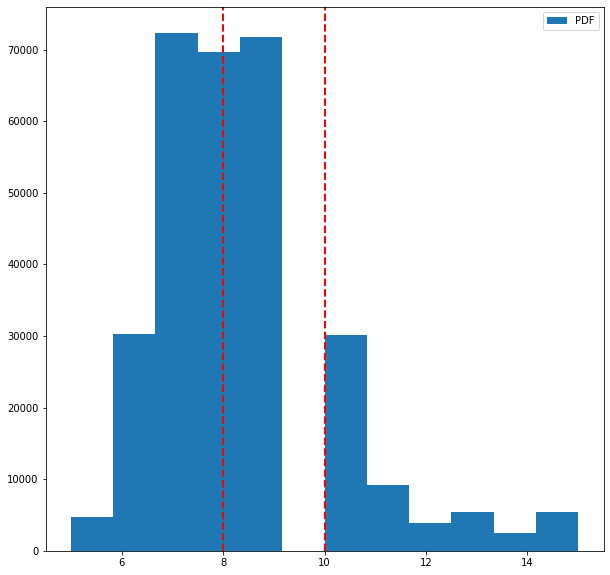

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_village['ADI_2001'], bins=12)
plt.hist(df_village['ADI_2001'], bins=12,label='PDF')
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

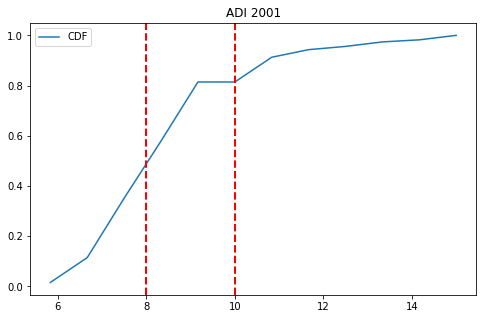

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.title('ADI 2001')
plt.legend()
plt.show()

#### ADI 2011

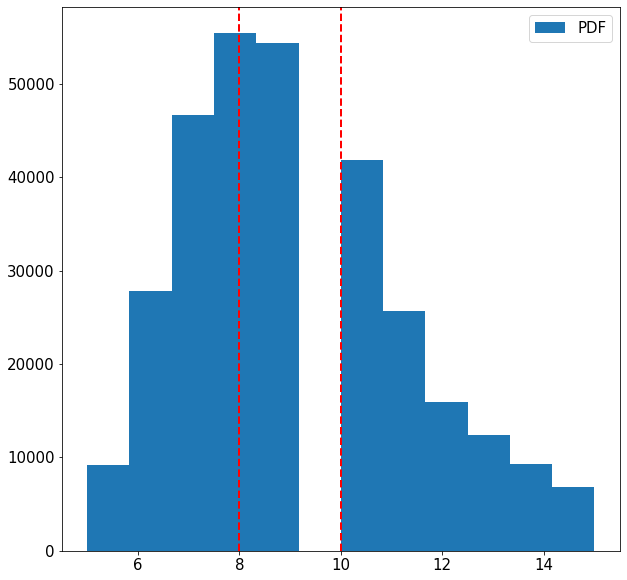

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_village['ADI_2011'], bins=12)
plt.hist(df_village['ADI_2011'], bins=12,label='PDF')
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

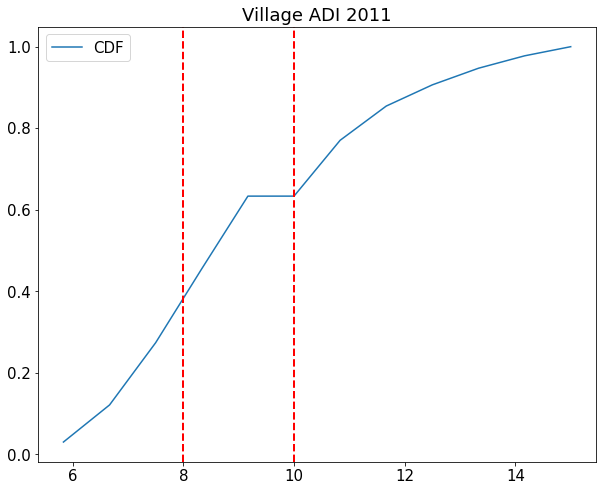

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(10,8))
plt.plot(bins_count[1:], cdf, label="CDF")
#plt.yticks(fontsize=20)
#plt.xticks(fontsize=20)
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Village ADI 2011')
plt.legend()
plt.show()

In [ ]:
test_data,bin_div = pd.qcut(df_village['ADI_2011'], q=3,retbins=True)

In [ ]:
bin_div

array([ 5.,  8., 10., 15.])

In [ ]:
test_data.value_counts()

(4.999, 8.0]    139082
(8.0, 10.0]      96241
(10.0, 15.0]     70134
Name: ADI_2011, dtype: int64

#### ADI 2019

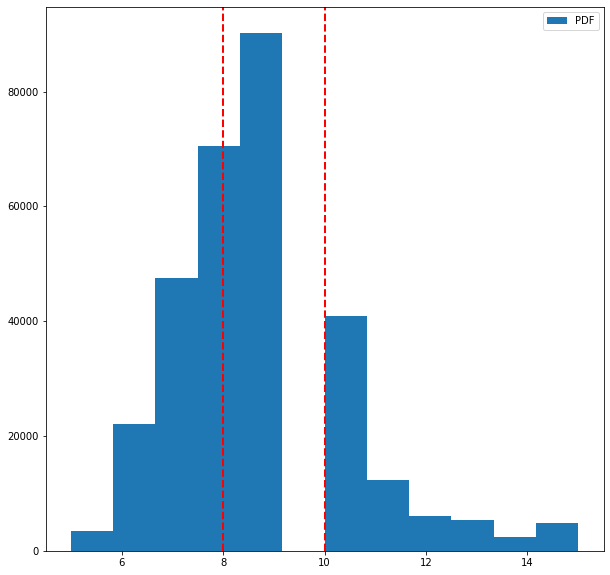

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_village['ADI_2019'], bins=12)
plt.hist(df_village['ADI_2019'], bins=12,label='PDF')
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

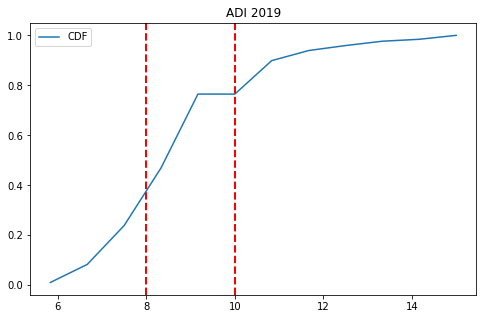

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.title('ADI 2019')
plt.legend()
plt.show()

### District ADI

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
list(df_district.columns)

['Gini_2001',
 'Population_sum_2001',
 'Adi_product_population_sum_2001',
 'Average_ADI_per_population_2001',
 'Num_villages_in_District_2001',
 'Gini_2011',
 'Population_sum_2011',
 'Adi_product_population_sum_2011',
 'Average_ADI_per_population_2011',
 'Num_villages_in_District_2011',
 'Gini_2019',
 'Population_sum_2019',
 'Adi_product_population_sum_2019',
 'Average_ADI_per_population_2019',
 'Num_villages_in_District_2019']

#### ADI 2001

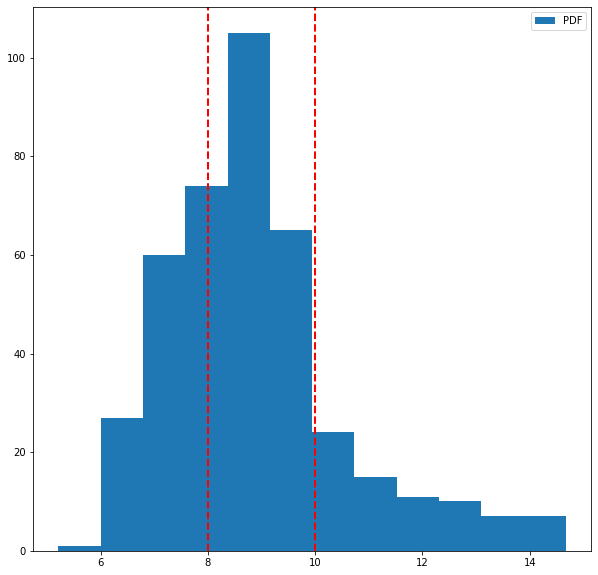

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Average_ADI_per_population_2001'], bins=12)
plt.hist(df_district['Average_ADI_per_population_2001'], bins=12,label='PDF')
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

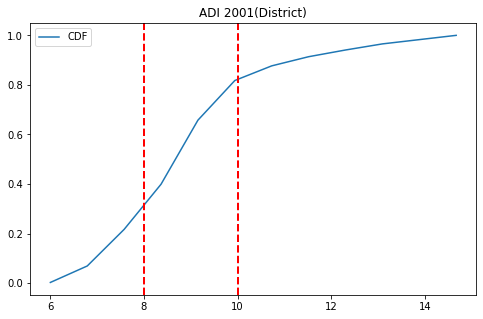

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.title('ADI 2001(District)')
plt.legend()
plt.show()

#### ADI 2011

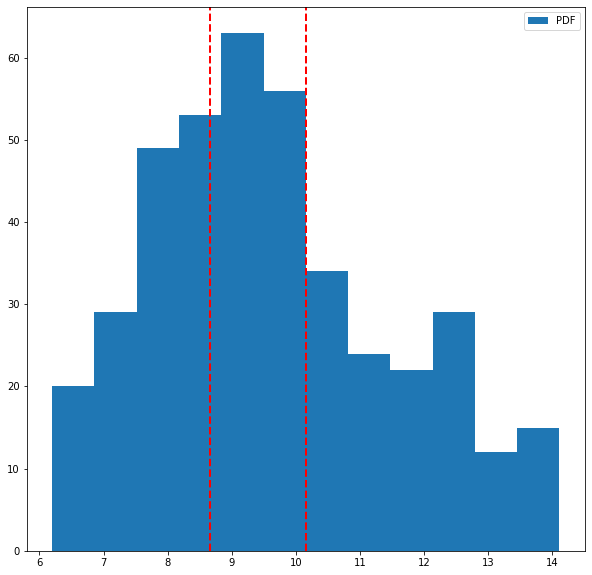

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Average_ADI_per_population_2011'], bins=12)
plt.hist(df_district['Average_ADI_per_population_2011'], bins=12,label='PDF')
plt.axvline(8.667, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.163, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

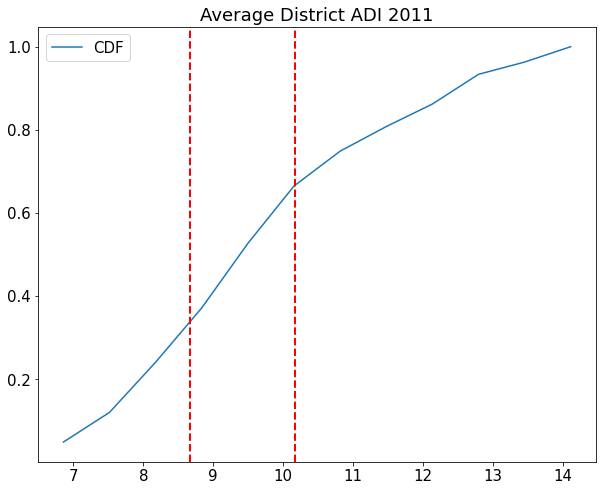

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(10,8))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(8.667, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.163, color='red', linestyle='dashed', linewidth=2)
plt.title('Average District ADI 2011')
plt.legend()
plt.show()

In [ ]:
test_data,bin_div = pd.qcut(df_district['Average_ADI_per_population_2011'], q=3,retbins=True)

In [ ]:
bin_div

array([ 6.19873671,  8.66675489, 10.16344818, 14.11104092])

In [ ]:
test_data.value_counts()

(6.1979999999999995, 8.667]    136
(8.667, 10.163]                135
(10.163, 14.111]               135
Name: Average_ADI_per_population_2011, dtype: int64

#### ADI 2019

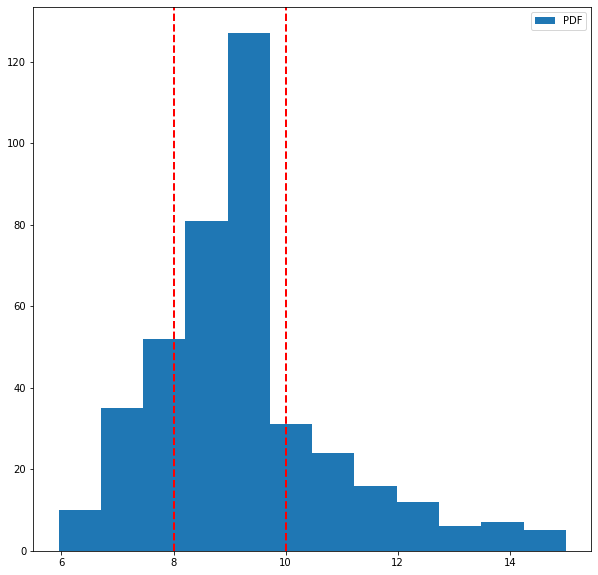

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Average_ADI_per_population_2019'], bins=12)
plt.hist(df_district['Average_ADI_per_population_2019'], bins=12,label='PDF')
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(12, 13)

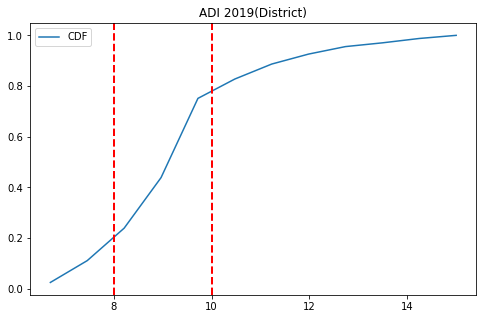

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(8.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.title('ADI 2019(District)')
plt.legend()
plt.show()

### Distance From District Centre

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

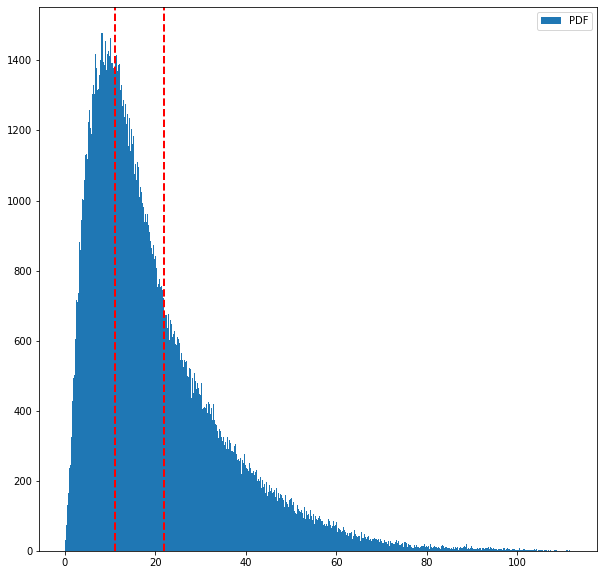

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_village['distance_district_centre'], bins=1000)
plt.hist(df_village['distance_district_centre'], bins=1000,label='PDF')
plt.axvline(11.06, color='red', linestyle='dashed', linewidth=2)
plt.axvline(21.898, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(1000, 1001)

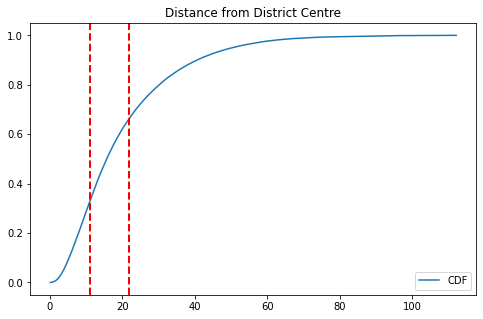

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(11.06, color='red', linestyle='dashed', linewidth=2)
plt.axvline(21.898, color='red', linestyle='dashed', linewidth=2)
plt.title('Distance from District Centre')
plt.legend()
plt.show()

### Change in ADI

#### Prepare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_final_different_population_with_literacy_msl_categorized_kmeans.pickle','rb'))

In [ ]:
df_village

BF_2011  FC_2011  ...  literacy_level_2011  MSL_level_2011
2011_code                    ...                                     
27378            1        1  ...                  3.0             3.0
27379            1        1  ...                  3.0             3.0
27380            1        1  ...                  3.0             3.0
27381            1        1  ...                  3.0             3.0
27382            1        1  ...                  3.0             3.0
...            ...      ...  ...                  ...             ...
644661           1        3  ...                  2.0             3.0
644682           3        3  ...                  3.0             3.0
644683           3        3  ...                  3.0             3.0
644687           1        3  ...                  3.0             3.0
644693           3        3  ...                  3.0             3.0

[308011 rows x 43 columns]

In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011  ... ADI_2011 ADI_2019
2011_code                                    ...                  
27378       301000100000500               3  ...        8      7.0
27379       301000100000600               3  ...        8     10.0
27380       301000100000700               3  ...        8      7.0
27381       301000100000800               3  ...        8     11.0
27382       301000100000900               3  ...        8     10.0
...                     ...             ...  ...      ...      ...
644661     3310000700779700              33  ...       10      7.0
644682     3310000700781800              33  ...       12      9.0
644683     3310000700781900              33  ...       12      9.0
644687     3310000700782300              33  ...       10      7.0
644693     3310000700782900              33  ...       12     10.0

[308011 rows x 7 columns]

In [ ]:
df_merged_village_district = df_village_filter.copy()

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']



df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']


In [ ]:
df_merged_village_district

2001_cc_code  ... Initial_ADI_2011_2019
2011_code                    ...                      
27378       301000100000500  ...                     8
27379       301000100000600  ...                     8
27380       301000100000700  ...                     8
27381       301000100000800  ...                     8
27382       301000100000900  ...                     8
...                     ...  ...                   ...
644661     3310000700779700  ...                    10
644682     3310000700781800  ...                    12
644683     3310000700781900  ...                    12
644687     3310000700782300  ...                    10
644693     3310000700782900  ...                    12

[308011 rows x 11 columns]

In [ ]:
df_vil_dist_1 = df_merged_village_district[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011']]

In [ ]:
df_vil_dist_1

Change_in_ADI_2001_2011  Initial_ADI_2001_2011
2011_code                                                
27378                          3.0                    5.0
27379                          3.0                    5.0
27380                          4.0                    4.0
27381                          3.0                    5.0
27382                          2.0                    6.0
...                            ...                    ...
644661                         0.0                   10.0
644682                         2.0                   10.0
644683                         0.0                   12.0
644687                         3.0                    7.0
644693                         5.0                    7.0

[308011 rows x 2 columns]

In [ ]:
df_vil_dist_2 = df_merged_village_district[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2011_2019  Initial_ADI_2011_2019
2011_code                                                
27378                         -1.0                      8
27379                          2.0                      8
27380                         -1.0                      8
27381                          3.0                      8
27382                          2.0                      8
...                            ...                    ...
644661                        -3.0                     10
644682                        -3.0                     12
644683                        -3.0                     12
644687                        -3.0                     10
644693                        -2.0                     12

[308011 rows x 2 columns]

In [ ]:
df_vil_dist_1 = df_vil_dist_1.rename(columns={"Change_in_ADI_2001_2011": "Change_in_ADI","Initial_ADI_2001_2011":"Initial_ADI"})

In [ ]:
df_vil_dist_1

Change_in_ADI  Initial_ADI
2011_code                            
27378                3.0          5.0
27379                3.0          5.0
27380                4.0          4.0
27381                3.0          5.0
27382                2.0          6.0
...                  ...          ...
644661               0.0         10.0
644682               2.0         10.0
644683               0.0         12.0
644687               3.0          7.0
644693               5.0          7.0

[308011 rows x 2 columns]

In [ ]:
df_vil_dist_2 = df_vil_dist_2.rename(columns={"Change_in_ADI_2011_2019": "Change_in_ADI","Initial_ADI_2011_2019":"Initial_ADI"})

In [ ]:
df_vil_dist_2

Change_in_ADI  Initial_ADI
2011_code                            
27378               -1.0            8
27379                2.0            8
27380               -1.0            8
27381                3.0            8
27382                2.0            8
...                  ...          ...
644661              -3.0           10
644682              -3.0           12
644683              -3.0           12
644687              -3.0           10
644693              -2.0           12

[308011 rows x 2 columns]

In [ ]:
df_vil_dist_1_filter = df_vil_dist_1[df_vil_dist_1['Change_in_ADI'] > 0.0]

In [ ]:
df_vil_dist_1_filter

Change_in_ADI  Initial_ADI
2011_code                            
27378                3.0          5.0
27379                3.0          5.0
27380                4.0          4.0
27381                3.0          5.0
27382                2.0          6.0
...                  ...          ...
644656               2.0          8.0
644658               2.0          8.0
644682               2.0         10.0
644687               3.0          7.0
644693               5.0          7.0

[129774 rows x 2 columns]

In [ ]:
df_vil_dist_2_filter = df_vil_dist_2[df_vil_dist_2['Change_in_ADI'] > 0.0]

In [ ]:
df_vil_dist_2_filter

Change_in_ADI  Initial_ADI
2011_code                            
27379                2.0            8
27381                3.0            8
27382                2.0            8
27384                3.0            8
27385                1.0           10
...                  ...          ...
644334               1.0            6
644351               1.0           10
644353               1.0           10
644432               1.0           10
644449               1.0           10

[115613 rows x 2 columns]

#### 2001-2011

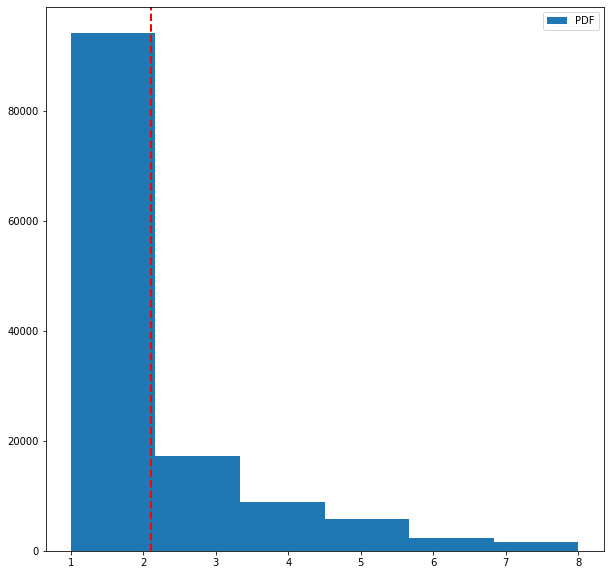

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_1_filter['Change_in_ADI'], bins=6)
plt.hist(df_vil_dist_1_filter['Change_in_ADI'], bins=6,label='PDF')
plt.axvline(2.1, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
df_vil_dist_1_filter['Change_in_ADI'].value_counts()

1.0    57567
2.0    36506
3.0    17203
4.0     8880
5.0     5704
6.0     2356
7.0     1374
8.0      184
Name: Change_in_ADI, dtype: int64

In [ ]:
len(count),len(bins_count)

(6, 7)

In [ ]:
bins_count

array([1.        , 2.16666667, 3.33333333, 4.5       , 5.66666667,
       6.83333333, 8.        ])

In [ ]:
cdf

array([0.72489867, 0.85745989, 0.92588654, 0.96983988, 0.98799451,
       1.        ])

In [ ]:
count_new = [0]
count_new.extend(count)

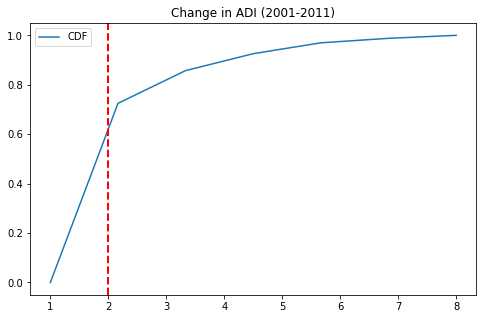

In [ ]:
pdf = count_new / sum(count_new)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[0:], cdf, label="CDF")
plt.axvline(2.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change in ADI (2001-2011)')
plt.legend()
plt.show()

#### 2011-2019

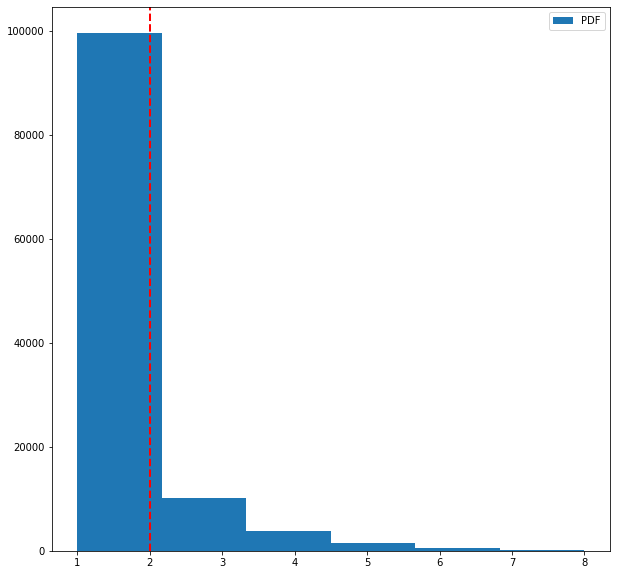

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_2_filter['Change_in_ADI'], bins=6)
plt.hist(df_vil_dist_2_filter['Change_in_ADI'], bins=6,label='PDF')
plt.axvline(2.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
df_vil_dist_2_filter['Change_in_ADI'].value_counts()

1.0    69479
2.0    30151
3.0    10165
4.0     3779
5.0     1435
6.0      486
7.0      107
8.0       11
Name: Change_in_ADI, dtype: int64

In [ ]:
len(count),len(bins_count)

(6, 7)

In [ ]:
count_new = [0]
count_new.extend(count)

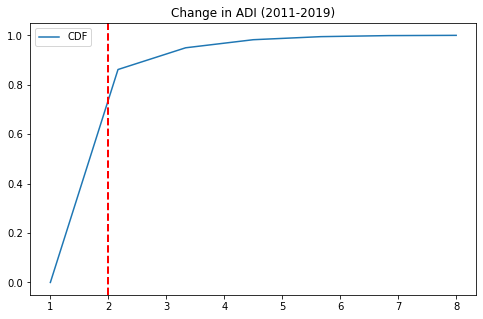

In [ ]:
pdf = count_new / sum(count_new)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[0:], cdf, label="CDF")
plt.axvline(2.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change in ADI (2011-2019)')
plt.legend()
plt.show()

## Gini

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  ...  Num_villages_in_District_2019
STATE_CODE_2011 DIST_CODE_2011             ...                               
3.0             35.0             0.081987  ...                         1223.0
                37.0             0.049305  ...                          829.0
                38.0             0.067285  ...                         1233.0
                39.0             0.092315  ...                          417.0
                40.0             0.128257  ...                          355.0
...                                   ...  ...                            ...
33.0            627.0            0.000000  ...                            1.0
                630.0            0.039200  ...                           61.0
                631.0            0.045161  ...                          240.0
                632.0            0.042210  ...                           10.0
                633.0            0.045931  ...                           19.0

[406 rows x 15 columns]

# Code For Kuznets Curve

### Function Code

In [ ]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)
  
text = 'Hello, World'
colored_text = colored(0, 50, 250, text)
print(colored_text)

#or

print(colored(0, 140, 0, 'Hello, World'))
print(colored(255, 0, 0, 'Hello, World'))

Hello, World 
Hello, World 
Hello, World 


In [ ]:
def plotKunzets_3(data_set,plotting_for_name):
  count = len(data_set)
  text = '\nPlotting For Combo: '+plotting_for_name;
  print(colored(0, 50, 250, text))
  print(text)
  x = [2001,2011,2019]
  
  
  #'Current_ADI','Change_In_ADI','Current_Gini','Change_In_Gini','Later_ADI','Later_Gini'
  
  fig, ax = plt.subplots(figsize=(10,10))

  adi_before = list(data_set['Current_ADI'])
  gini_before = list(data_set['Current_Gini'])
  x1,x1_error = np.mean(adi_before) , np.std(adi_before)
  y1,y1_error = np.mean(gini_before) , np.std(gini_before)
  a1 = ax.errorbar(x1,y1,y1_error,x1_error,linestyle=None,marker='^',capsize=3) 
  

  adi_after = list(data_set['Later_ADI'])
  gini_after = list(data_set['Later_Gini'])
  x2,x2_error = np.mean(adi_after) , np.std(adi_after)
  y2,y2_error = np.mean(gini_after) , np.std(gini_after)
  a2 = ax.errorbar(x2,y2,y2_error,x2_error,linestyle=None,marker='^',capsize=3) 

  x = [x1,x2]
  y = [y1,y2]
  u = np.diff(x)
  v = np.diff(y)
  pos_x = x[:-1] + u/2
  pos_y = y[:-1] + v/2
  norm = np.sqrt(u**2+v**2) 

  
  ax.plot(x,y, marker="o")
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", headwidth=5, pivot="mid")


  #plt.plot([x1,x2,x3],y)
  ax.set_xlabel('Average_ADI_per_Population',fontsize=20)
  ax.set_ylabel('Gini Index',fontsize=20)
  ax.legend([a1,a2],['Current Year','10 Years After'],fontsize=20)
  plt.show()
 


  


  text = "\nCompleted Plotting For  Combo: "+plotting_for_name+"  Total Districts with this combo : "+str(count)
  print(colored(0, 50, 250, text))

In [ ]:
def plot_gini_5_combo(data,plot_adi_level_name):
  
  text = '\nPlotting For ADI_level: '+plot_adi_level_name
  print(colored(255, 0, 0, text))
  data_combo_1 = data[(data['Change_In_ADI'] > 0)  &  (data['Change_In_Gini'] > 0)]
  name_combo_1 = plot_adi_level_name+"_ADI_Increase_Gini_Increase"

  data_combo_2 = data[(data['Change_In_ADI'] > 0)  &  (data['Change_In_Gini'] < 0)]
  name_combo_2 = plot_adi_level_name+"_ADI_Increase_Gini_Decrease"


  data_combo_3 = data[(data['Change_In_ADI'] < 0)  &  (data['Change_In_Gini'] > 0)]
  name_combo_3 = plot_adi_level_name+"_ADI_Decrease_Gini_Increase"

  data_combo_4 = data[(data['Change_In_ADI'] < 0)  &  (data['Change_In_Gini'] < 0)]
  name_combo_4 = plot_adi_level_name+"_ADI_Decrease_Gini_Decrease"

  data_list = [data_combo_1,data_combo_2,data_combo_3,data_combo_4]
  name_list = [name_combo_1,name_combo_2,name_combo_3,name_combo_4]


  for i in range(0,4):
     #plotKunzets(data_list[i],name_list[i])
     plotKunzets_3(data_list[i],name_list[i])

  text = '\nCompleted Plotting For ADI_level: '+plot_adi_level_name   
  print(colored(255, 0, 0, text))

In [ ]:
def get_low_medium_high_df(data,adi_range):
  data_low = data[data['Current_ADI'] <= adi_range[0]]
  data_medium = data[(data['Current_ADI'] > adi_range[0])  & (data['Current_ADI'] <= adi_range[1])]
  data_high = data[data['Current_ADI'] > adi_range[1]]

  return data_low,data_medium,data_high

In [ ]:
import math

def p_hat(y1,y2,n1,n2):
  return (float(y1+y2))/(n1+n2)

def p1_hat(y1,y2,n1,n2):
  return (float(y1)/n1)

def p2_hat(y1,y2,n1,n2):
  return (float(y2)/n2)

def z_test(y1,y2,n1,n2):
  num = float(p1_hat(y1,y2,n1,n2) - p2_hat(y1,y2,n1,n2))
  p = p_hat(y1,y2,n1,n2)
  denom = math.sqrt(p * (1-p) * ((1.0/n1) + (1.0/n2)))
  return num/denom  

def run_zTest(y1,y2,n1,n2):
  print(y1,y2,n1,n2)
  print("p1_hat : "+str(p1_hat(y1,y2,n1,n2)))
  print("p2_hat : "+str(p2_hat(y1,y2,n1,n2)))
  print("p_hat : "+str(p_hat(y1,y2,n1,n2)))
  print("z_test : "+str(z_test(y1,y2,n1,n2)))

## Perpare Data

In [ ]:
gini_dataset = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))


In [ ]:
gini_dataset

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


### Range 1 : 2001 - 2011

In [ ]:
gini_data_2001_2011 = gini_dataset[['Gini_2001','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Gini_2011']]

In [ ]:
gini_data_2001_2011

Gini_2001  Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.081987                        12.775300   
                37.0             0.049305                        13.938165   
                38.0             0.067285                        13.794523   
                39.0             0.092315                        13.207238   
                40.0             0.128257                        10.537720   
...                                   ...                              ...   
33.0            627.0            0.000000                         9.000000   
                630.0            0.039200                         9.252615   
                631.0            0.045161                         9.417554   
                632.0            0.042210                        14.201804   
                633.0            0.045931                        10.545362   

                                Average_ADI_per_population_2011  Gini_2011  
STATE_CODE_2011 DIST_CODE_2011                                              
3.0             35.0                                  13.081624   0.047189  
                37.0                                  13.961504   0.034979  
                38.0                                  13.957830   0.039400  
                39.0                                  13.912353   0.035722  
                40.0                                  13.644266   0.029908  
...                                                         ...        ...  
33.0            627.0                                  8.000000   0.000000  
                630.0                                  9.642899   0.072128  
                631.0                                 11.119372   0.079975  
                632.0                                 13.887902   0.038716  
                633.0                                 13.671448   0.050380  

[406 rows x 4 columns]

In [ ]:
gini_data_2001_2011['Current_ADI'] = gini_data_2001_2011['Average_ADI_per_population_2001']
gini_data_2001_2011['Change_In_ADI'] = (gini_data_2001_2011['Average_ADI_per_population_2011'] - gini_data_2001_2011['Average_ADI_per_population_2001'])
gini_data_2001_2011['Later_ADI'] = gini_data_2001_2011['Average_ADI_per_population_2011']


gini_data_2001_2011['Current_Gini'] = gini_data_2001_2011['Gini_2001']
gini_data_2001_2011['Change_In_Gini'] = (gini_data_2001_2011['Gini_2011'] - gini_data_2001_2011['Gini_2001'])
gini_data_2001_2011['Later_Gini'] = gini_data_2001_2011['Gini_2011']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
gini_data_2001_2011

Gini_2001  Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.081987                        12.775300   
                37.0             0.049305                        13.938165   
                38.0             0.067285                        13.794523   
                39.0             0.092315                        13.207238   
                40.0             0.128257                        10.537720   
...                                   ...                              ...   
33.0            627.0            0.000000                         9.000000   
                630.0            0.039200                         9.252615   
                631.0            0.045161                         9.417554   
                632.0            0.042210                        14.201804   
                633.0            0.045931                        10.545362   

                                Average_ADI_per_population_2011  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0                                  13.081624   0.047189   
                37.0                                  13.961504   0.034979   
                38.0                                  13.957830   0.039400   
                39.0                                  13.912353   0.035722   
                40.0                                  13.644266   0.029908   
...                                                         ...        ...   
33.0            627.0                                  8.000000   0.000000   
                630.0                                  9.642899   0.072128   
                631.0                                 11.119372   0.079975   
                632.0                                 13.887902   0.038716   
                633.0                                 13.671448   0.050380   

                                Current_ADI  Change_In_ADI  Later_ADI  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0              12.775300       0.306324  13.081624   
                37.0              13.938165       0.023339  13.961504   
                38.0              13.794523       0.163308  13.957830   
                39.0              13.207238       0.705115  13.912353   
                40.0              10.537720       3.106547  13.644266   
...                                     ...            ...        ...   
33.0            627.0              9.000000      -1.000000   8.000000   
                630.0              9.252615       0.390285   9.642899   
                631.0              9.417554       1.701819  11.119372   
                632.0             14.201804      -0.313902  13.887902   
                633.0             10.545362       3.126086  13.671448   

                                Current_Gini  Change_In_Gini  Later_Gini  
STATE_CODE_2011 DIST_CODE_2011                                            
3.0             35.0                0.081987       -0.034797    0.047189  
                37.0                0.049305       -0.014326    0.034979  
                38.0                0.067285       -0.027885    0.039400  
                39.0                0.092315       -0.056593    0.035722  
                40.0                0.128257       -0.098349    0.029908  
...                                      ...             ...         ...  
33.0            627.0               0.000000        0.000000    0.000000  
                630.0               0.039200        0.032928    0.072128  
                631.0               0.045161        0.034814    0.079975  
                632.0               0.042210       -0.003493    0.038716  
                633.0               0.045931        0.004449    0.050380  

[406 rows x 10 columns]

In [ ]:
gini_dat_range1 = gini_data_2001_2011[['Current_ADI','Change_In_ADI','Current_Gini','Change_In_Gini','Later_ADI','Later_Gini']]

In [ ]:
gini_dat_range1

Current_ADI  Change_In_ADI  Current_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0              12.775300       0.306324      0.081987   
                37.0              13.938165       0.023339      0.049305   
                38.0              13.794523       0.163308      0.067285   
                39.0              13.207238       0.705115      0.092315   
                40.0              10.537720       3.106547      0.128257   
...                                     ...            ...           ...   
33.0            627.0              9.000000      -1.000000      0.000000   
                630.0              9.252615       0.390285      0.039200   
                631.0              9.417554       1.701819      0.045161   
                632.0             14.201804      -0.313902      0.042210   
                633.0             10.545362       3.126086      0.045931   

                                Change_In_Gini  Later_ADI  Later_Gini  
STATE_CODE_2011 DIST_CODE_2011                                         
3.0             35.0                 -0.034797  13.081624    0.047189  
                37.0                 -0.014326  13.961504    0.034979  
                38.0                 -0.027885  13.957830    0.039400  
                39.0                 -0.056593  13.912353    0.035722  
                40.0                 -0.098349  13.644266    0.029908  
...                                        ...        ...         ...  
33.0            627.0                 0.000000   8.000000    0.000000  
                630.0                 0.032928   9.642899    0.072128  
                631.0                 0.034814  11.119372    0.079975  
                632.0                -0.003493  13.887902    0.038716  
                633.0                 0.004449  13.671448    0.050380  

[406 rows x 6 columns]

In [ ]:
gini_dat_range1.index = range(1,407)


In [ ]:
gini_dat_range1

Current_ADI  Change_In_ADI  Current_Gini  Change_In_Gini  Later_ADI  \
1      12.775300       0.306324      0.081987       -0.034797  13.081624   
2      13.938165       0.023339      0.049305       -0.014326  13.961504   
3      13.794523       0.163308      0.067285       -0.027885  13.957830   
4      13.207238       0.705115      0.092315       -0.056593  13.912353   
5      10.537720       3.106547      0.128257       -0.098349  13.644266   
..           ...            ...           ...             ...        ...   
402     9.000000      -1.000000      0.000000        0.000000   8.000000   
403     9.252615       0.390285      0.039200        0.032928   9.642899   
404     9.417554       1.701819      0.045161        0.034814  11.119372   
405    14.201804      -0.313902      0.042210       -0.003493  13.887902   
406    10.545362       3.126086      0.045931        0.004449  13.671448   

     Later_Gini  
1      0.047189  
2      0.034979  
3      0.039400  
4      0.035722  
5      0.029908  
..          ...  
402    0.000000  
403    0.072128  
404    0.079975  
405    0.038716  
406    0.050380  

[406 rows x 6 columns]

### Range 2 : 2011 - 2019

In [ ]:
gini_data_2011_2019 = gini_dataset[['Gini_2011','Average_ADI_per_population_2011','Average_ADI_per_population_2019','Gini_2019']]

In [ ]:
gini_data_2011_2019

Gini_2011  Average_ADI_per_population_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.047189                        13.081624   
                37.0             0.034979                        13.961504   
                38.0             0.039400                        13.957830   
                39.0             0.035722                        13.912353   
                40.0             0.029908                        13.644266   
...                                   ...                              ...   
33.0            627.0            0.000000                         8.000000   
                630.0            0.072128                         9.642899   
                631.0            0.079975                        11.119372   
                632.0            0.038716                        13.887902   
                633.0            0.050380                        13.671448   

                                Average_ADI_per_population_2019  Gini_2019  
STATE_CODE_2011 DIST_CODE_2011                                              
3.0             35.0                                  12.477174   0.047450  
                37.0                                  13.867607   0.051354  
                38.0                                  12.211019   0.060786  
                39.0                                  14.015705   0.048773  
                40.0                                  14.234858   0.033202  
...                                                         ...        ...  
33.0            627.0                                 10.000000   0.000000  
                630.0                                  9.708000   0.102306  
                631.0                                 10.887265   0.113958  
                632.0                                 15.000000   0.000000  
                633.0                                 12.317611   0.054511  

[406 rows x 4 columns]

In [ ]:
gini_data_2011_2019['Current_ADI'] = gini_data_2011_2019['Average_ADI_per_population_2011']
gini_data_2011_2019['Change_In_ADI'] = (gini_data_2011_2019['Average_ADI_per_population_2019'] - gini_data_2011_2019['Average_ADI_per_population_2011'])
gini_data_2011_2019['Later_ADI'] = gini_data_2011_2019['Average_ADI_per_population_2019']


gini_data_2011_2019['Current_Gini'] = gini_data_2011_2019['Gini_2011']
gini_data_2011_2019['Change_In_Gini'] = (gini_data_2011_2019['Gini_2019'] - gini_data_2011_2019['Gini_2011'])
gini_data_2011_2019['Later_Gini'] = gini_data_2011_2019['Gini_2019']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
gini_data_2011_2019

Gini_2011  Average_ADI_per_population_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.047189                        13.081624   
                37.0             0.034979                        13.961504   
                38.0             0.039400                        13.957830   
                39.0             0.035722                        13.912353   
                40.0             0.029908                        13.644266   
...                                   ...                              ...   
33.0            627.0            0.000000                         8.000000   
                630.0            0.072128                         9.642899   
                631.0            0.079975                        11.119372   
                632.0            0.038716                        13.887902   
                633.0            0.050380                        13.671448   

                                Average_ADI_per_population_2019  Gini_2019  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0                                  12.477174   0.047450   
                37.0                                  13.867607   0.051354   
                38.0                                  12.211019   0.060786   
                39.0                                  14.015705   0.048773   
                40.0                                  14.234858   0.033202   
...                                                         ...        ...   
33.0            627.0                                 10.000000   0.000000   
                630.0                                  9.708000   0.102306   
                631.0                                 10.887265   0.113958   
                632.0                                 15.000000   0.000000   
                633.0                                 12.317611   0.054511   

                                Current_ADI  Change_In_ADI  Later_ADI  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0              13.081624      -0.604450  12.477174   
                37.0              13.961504      -0.093897  13.867607   
                38.0              13.957830      -1.746811  12.211019   
                39.0              13.912353       0.103352  14.015705   
                40.0              13.644266       0.590592  14.234858   
...                                     ...            ...        ...   
33.0            627.0              8.000000       2.000000  10.000000   
                630.0              9.642899       0.065101   9.708000   
                631.0             11.119372      -0.232107  10.887265   
                632.0             13.887902       1.112098  15.000000   
                633.0             13.671448      -1.353837  12.317611   

                                Current_Gini  Change_In_Gini  Later_Gini  
STATE_CODE_2011 DIST_CODE_2011                                            
3.0             35.0                0.047189        0.000260    0.047450  
                37.0                0.034979        0.016376    0.051354  
                38.0                0.039400        0.021386    0.060786  
                39.0                0.035722        0.013051    0.048773  
                40.0                0.029908        0.003293    0.033202  
...                                      ...             ...         ...  
33.0            627.0               0.000000        0.000000    0.000000  
                630.0               0.072128        0.030178    0.102306  
                631.0               0.079975        0.033983    0.113958  
                632.0               0.038716       -0.038716    0.000000  
                633.0               0.050380        0.004131    0.054511  

[406 rows x 10 columns]

In [ ]:
gini_dat_range2 = gini_data_2011_2019[['Current_ADI','Change_In_ADI','Current_Gini','Change_In_Gini','Later_ADI','Later_Gini']]

In [ ]:
gini_dat_range2

Current_ADI  Change_In_ADI  Current_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0              13.081624      -0.604450      0.047189   
                37.0              13.961504      -0.093897      0.034979   
                38.0              13.957830      -1.746811      0.039400   
                39.0              13.912353       0.103352      0.035722   
                40.0              13.644266       0.590592      0.029908   
...                                     ...            ...           ...   
33.0            627.0              8.000000       2.000000      0.000000   
                630.0              9.642899       0.065101      0.072128   
                631.0             11.119372      -0.232107      0.079975   
                632.0             13.887902       1.112098      0.038716   
                633.0             13.671448      -1.353837      0.050380   

                                Change_In_Gini  Later_ADI  Later_Gini  
STATE_CODE_2011 DIST_CODE_2011                                         
3.0             35.0                  0.000260  12.477174    0.047450  
                37.0                  0.016376  13.867607    0.051354  
                38.0                  0.021386  12.211019    0.060786  
                39.0                  0.013051  14.015705    0.048773  
                40.0                  0.003293  14.234858    0.033202  
...                                        ...        ...         ...  
33.0            627.0                 0.000000  10.000000    0.000000  
                630.0                 0.030178   9.708000    0.102306  
                631.0                 0.033983  10.887265    0.113958  
                632.0                -0.038716  15.000000    0.000000  
                633.0                 0.004131  12.317611    0.054511  

[406 rows x 6 columns]

In [ ]:
gini_dat_range2.index = range(1,407)


In [ ]:
gini_dat_range2

Current_ADI  Change_In_ADI  Current_Gini  Change_In_Gini  Later_ADI  \
1      13.081624      -0.604450      0.047189        0.000260  12.477174   
2      13.961504      -0.093897      0.034979        0.016376  13.867607   
3      13.957830      -1.746811      0.039400        0.021386  12.211019   
4      13.912353       0.103352      0.035722        0.013051  14.015705   
5      13.644266       0.590592      0.029908        0.003293  14.234858   
..           ...            ...           ...             ...        ...   
402     8.000000       2.000000      0.000000        0.000000  10.000000   
403     9.642899       0.065101      0.072128        0.030178   9.708000   
404    11.119372      -0.232107      0.079975        0.033983  10.887265   
405    13.887902       1.112098      0.038716       -0.038716  15.000000   
406    13.671448      -1.353837      0.050380        0.004131  12.317611   

     Later_Gini  
1      0.047450  
2      0.051354  
3      0.060786  
4      0.048773  
5      0.033202  
..          ...  
402    0.000000  
403    0.102306  
404    0.113958  
405    0.000000  
406    0.054511  

[406 rows x 6 columns]


## Districts in the starting phase of their kuznets curve generally have a low level of development

---


P(Positive Adi Change , Positive Gini Change | Low ADI Development ) = 
P(Positive Adi Change , Positive Gini Change | High ADI Development )


---
P(Positive Adi Change , Positive Gini Change | Low ADI Development ) = 
P(Positive Adi Change , Positive Gini Change | Medium ADI Development ) 


### Range 1 : 2001 - 2011

In [ ]:
gini_dat_range1_low,gini_dat_range1_medium,gini_dat_range1_high  = get_low_medium_high_df(gini_dat_range1,[8.667,10.163])

In [ ]:
len(gini_dat_range1_low) , len(gini_dat_range1_medium) , len(gini_dat_range1_high)

(200, 136, 70)


Plotting For ADI_level: Low ADI Development 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase


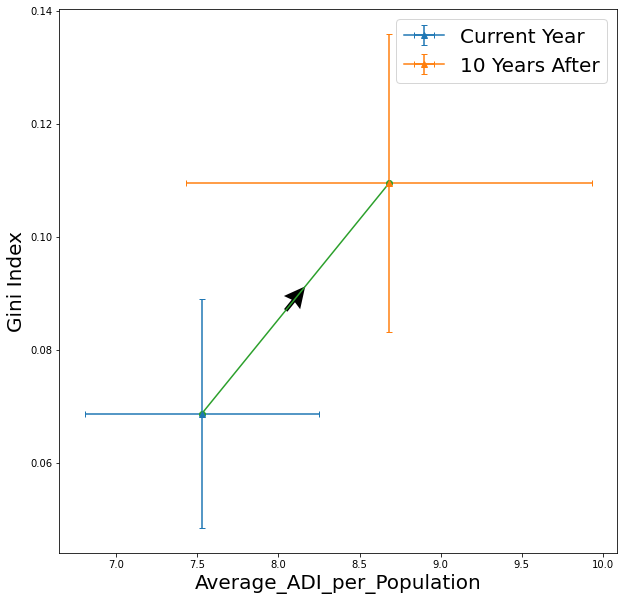


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 145 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease


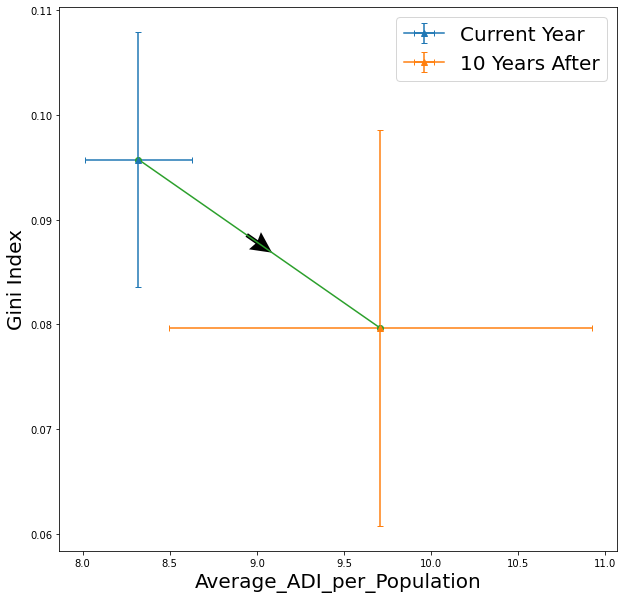


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 16 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase


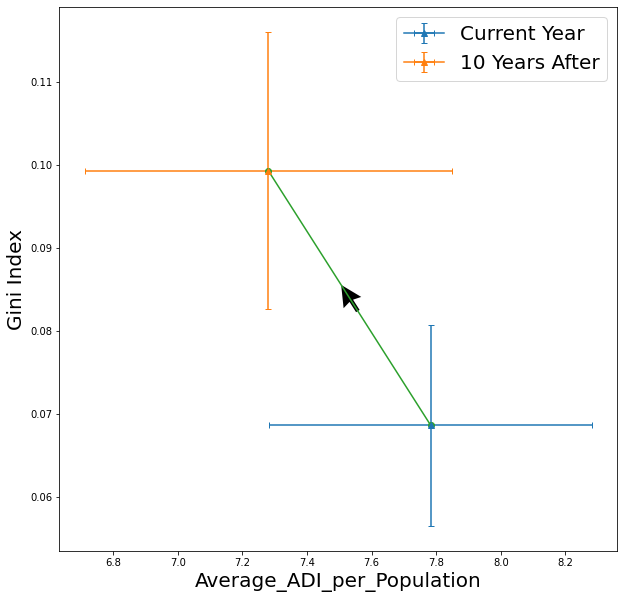


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 31 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease


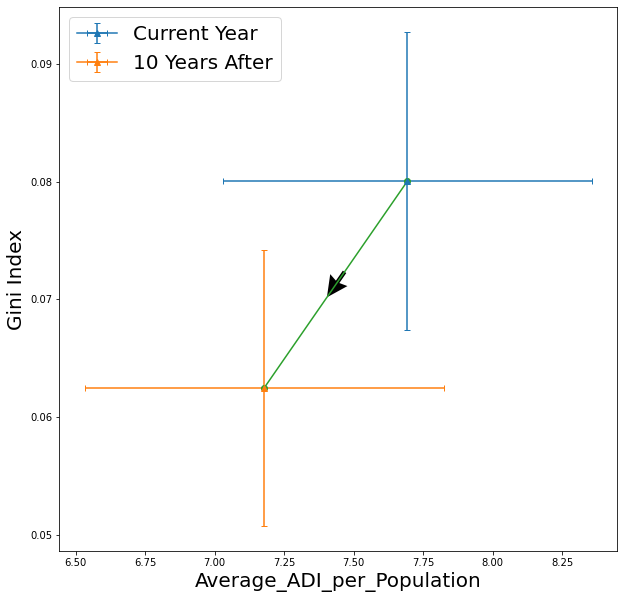


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 8 

Completed Plotting For ADI_level: Low ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_low,"Low ADI Development")


Plotting For ADI_level: Medium ADI Development 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase


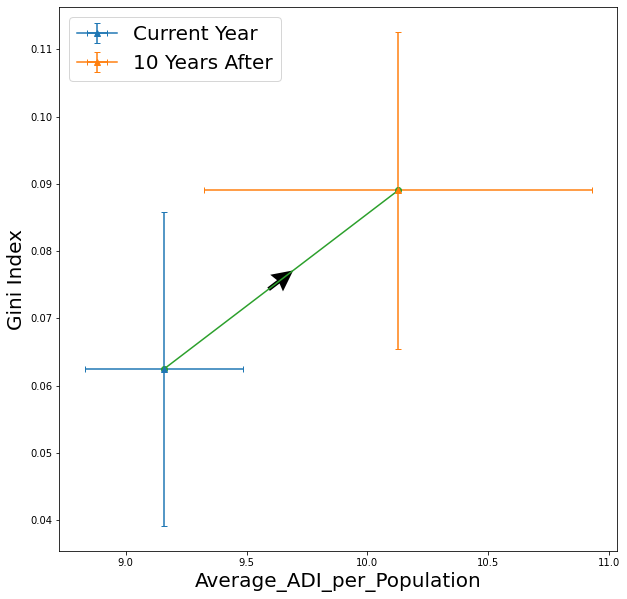


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 83 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease


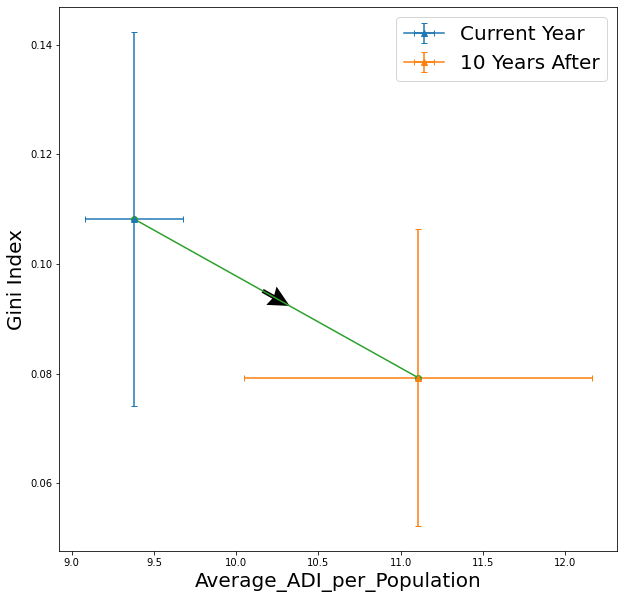


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 22 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase


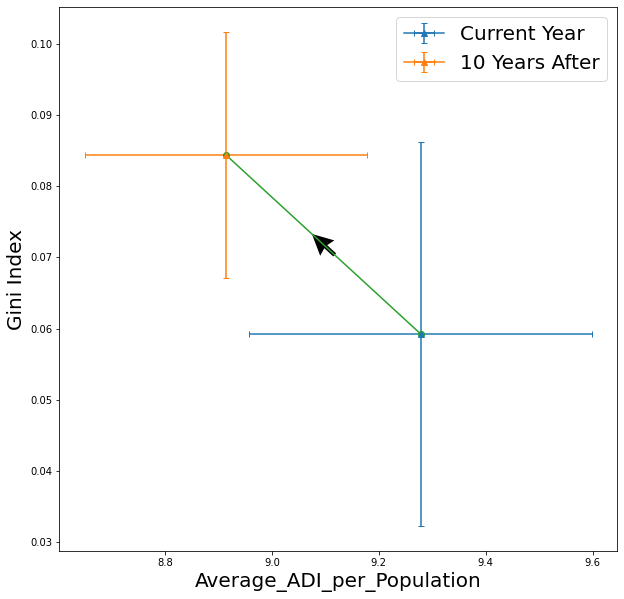


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 19 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease


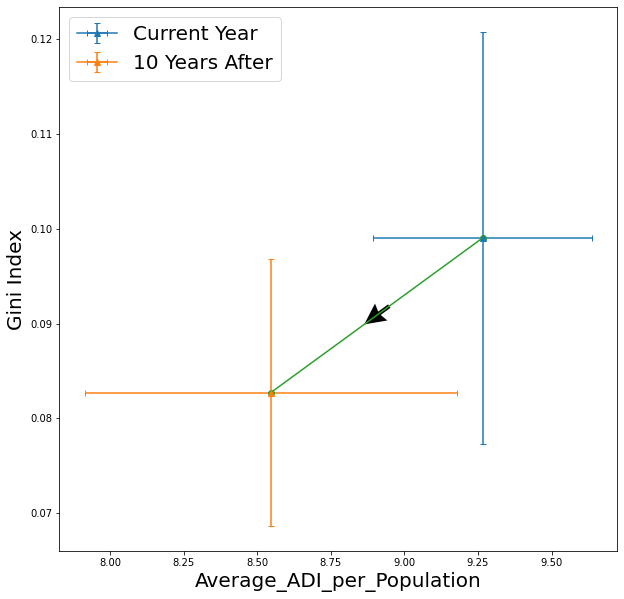


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 10 

Completed Plotting For ADI_level: Medium ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_medium,"Medium ADI Development")


Plotting For ADI_level: High ADI Development 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase


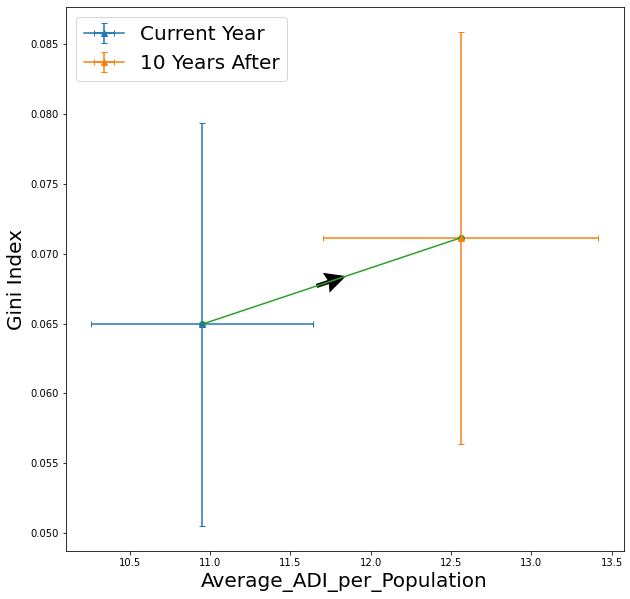


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 3 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease


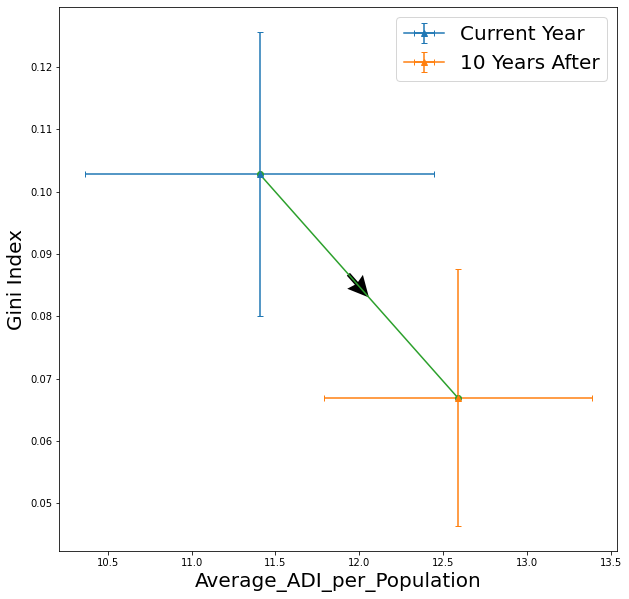


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 42 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase


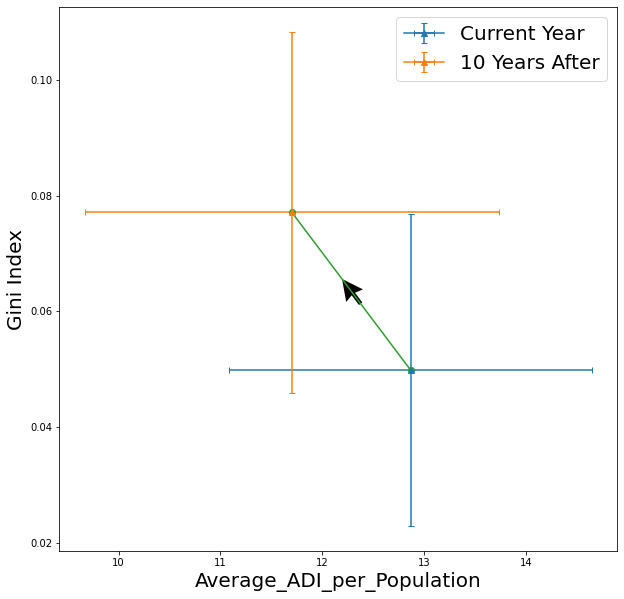


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 10 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease


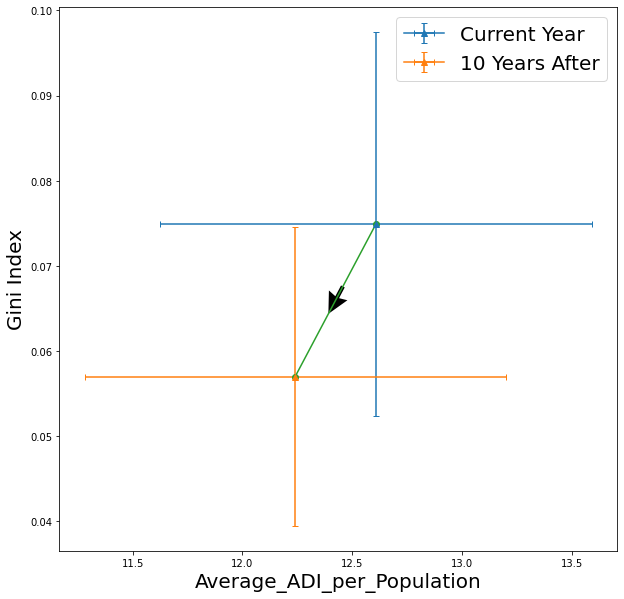


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 15 

Completed Plotting For ADI_level: High ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_high,"High ADI Development")

#### Counts and Test 1 : Low vs Medium 

   low_adi = 200
 | med_adi = 136
 | high_adi= 70



In [ ]:
(200, 136, 70)

n1 = 200
n2 = 136

y1 = 145
y2 = 83

run_zTest(y1,y2,n1,n2)

145 83 200 136
p1_hat : 0.725
p2_hat : 0.6102941176470589
p_hat : 0.6785714285714286
z_test : 2.2098382141959014


#### Counts and Test 2 : Low vs High 

   low_adi = 200
 | med_adi = 136
 | high_adi= 70



In [ ]:
n1 = 200
n2 = 70

y1 = 145
y2 = 3

run_zTest(y1,y2,n1,n2)

145 3 200 70
p1_hat : 0.725
p2_hat : 0.04285714285714286
p_hat : 0.5481481481481482
z_test : 9.86984796350533


### Range 2 : 2011 - 2019

In [ ]:
gini_dat_range2_low,gini_dat_range2_medium,gini_dat_range2_high  = get_low_medium_high_df(gini_dat_range2,[8.667,10.163])

In [ ]:
len(gini_dat_range2_low) , len(gini_dat_range2_medium) , len(gini_dat_range2_high)

(136, 134, 136)


Plotting For ADI_level: Low ADI Development 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase


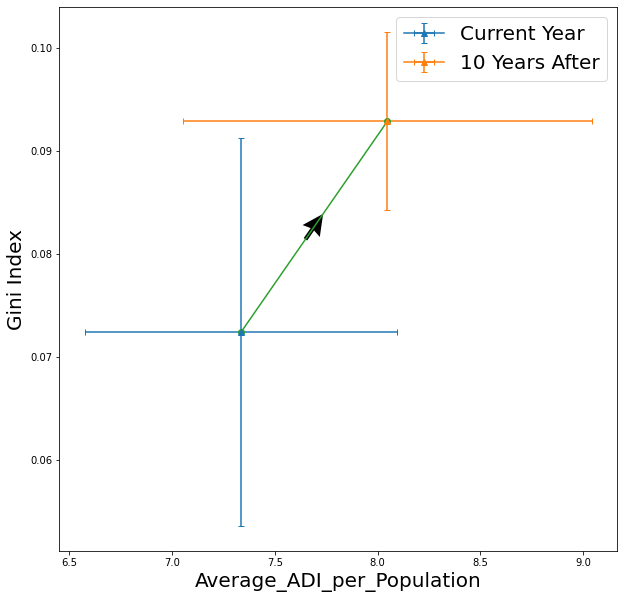


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 5 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease


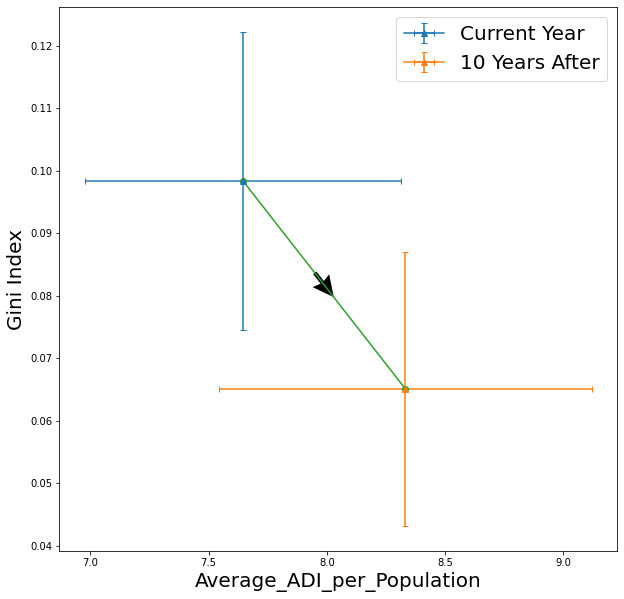


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 76 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase


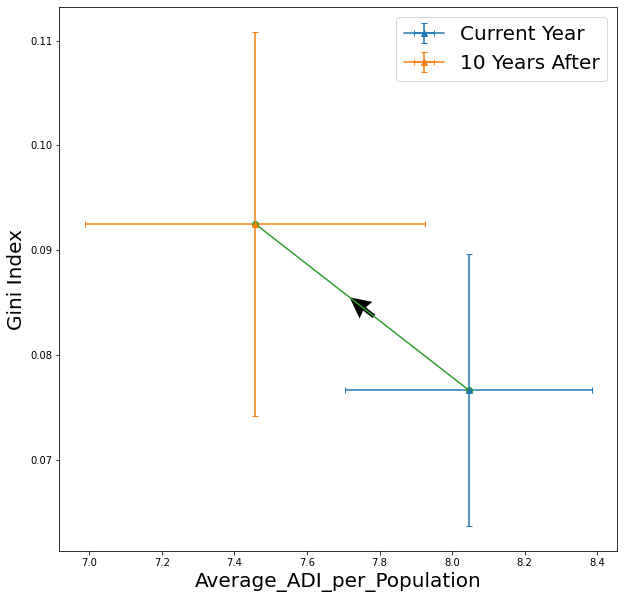


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 10 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease


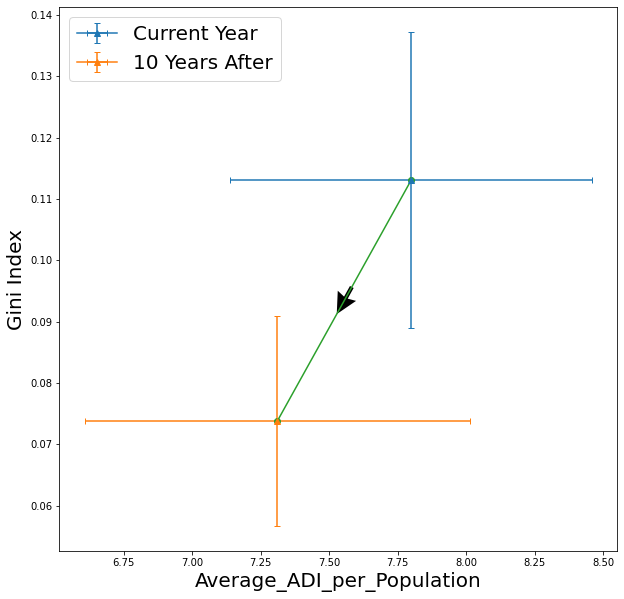


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 43 

Completed Plotting For ADI_level: Low ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_low,"Low ADI Development")


Plotting For ADI_level: Medium ADI Development 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase


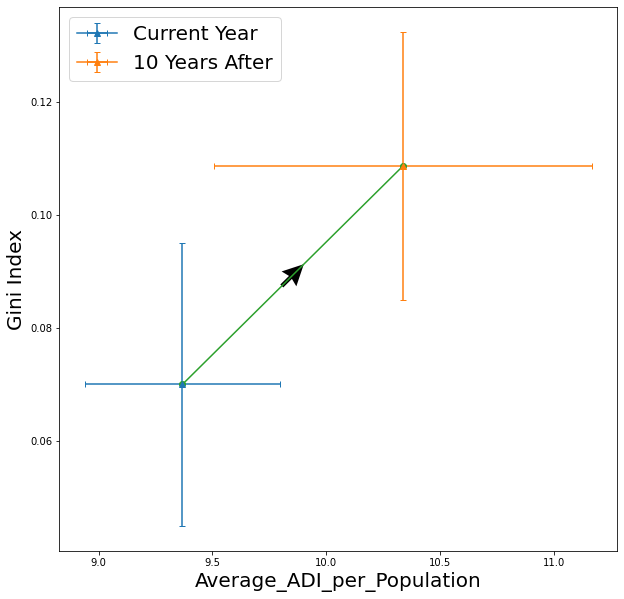


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 9 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease


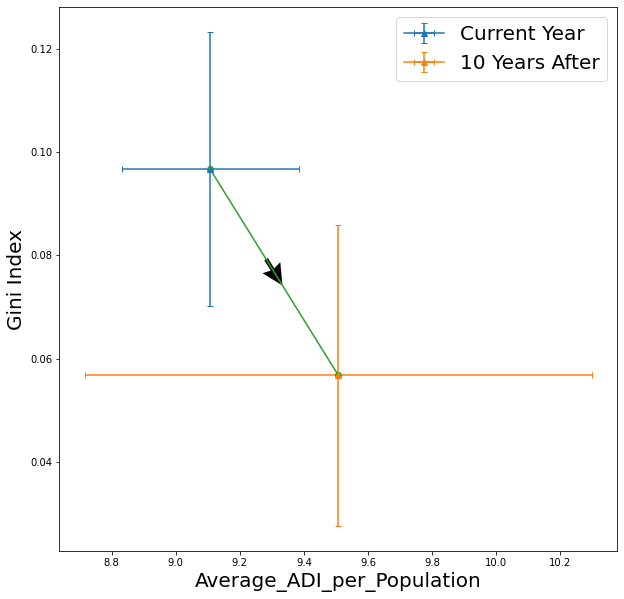


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 27 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase


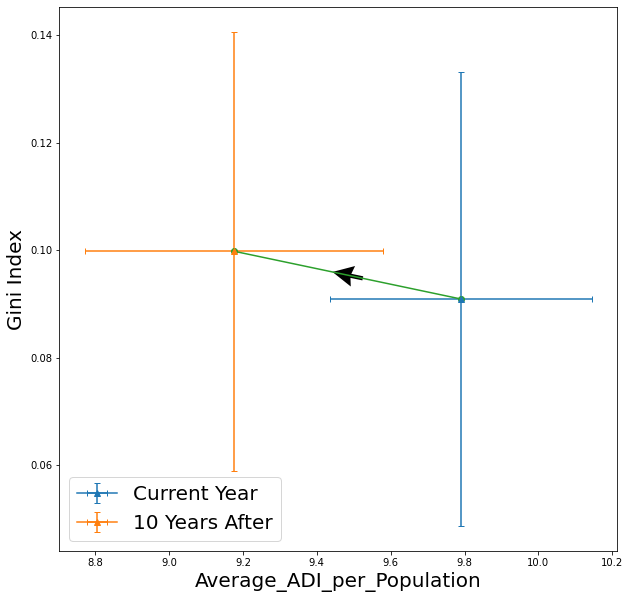


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 7 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease


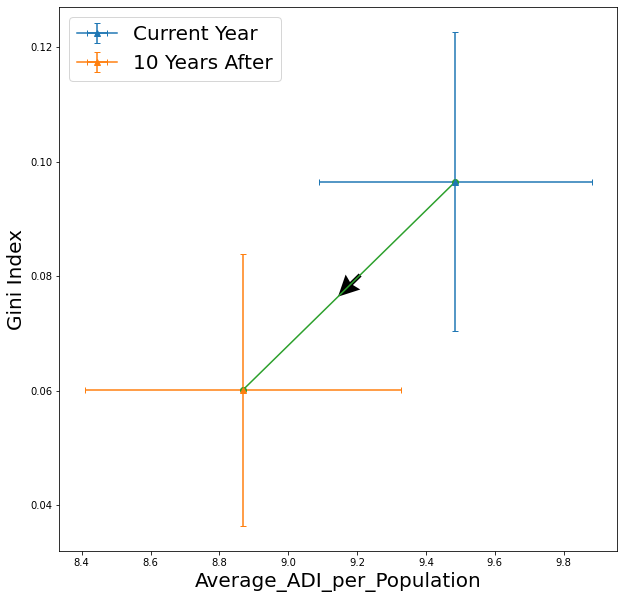


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 91 

Completed Plotting For ADI_level: Medium ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_medium,"Medium ADI Development")


Plotting For ADI_level: High ADI Development 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase


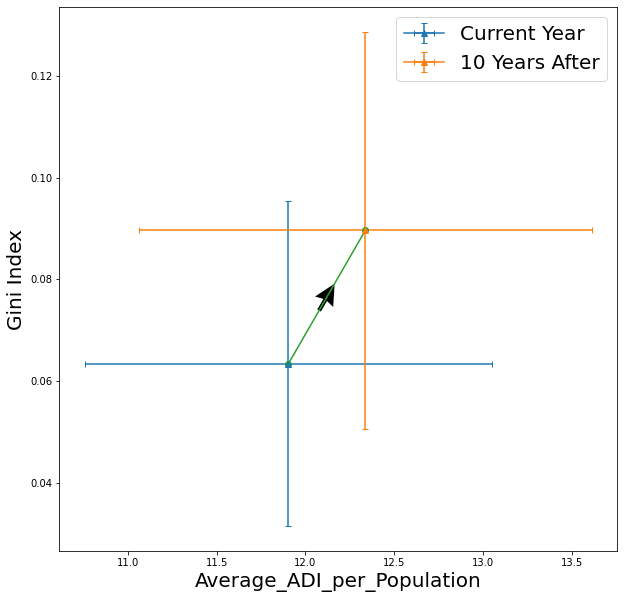


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 18 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease


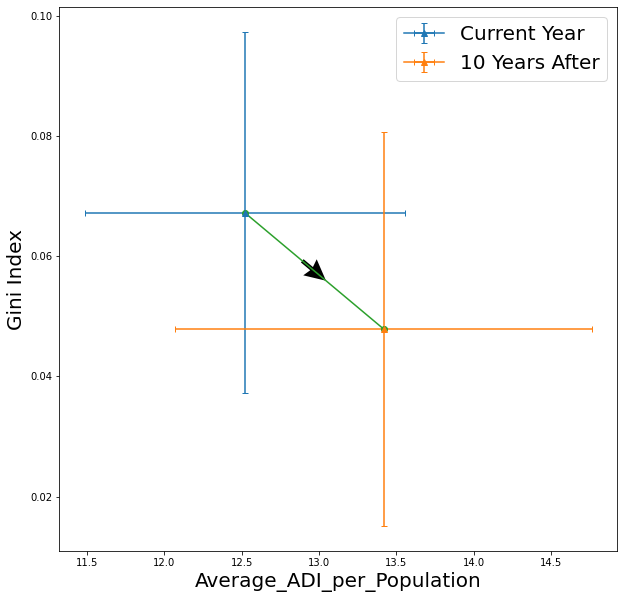


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 11 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase


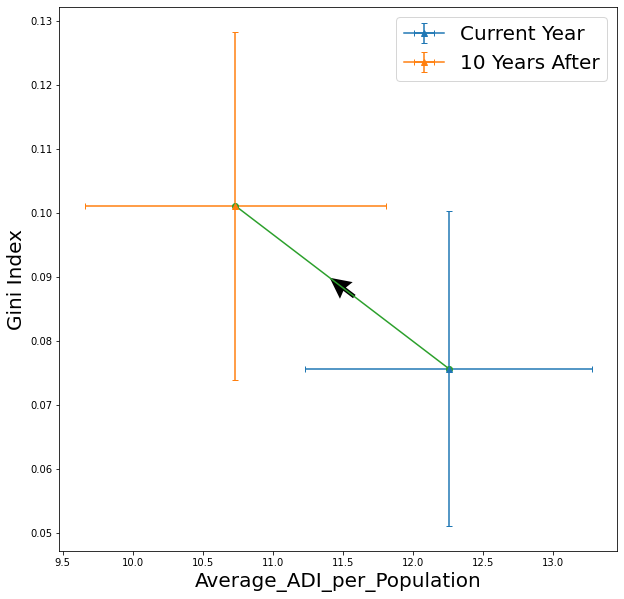


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 63 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease


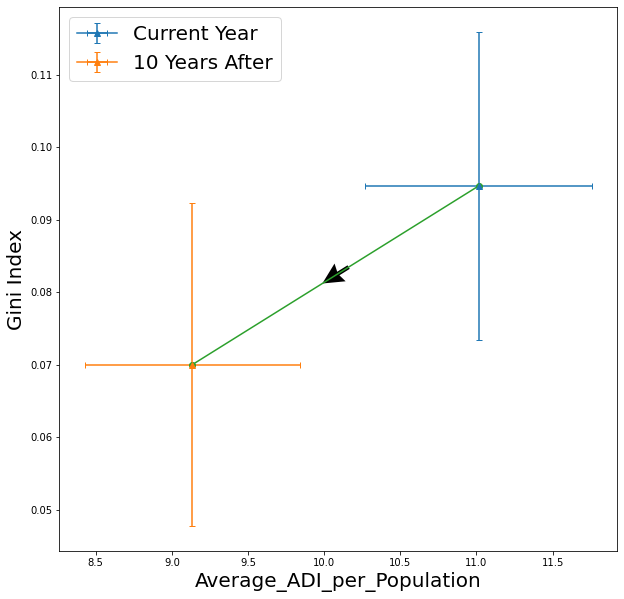


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 44 

Completed Plotting For ADI_level: High ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_high,"High ADI Development")

#### Counts and Test 1 : Low vs Medium 

   low_adi = 136
 | med_adi = 134
 | high_adi= 136



In [ ]:
#(136, 134, 136)
# [8.667,10.163]


n1 = 136
n2 = 134

y1 = 5
y2 = 9

run_zTest(y1,y2,n1,n2)

5 9 136 134
p1_hat : 0.03676470588235294
p2_hat : 0.06716417910447761
p_hat : 0.05185185185185185
z_test : -1.1263822367376521


In [ ]:
# 8.0 - 10.0

n1 = 84
n2 = 172

y1 = 4
y2 = 9

run_zTest(y1,y2,n1,n2)

4 9 84 172
p1_hat : 0.047619047619047616
p2_hat : 0.05232558139534884
p_hat : 0.05078125
z_test : -0.16104610141182168


In [ ]:
#9.0 - 12.0


#(low , medium , high)
#(163, 180, 63)

n1 = 163
n2 = 180

y1 = 7
y2 = 15

run_zTest(y1,y2,n1,n2)


7 15 163 180
p1_hat : 0.04294478527607362
p2_hat : 0.08333333333333333
p_hat : 0.0641399416909621
z_test : -1.5246547074219752


In [ ]:
# 10.0 - 12.0

#(low , medium , high)
#(256, 87, 63)

n1 = 256
n2 = 87

y1 = 13
y2 = 9

run_zTest(y1,y2,n1,n2)

13 9 256 87
p1_hat : 0.05078125
p2_hat : 0.10344827586206896
p_hat : 0.0641399416909621
z_test : -1.7322142482877128


#### Counts and Test 2 : Low vs High 

   low_adi = 136
 | med_adi = 134
 | high_adi= 136



In [ ]:
#(136, 134, 136)
# [8.667,10.163]

n1 = 136
n2 = 136

y1 = 5
y2 = 18

run_zTest(y1,y2,n1,n2)

5 18 136 136
p1_hat : 0.03676470588235294
p2_hat : 0.1323529411764706
p_hat : 0.08455882352941177
z_test : -2.8331150605639497


#### Pattern seen in Low ADI Districts  

##### ADi Increase Gini Decrease

###### Low vs Medium

In [ ]:
#(136, 134, 136)



n1 = 136
n2 = 134

y1 = 76
y2 = 27

run_zTest(y1,y2,n1,n2)

76 27 136 134
p1_hat : 0.5588235294117647
p2_hat : 0.20149253731343283
p_hat : 0.3814814814814815
z_test : 6.043625885587988


###### Low vs High

In [ ]:
#(136, 134, 136)



n1 = 136
n2 = 136

y1 = 76
y2 = 11

run_zTest(y1,y2,n1,n2)

76 11 136 136
p1_hat : 0.5588235294117647
p2_hat : 0.08088235294117647
p_hat : 0.31985294117647056
z_test : 8.449914569310298


## Districts in the ending phase of their kuznets curve generally have a high level of development.


---
P(Positive Adi Change , Negative Gini Change | High ADI Development ) = 
P(Positive Adi Change , Negative Gini Change | Low ADI Development )


---
P(Positive Adi Change , Negative Gini Change | High ADI Development ) = 
P(Positive Adi Change ,Negative Gini Change | Medium ADI Development ) 


### Range 1 : 2001 - 2011

In [ ]:
gini_dat_range1_low,gini_dat_range1_medium,gini_dat_range1_high  = get_low_medium_high_df(gini_dat_range1,[8.667,10.163])

In [ ]:
len(gini_dat_range1_low) , len(gini_dat_range1_medium) , len(gini_dat_range1_high)

(200, 136, 70)


Plotting For ADI_level: Low ADI Development 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase


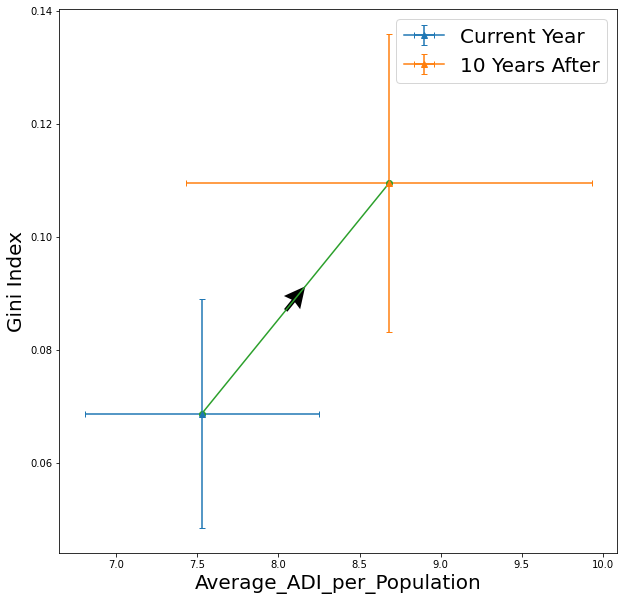


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 145 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease


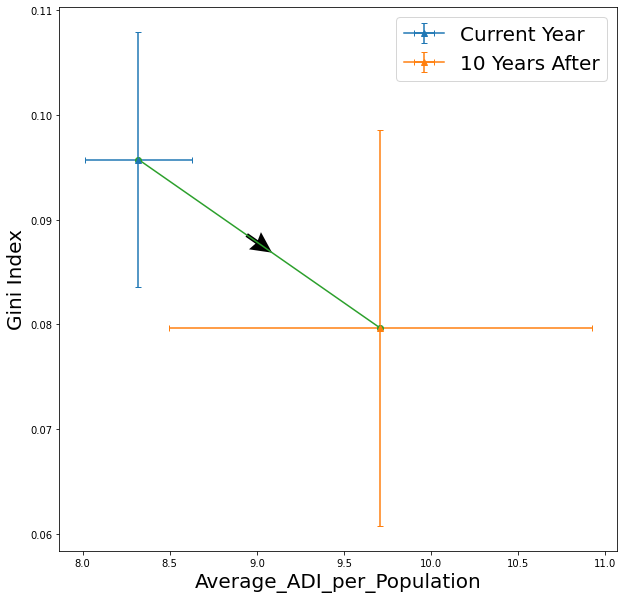


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 16 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase


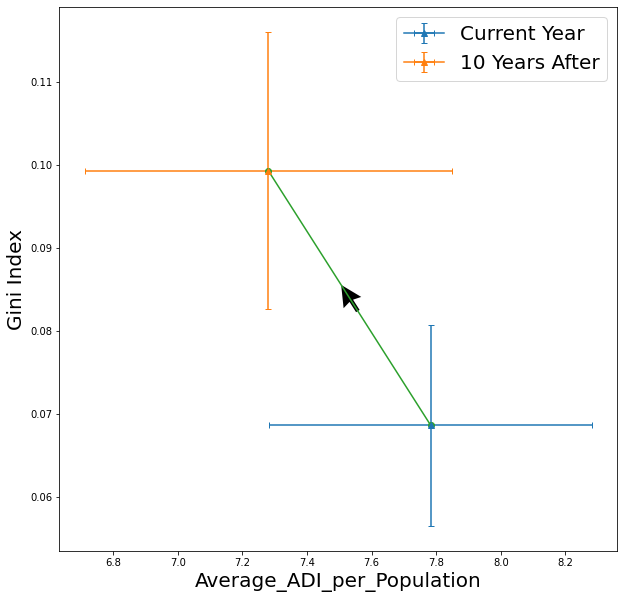


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 31 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease


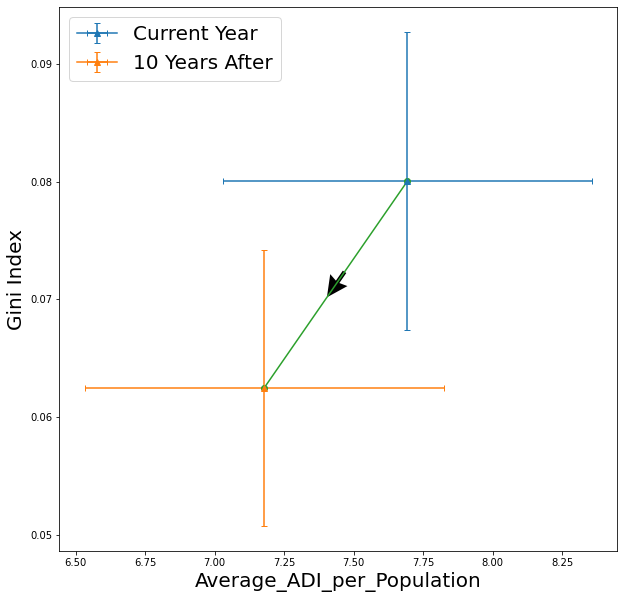


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 8 

Completed Plotting For ADI_level: Low ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_low,"Low ADI Development")


Plotting For ADI_level: Medium ADI Development 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase


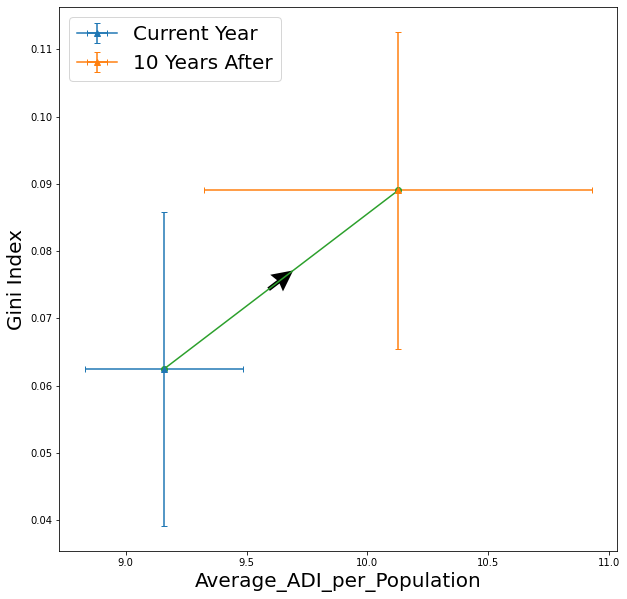


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 83 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease


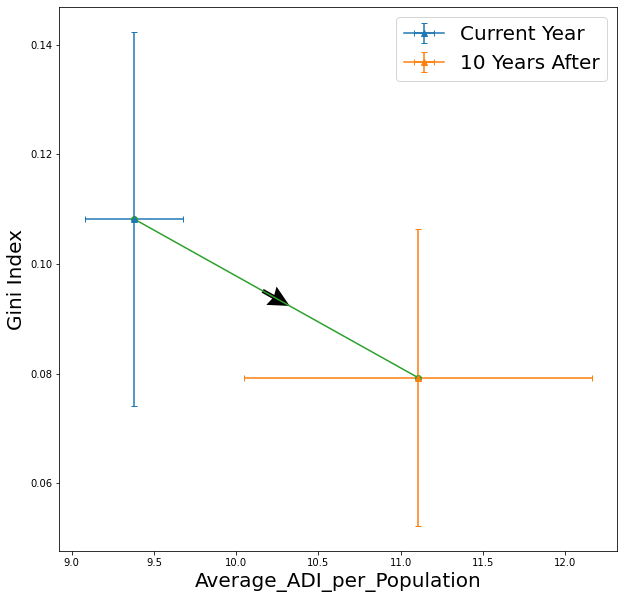


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 22 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase


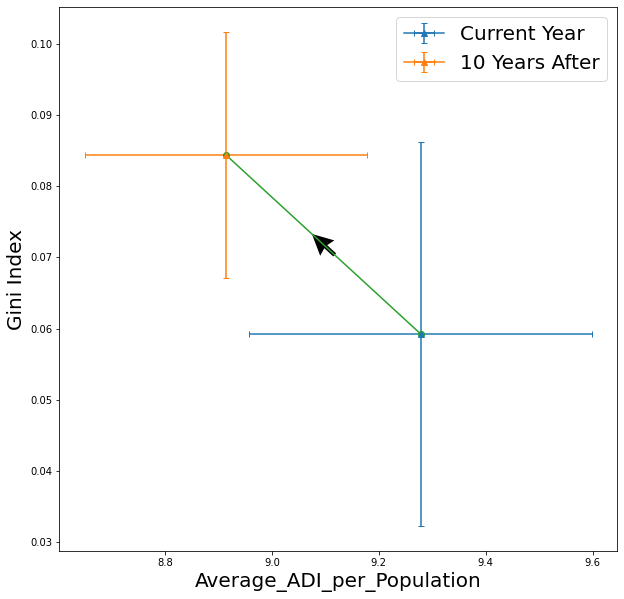


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 19 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease


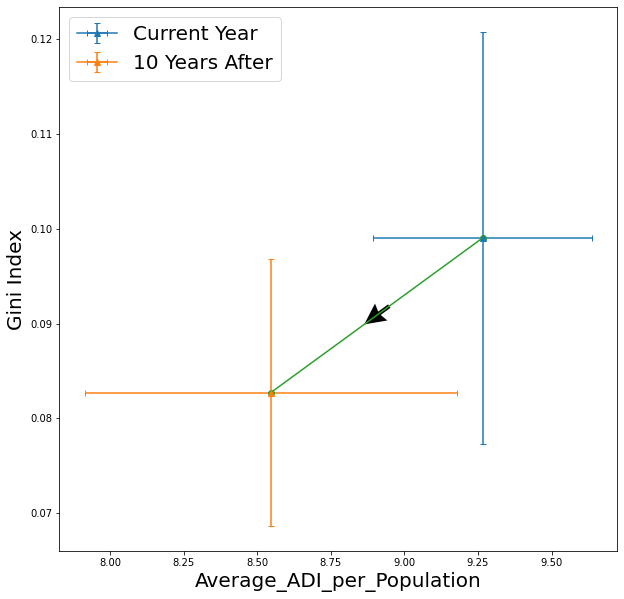


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 10 

Completed Plotting For ADI_level: Medium ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_medium,"Medium ADI Development")


Plotting For ADI_level: High ADI Development 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase


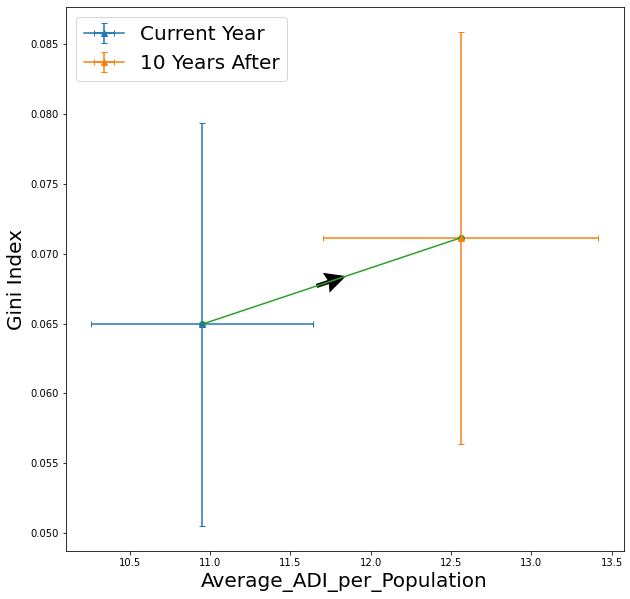


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 3 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease


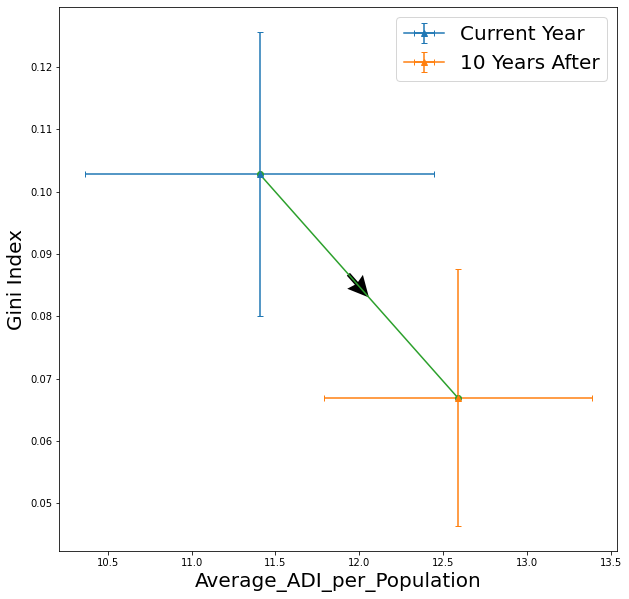


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 42 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase


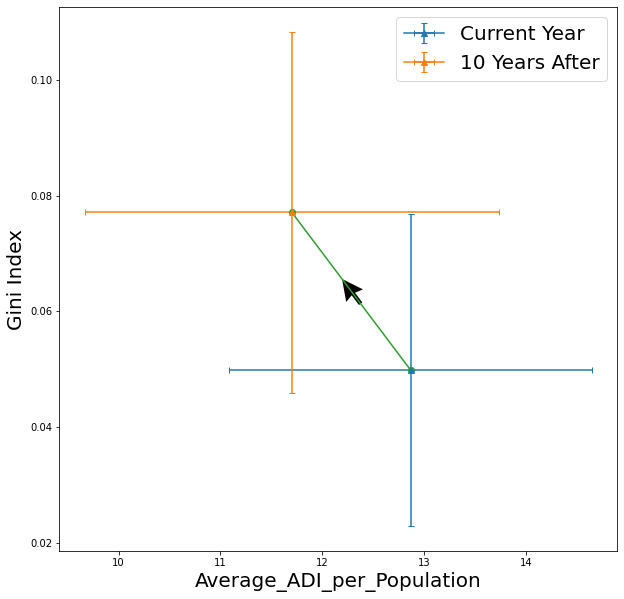


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 10 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease


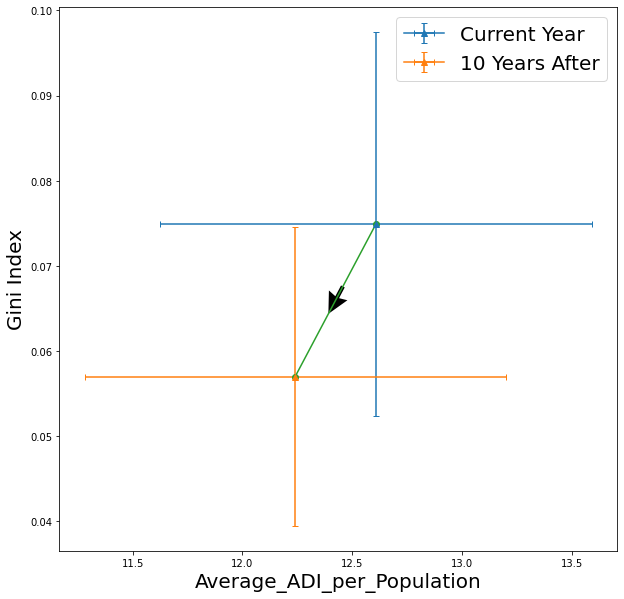


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 15 

Completed Plotting For ADI_level: High ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range1_high,"High ADI Development")

#### Counts and Test 1 : High vs Low 

   low_adi = 200
 | med_adi = 136
 | high_adi= 70



In [ ]:
(200, 136, 70)

n1 = 70
n2 = 200

y1 = 42
y2 = 16

run_zTest(y1,y2,n1,n2)

42 16 70 200
p1_hat : 0.6
p2_hat : 0.08
p_hat : 0.21481481481481482
z_test : 9.117322484744427


#### Counts and Test 2 : High vs Medium 

   low_adi = 200
 | med_adi = 136
 | high_adi= 70



In [ ]:
n1 = 70
n2 = 136

y1 = 42
y2 = 22

run_zTest(y1,y2,n1,n2)

42 22 70 136
p1_hat : 0.6
p2_hat : 0.16176470588235295
p_hat : 0.3106796116504854
z_test : 6.4376190958328925


### Range 2 : 2011 - 2019

In [ ]:
gini_dat_range2_low,gini_dat_range2_medium,gini_dat_range2_high  = get_low_medium_high_df(gini_dat_range2,[8.667,10.163])

In [ ]:
len(gini_dat_range2_low) , len(gini_dat_range2_medium) , len(gini_dat_range2_high)

(136, 134, 136)


Plotting For ADI_level: Low ADI Development 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Increase


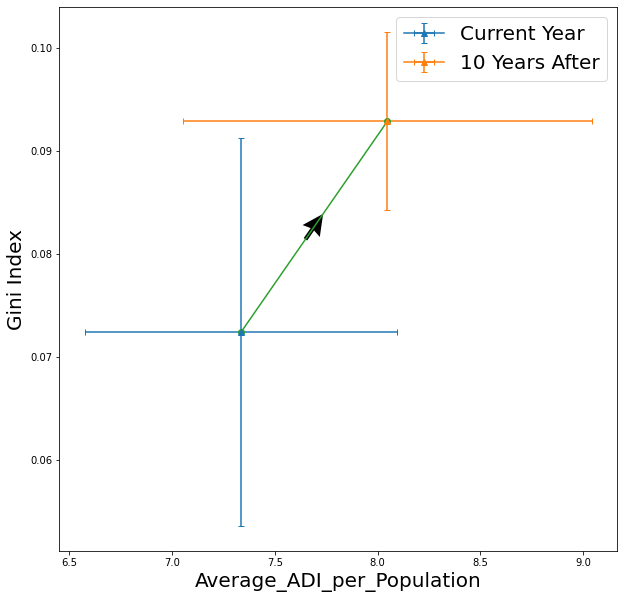


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 5 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Increase_Gini_Decrease


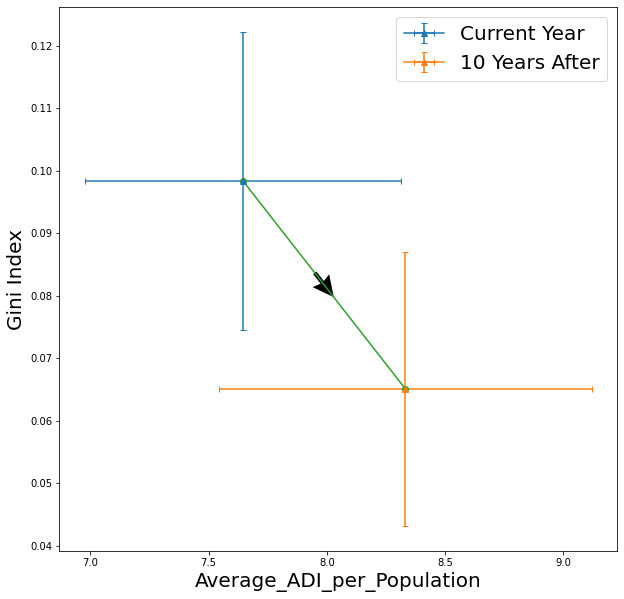


Completed Plotting For  Combo: Low ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 76 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Increase


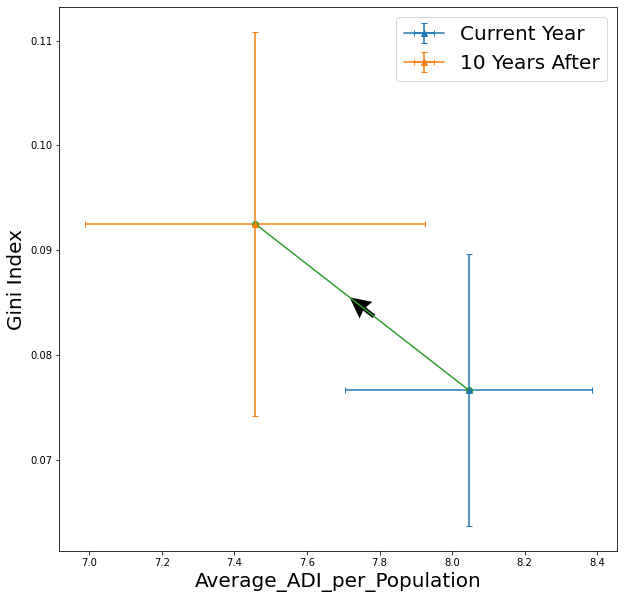


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 10 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Low ADI Development_ADI_Decrease_Gini_Decrease


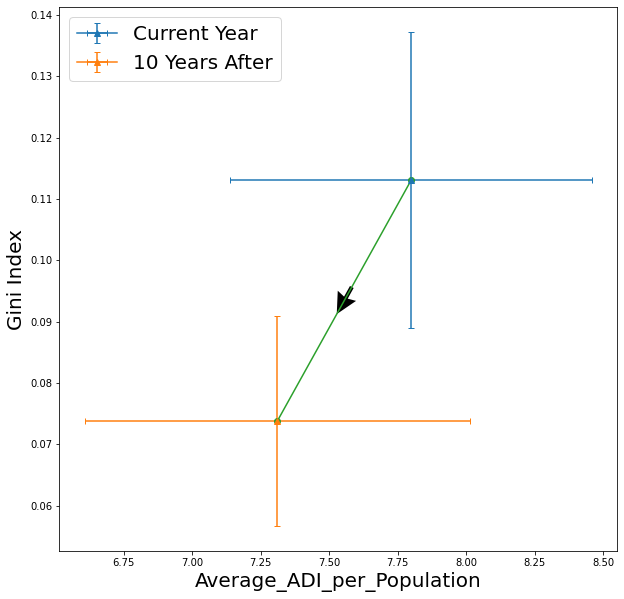


Completed Plotting For  Combo: Low ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 43 

Completed Plotting For ADI_level: Low ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_low,"Low ADI Development")


Plotting For ADI_level: Medium ADI Development 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Increase


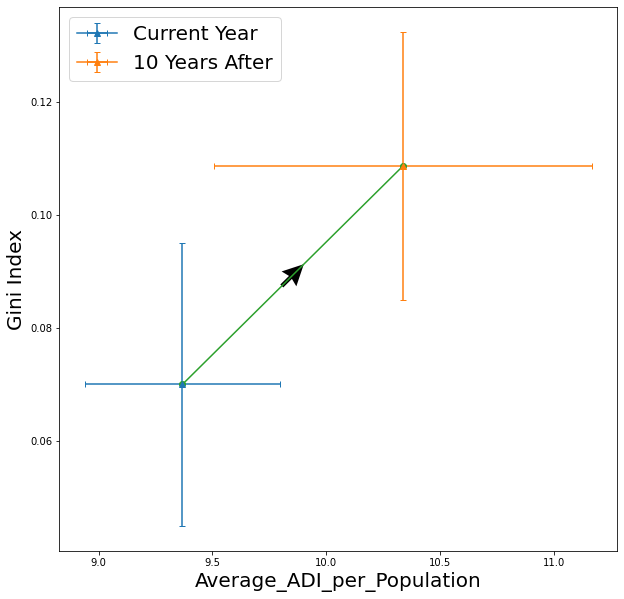


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 9 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Increase_Gini_Decrease


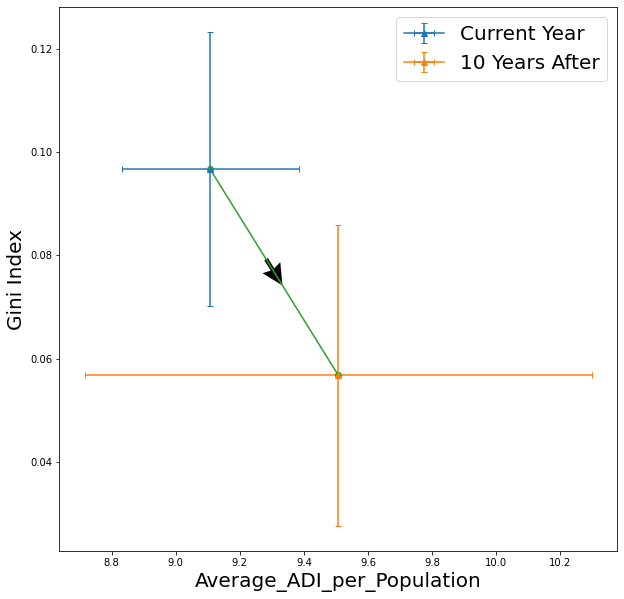


Completed Plotting For  Combo: Medium ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 27 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Increase


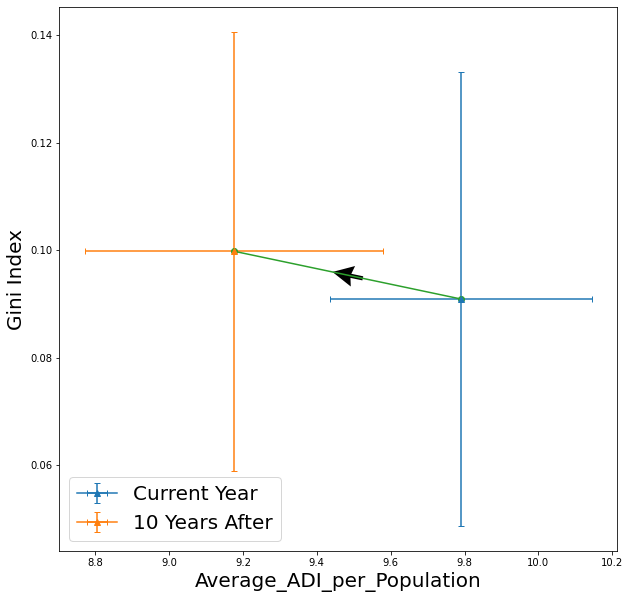


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 7 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease


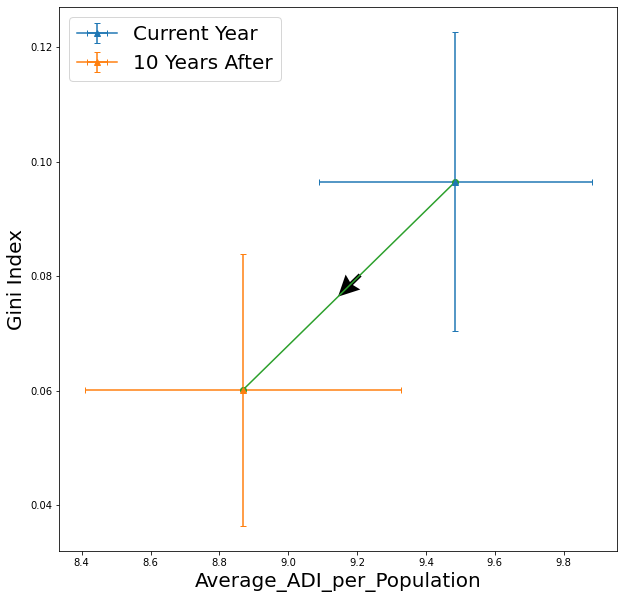


Completed Plotting For  Combo: Medium ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 91 

Completed Plotting For ADI_level: Medium ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_medium,"Medium ADI Development")


Plotting For ADI_level: High ADI Development 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Increase


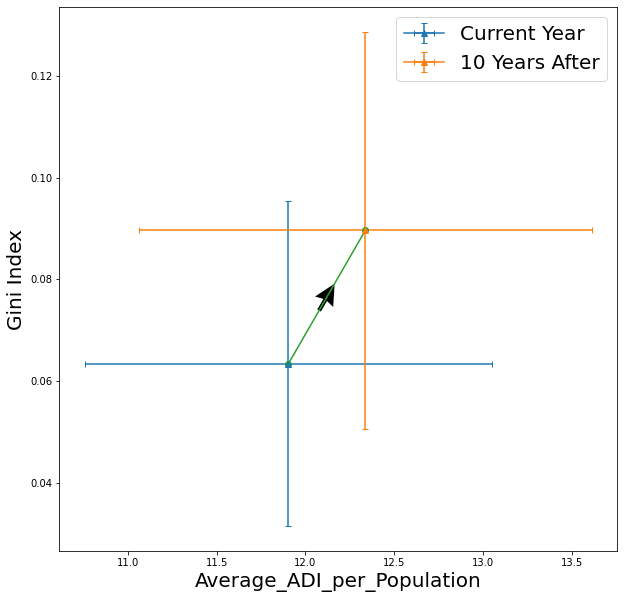


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Increase  Total Districts with this combo : 18 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Increase_Gini_Decrease


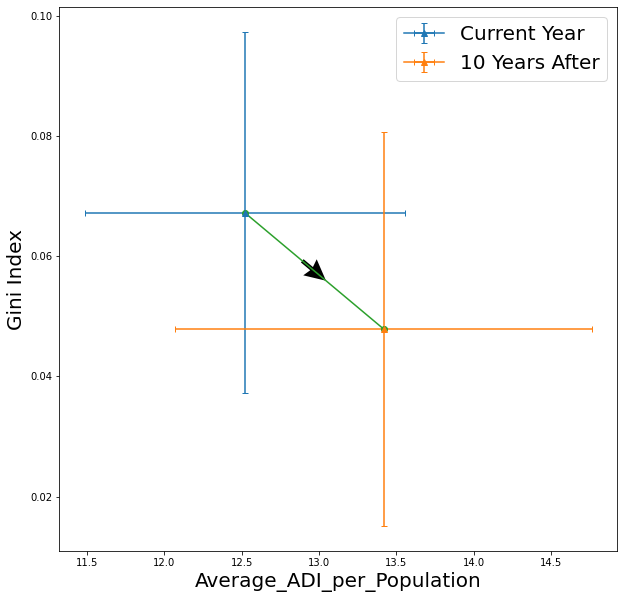


Completed Plotting For  Combo: High ADI Development_ADI_Increase_Gini_Decrease  Total Districts with this combo : 11 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Increase


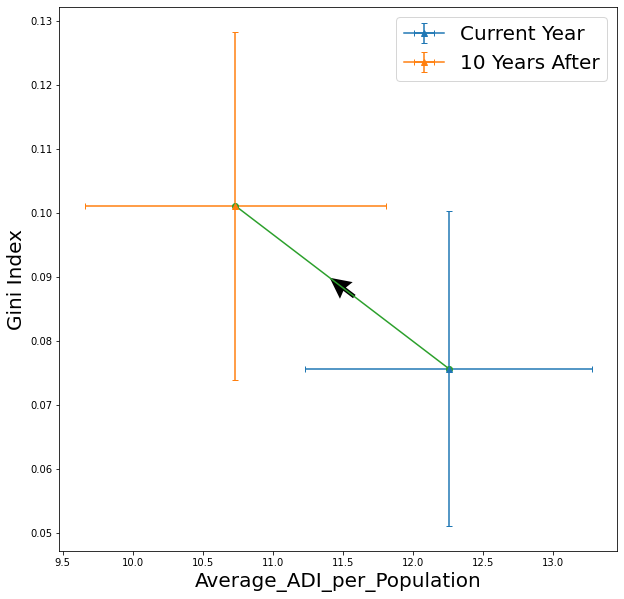


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Increase  Total Districts with this combo : 63 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease 

Plotting For Combo: High ADI Development_ADI_Decrease_Gini_Decrease


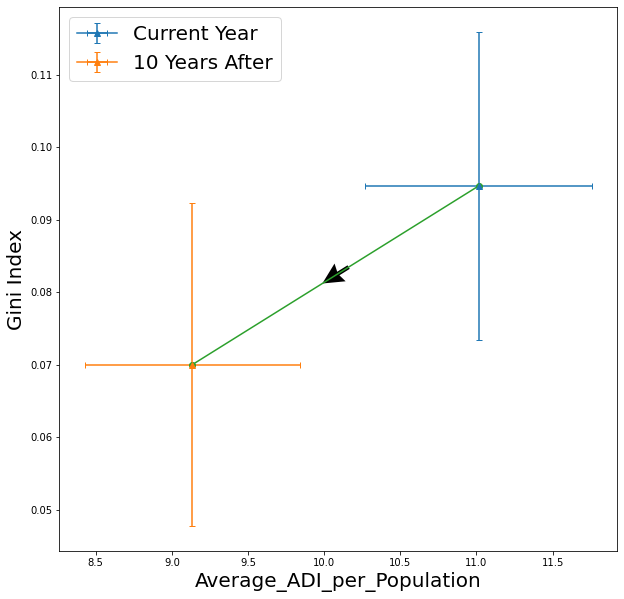


Completed Plotting For  Combo: High ADI Development_ADI_Decrease_Gini_Decrease  Total Districts with this combo : 44 

Completed Plotting For ADI_level: High ADI Development 


In [ ]:
plot_gini_5_combo(gini_dat_range2_high,"High ADI Development")

#### Counts and Test 1 : High vs Low 

   low_adi = 136
 | med_adi = 134
 | high_adi= 136



In [ ]:
#(136, 134, 136)
# [8.667,10.163]


n1 = 136
n2 = 136

y1 = 11
y2 = 76

run_zTest(y1,y2,n1,n2)

11 76 136 136
p1_hat : 0.08088235294117647
p2_hat : 0.5588235294117647
p_hat : 0.31985294117647056
z_test : -8.449914569310298


#### Counts and Test 2 : High vs Medium 

   low_adi = 136
 | med_adi = 134
 | high_adi= 136



In [ ]:
#(136, 134, 136)
# [8.667,10.163]

n1 = 136
n2 = 134

y1 = 11
y2 = 27

run_zTest(y1,y2,n1,n2)

11 27 136 134
p1_hat : 0.08088235294117647
p2_hat : 0.20149253731343283
p_hat : 0.14074074074074075
z_test : -2.8493901984282863


#OLS Model

## Code

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


def getOLSModel(X,Y):
  new_X = X.copy()
  new_X = sm.add_constant(new_X)
  model = sm.OLS(Y,new_X)
  results = model.fit()
  print(results.params)
  print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## OLS Model for ADI and change in ADI

#### Perpare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  MSW_2011  \
index_col_village_code_2011                                 ...             
27378                                             5.206159  ...         3   
27379                                             4.918317  ...         3   
27380                                             4.686912  ...         3   
2738

In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  P_ST_2001  \
index_col_village_code_2011                                 ...              
27378                                             5.206159  ...          0   
27379                                             4.918317  ...          0   
27380                                             4.686912  ...          0   

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  \
index_col_village_code_2011                                 ...   
27378                                             5.206159  ...   
27379                                             4.918317  ...   
27380                                             4.686912  ...   
27381                                             6.78

In [ ]:
df_vil_dist_1 = df_merged_village_district[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644661                             10        13        14   
644682                              9        15        12   
644683                             10        15        14   
644687                             10        13        12   
644693                             10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  Gini_2001  \
index_col_village_code_2011                                             
27378                                             5.206159   0.081987   
27379                                             4.918317   0.081987   
27380                                             4.686912   0.081987   
27381                                             6.789658   0.081987   
27382                                             6.719902   0.081987   
...                                                    ...        ...   
644661                                            2.633434   0.045931   
644682                                            2.619559   0.045931   
644683                                            3.281726   0.045931   
644687                                            6.000318   0.045931   
644693                                            9.572551   0.045931   

                             Gini_2011  Gini_2019  \
index_col_village_code_2011                         
27378                         0.047189   0.047450   
27379                         0.047189   0.047450   
27380                         0.047189   0.047450   
27381                         0.047189   0.047450   
27382                         0.047189   0.047450   
...                                ...        ...   
644661                        0.050380   0.054511   
644682                        0.050380   0.054511   
644683                        0.050380   0.054511   
644687                        0.050380   0.054511   
644693                        0.050

In [ ]:
df_vil_dist_2 = df_merged_village_district[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Final_ADI_2001_2011']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644661                                             3                     10   
644682                                             6                      9   
644683                                             5                     10   
644687                                             3                     10   
644693                                             5                     10   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644661                                              0.045931   
644682                                              0.045931   
644683                                              0.045931   
644687                                              0.045931   
644693                                              0.045931   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644661                                                -0.545362   
644682                                                -1.545362   
644683                                                -0.545362   
644687                                                -0.545362   
644693                                                -0.545362   

                             Final_ADI_2001_2011  
index_col_village_code_2011                       
27378                                         11  
27379                                         11  
27380                                         11  
27381                                         11  
27382                                         11  
...                                          ...  
644661                                        13  
644682                        

In [ ]:
df_vil_dist_3 = df_merged_village_district[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Final_ADI_2011_2019']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644661                                             1                     13   
644682                                            -3                     15   
644683                                            -1                     15   
644687                                            -1                     13   
644693                                            -5                     15   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644661                                              0.050380   
644682                                              0.050380   
644683                                              0.050380   
644687                                              0.050380   
644693                                              0.050380   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644661                                                -0.671448   
644682                                                 1.328552   
644683                                                 1.328552   
644687                                                -0.671448   
644693                                                 1.328552   

                             Final_ADI_2011_2019  
index_col_village_code_2011                       
27378                                         13  
27379                                         13  
27380                                         13  
27381                                         11  
27382                                         13  
...                                          ...  
644661                                        14  
644682                        

#### ADI vs Distance and Gini

##### 2001

###### vs Distance

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('distance_district_centre_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                            9.018442
distance_district_centre_2001   -0.030075
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:02:38   Log-Likelihood:            -6.1142e+05
No. Observations:              305457   AIC:                         1.223e+06
Df Residuals:                  305455   BIC:                         1.223e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

###### vs Gini

In [ ]:

X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const        7.72940
Gini_2001    8.34957
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4095.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:55:14   Log-Likelihood:            -6.1712e+05
No. Observations:              305457   AIC:                         1.234e+06
Df Residuals:                  305455   BIC:                         1.234e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Village_ADI-Avg_district_ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                 8.581374
Village_ADI_District_ADI_Diff_2001    0.913723
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 2.103e+05
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:55:05   Log-Likelihood:            -5.3916e+05
No. Observations:              305457   AIC:                         1.078e+06
Df Residuals:                  305455   BIC:                         1.078e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011

###### vs distance

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('distance_district_centre_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                            10.013659
distance_district_centre_2011    -0.047746
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                 2.094e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:04:17   Log-Likelihood:            -6.7668e+05
No. Observations:              305457   AIC:                         1.353e+06
Df Residuals:                  305455   BIC:                         1.353e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs GIni

In [ ]:
#X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre')]]

X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011')]]



Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const        11.111322
Gini_2011   -21.591314
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                 2.054e+04
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:55:46   Log-Likelihood:            -6.7686e+05
No. Observations:              305457   AIC:                         1.354e+06
Df Residuals:                  305455   BIC:                         1.354e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Village_ADI-Avg_district_ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 9.329891
Village_ADI_District_ADI_Diff_2011    0.946890
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 2.720e+05
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:56:08   Log-Likelihood:            -5.8955e+05
No. Observations:              305457   AIC:                         1.179e+06
Df Residuals:                  305455   BIC:                         1.179e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2019

###### vs Distance

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('distance_district_centre_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                            9.356672
distance_district_centre_2019   -0.052081
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                 2.267e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:05:16   Log-Likelihood:            -5.9473e+05
No. Observations:              305457   AIC:                         1.189e+06
Df Residuals:                  305455   BIC:                         1.189e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

###### vs Gini

In [ ]:
#X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre')]]


X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019')]]



Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

const        8.869682
Gini_2019   -2.658001
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     559.6
Date:                Thu, 03 Mar 2022   Prob (F-statistic):          1.35e-123
Time:                        08:56:24   Log-Likelihood:            -6.0538e+05
No. Observations:              305457   AIC:                         1.211e+06
Df Residuals:                  305455   BIC:                         1.211e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Village_ADI-Avg_district_ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

const                                 8.896369
Village_ADI_District_ADI_Diff_2019    0.915481
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 2.521e+05
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:56:44   Log-Likelihood:            -5.1375e+05
No. Observations:              305457   AIC:                         1.027e+06
Df Residuals:                  305455   BIC:                         1.028e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### change in ADI vs ADI,Gini,Distance,vil_adi_dist_adi

##### 2001-2011

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                      

###### vs Distance

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('distance_district_centre_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                            0.898894
distance_district_centre_2001   -0.010314
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.004
Method:                      Least Squares   F-statistic:                     1360.
Date:                     Mon, 28 Mar 2022   Prob (F-statistic):          5.41e-297
Time:                             01:06:31   Log-Likelihood:            -6.5977e+05
No. Observations:                   305457   AIC:                         1.320e+06
Df Residuals:                       305455   BIC:                         1.320e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Gini

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                             -0.078329
Initial_Gini_District_2001_2011    9.974615
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.014
Model:                                 OLS   Adj. R-squared:                  0.014
Method:                      Least Squares   F-statistic:                     4464.
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                             09:01:04   Log-Likelihood:            -6.5824e+05
No. Observations:                   305457   AIC:                         1.316e+06
Df Residuals:                       305455   BIC:                         1.316e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Initial ADI

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                    3.819843
Initial_ADI_2001_2011   -0.376600
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.108
Model:                                 OLS   Adj. R-squared:                  0.108
Method:                      Least Squares   F-statistic:                 3.707e+04
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                             09:01:21   Log-Likelihood:            -6.4296e+05
No. Observations:                   305457   AIC:                         1.286e+06
Df Residuals:                       305455   BIC:                         1.286e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs vil_ADI_diff_dist_adi

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 0.489770
Village_ADI_District_ADI_Diff_2001   -0.745867
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.207
Model:                                 OLS   Adj. R-squared:                  0.207
Method:                      Least Squares   F-statistic:                 7.989e+04
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                             09:02:06   Log-Likelihood:            -6.2497e+05
No. Observations:                   305457   AIC:                         1.250e+06
Df Residuals:                       305455   BIC:                         1.250e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                         coef    st

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs all 4

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 1.607027
distance_district_centre_2001        -0.020298
Initial_Gini_District_2001_2011       6.789863
Initial_ADI_2001_2011                -0.136090
Village_ADI_District_ADI_Diff_2001   -0.626741
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.233
Model:                                 OLS   Adj. R-squared:                  0.233
Method:                      Least Squares   F-statistic:                 2.243e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             14:47:44   Log-Likelihood:            -6.0046e+05
No. Observations:                   295800   AIC:                         1.201e+06
Df Residuals:                       295795   BIC:                         1.201e+06
Df Model:                                4                                    

##### 2011-2019

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  ...  Final_ADI_2011_2019
index_col_village_code_2011                           ...                     
27378                                              2  ...                   13
27379                                              2  ...                   13
27380                                              2  ...                   13
27381                                              0  ...                   11
27382                                              2  ...                   13
...                                              ...  ...                  ...
644661                                             1  ...                   14
644682                                            -3  ...                   12
644683                                            -1  ...                   14
644687                                            -1  ...                   12
644693                                            -5  ...                   10

[305457 rows x 6 columns]

###### vs Distance

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('distance_district_centre_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                           -0.504783
distance_district_centre_2011    0.007186
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     541.6
Date:                     Mon, 28 Mar 2022   Prob (F-statistic):          1.09e-119
Time:                             01:07:35   Log-Likelihood:            -6.5644e+05
No. Observations:                   305457   AIC:                         1.313e+06
Df Residuals:                       305455   BIC:                         1.313e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Gini

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                             -0.490288
Initial_Gini_District_2011_2019    1.385404
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     96.55
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):           8.79e-23
Time:                             09:02:46   Log-Likelihood:            -6.5666e+05
No. Observations:                   305457   AIC:                         1.313e+06
Df Residuals:                       305455   BIC:                         1.313e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs Initial ADI

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                    5.211769
Initial_ADI_2011_2019   -0.616664
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.463
Model:                                 OLS   Adj. R-squared:                  0.463
Method:                      Least Squares   F-statistic:                 2.635e+05
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                             09:03:02   Log-Likelihood:            -5.6173e+05
No. Observations:                   305457   AIC:                         1.123e+06
Df Residuals:                       305455   BIC:                         1.123e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs vil_ADI_diff_dist_adi

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                                -0.600302
Village_ADI_District_ADI_Diff_2011   -0.769183
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.378
Model:                                 OLS   Adj. R-squared:                  0.378
Method:                      Least Squares   F-statistic:                 1.860e+05
Date:                     Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                             09:03:19   Log-Likelihood:            -5.8407e+05
No. Observations:                   305457   AIC:                         1.168e+06
Df Residuals:                       305455   BIC:                         1.168e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                         coef    st

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs all 4

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 5.672781
distance_district_centre_2011        -0.020706
Initial_Gini_District_2011_2019      -9.748616
Initial_ADI_2011_2019                -0.527011
Village_ADI_District_ADI_Diff_2011   -0.306578
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.540
Model:                                 OLS   Adj. R-squared:                  0.540
Method:                      Least Squares   F-statistic:                 8.694e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             15:03:51   Log-Likelihood:            -5.2174e+05
No. Observations:                   295800   AIC:                         1.043e+06
Df Residuals:                       295795   BIC:                         1.044e+06
Df Model:                                4                                    

# Plot CDF for Gini

### Get Data

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


### 2001

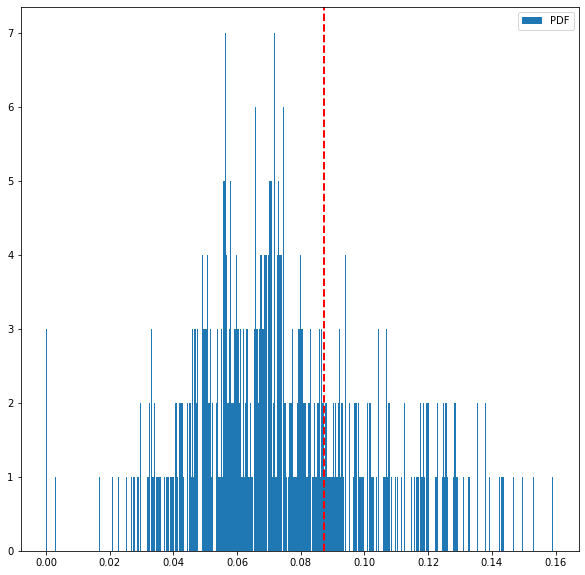

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Gini_2001'], bins=400)
plt.hist(df_district['Gini_2001'], bins=400,label='PDF')
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)

(400, 401)

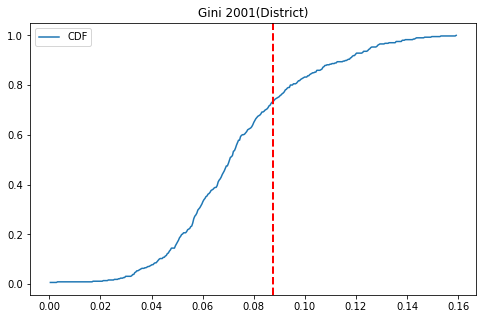

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.title('Gini 2001(District)')
plt.legend()
plt.show()

###  2011

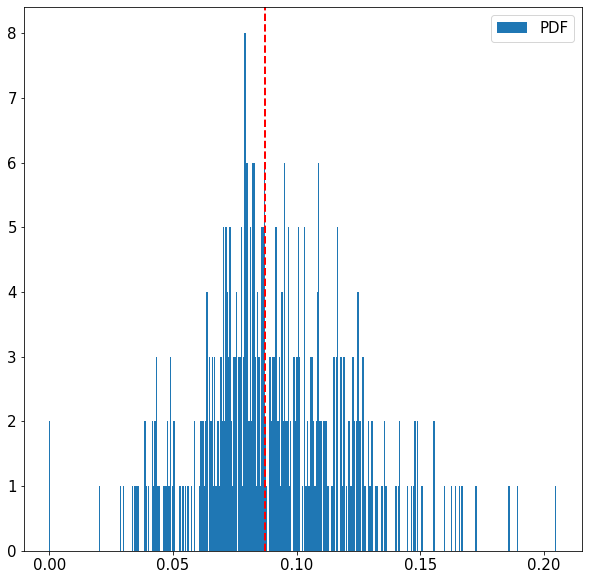

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Gini_2011'], bins=400)
plt.hist(df_district['Gini_2011'], bins=400,label='PDF')
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)


(400, 401)

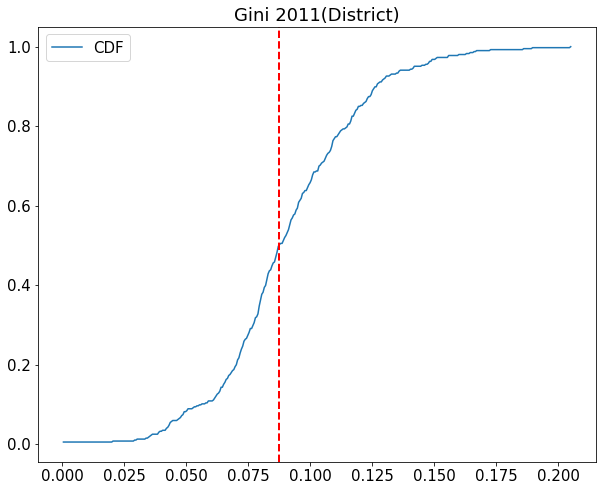

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(10,8))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.title('Gini 2011(District)')
plt.legend()
plt.show()

#### Identifying Divider/Discretizer

In [ ]:
test_data,bin_div = pd.qcut(df_district['Gini_2011'], q=2,retbins=True)

In [ ]:
bin_div

array([0.        , 0.08744117, 0.20502552])

In [ ]:
test_data.value_counts()

(-0.001, 0.0874]    203
(0.0874, 0.205]     203
Name: Gini_2011, dtype: int64

### 2019

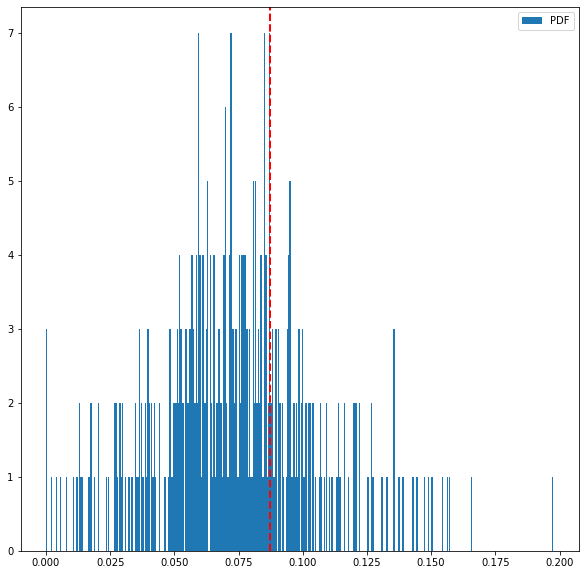

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_district['Gini_2019'], bins=400)
plt.hist(df_district['Gini_2019'], bins=400,label='PDF')
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [ ]:
len(count),len(bins_count)


(400, 401)

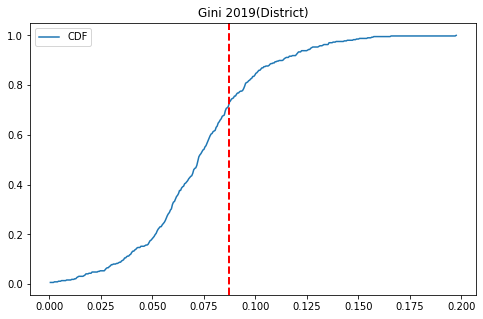

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,5))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(0.0874, color='red', linestyle='dashed', linewidth=2)
plt.title('Gini 2019(District)')
plt.legend()
plt.show()

# Hypothesis Related to Change in Gini

## Get Data

In [ ]:
df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df['Change_in_gini_2001_2011'] = df['Gini_2011'] - df['Gini_2001']

In [ ]:
df['Change_in_gini_2011_2019'] = df['Gini_2019'] - df['Gini_2011']

In [ ]:
df1 = df[['Change_in_gini_2001_2011','Gini_2001','Average_ADI_per_population_2001']]

In [ ]:
df1

Change_in_gini_2001_2011  Gini_2001  \
STATE_CODE_2011 DIST_CODE_2011                                        
3.0             35.0                           -0.034797   0.081987   
                37.0                           -0.014326   0.049305   
                38.0                           -0.027885   0.067285   
                39.0                           -0.056593   0.092315   
                40.0                           -0.098349   0.128257   
...                                                  ...        ...   
33.0            627.0                           0.000000   0.000000   
                630.0                           0.032928   0.039200   
                631.0                           0.034814   0.045161   
                632.0                          -0.003493   0.042210   
                633.0                           0.004449   0.045931   

                                Average_ADI_per_population_2001  
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0                                  12.775300  
                37.0                                  13.938165  
                38.0                                  13.794523  
                39.0                                  13.207238  
                40.0                                  10.537720  
...                                                         ...  
33.0            627.0                                  9.000000  
                630.0                                  9.252615  
                631.0                                  9.417554  
                632.0                                 14.201804  
                633.0                                 10.545362  

[406 rows x 3 columns]

In [ ]:
df2 = df[['Change_in_gini_2011_2019','Gini_2011','Average_ADI_per_population_2011']]

In [ ]:
df2

Change_in_gini_2011_2019  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                        
3.0             35.0                            0.000260   0.047189   
                37.0                            0.016376   0.034979   
                38.0                            0.021386   0.039400   
                39.0                            0.013051   0.035722   
                40.0                            0.003293   0.029908   
...                                                  ...        ...   
33.0            627.0                           0.000000   0.000000   
                630.0                           0.030178   0.072128   
                631.0                           0.033983   0.079975   
                632.0                          -0.038716   0.038716   
                633.0                           0.004131   0.050380   

                                Average_ADI_per_population_2011  
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0                                  13.081624  
                37.0                                  13.961504  
                38.0                                  13.957830  
                39.0                                  13.912353  
                40.0                                  13.644266  
...                                                         ...  
33.0            627.0                                  8.000000  
                630.0                                  9.642899  
                631.0                                 11.119372  
                632.0                                 13.887902  
                633.0                                 13.671448  

[406 rows x 3 columns]

In [ ]:
df3 = df1.copy()
df3.index = range(1,407)
df3 = df3.rename(columns={"Change_in_gini_2001_2011": "Change_in_gini", "Gini_2001": "Initial_gini" , "Average_ADI_per_population_2001":"Inital_ADI"})

In [ ]:
df3

Change_in_gini  Initial_gini  Inital_ADI
1         -0.034797      0.081987   12.775300
2         -0.014326      0.049305   13.938165
3         -0.027885      0.067285   13.794523
4         -0.056593      0.092315   13.207238
5         -0.098349      0.128257   10.537720
..              ...           ...         ...
402        0.000000      0.000000    9.000000
403        0.032928      0.039200    9.252615
404        0.034814      0.045161    9.417554
405       -0.003493      0.042210   14.201804
406        0.004449      0.045931   10.545362

[406 rows x 3 columns]

In [ ]:
df4 = df2.copy()
df4.index = range(1,407)
df4 = df4.rename(columns={"Change_in_gini_2011_2019": "Change_in_gini", "Gini_2011": "Initial_gini", "Average_ADI_per_population_2011":"Inital_ADI"})

In [ ]:
df4

Change_in_gini  Initial_gini  Inital_ADI
1          0.000260      0.047189   13.081624
2          0.016376      0.034979   13.961504
3          0.021386      0.039400   13.957830
4          0.013051      0.035722   13.912353
5          0.003293      0.029908   13.644266
..              ...           ...         ...
402        0.000000      0.000000    8.000000
403        0.030178      0.072128    9.642899
404        0.033983      0.079975   11.119372
405       -0.038716      0.038716   13.887902
406        0.004131      0.050380   13.671448

[406 rows x 3 columns]

## Districts with high inequality have a larger tendency to achieve equality.


---
P(Negative Gini Change  | High Level Initial Gini) = P(Negative Gini Change | Low Level Initial Gini)
Hypothesis for change in Gini

### Negative Change in Gini

In [ ]:
def getCount(data_set,column_name):
  neg_count = 0;
  pos_count = 0;
  total_count = len(data_set)

  for index,row in data_set.iterrows():
    if row[column_name] < 0:
      neg_count = neg_count + 1;

    else:
      pos_count = pos_count + 1;   

  print(" Total "+column_name+" : "+str(total_count),end='') 
  print(" Negative "+column_name+" : "+str(neg_count),end='')
  print(" Non-Negative "+column_name+" : "+str(pos_count),end='\n')

  return (total_count,neg_count,pos_count) 


import math

def p_hat(y1,y2,n1,n2):
  return (float(y1+y2))/(n1+n2)

def p1_hat(y1,y2,n1,n2):
  return (float(y1)/n1)

def p2_hat(y1,y2,n1,n2):
  return (float(y2)/n2)

def z_test(y1,y2,n1,n2):
  num = float(p1_hat(y1,y2,n1,n2) - p2_hat(y1,y2,n1,n2))
  p = p_hat(y1,y2,n1,n2)
  denom = math.sqrt(p * (1-p) * ((1.0/n1) + (1.0/n2)))
  return num/denom  

def run_zTest(y1,y2,n1,n2):
  print(y1,y2,n1,n2)
  print("p1_hat : "+str(p1_hat(y1,y2,n1,n2)))
  print("p2_hat : "+str(p2_hat(y1,y2,n1,n2)))
  print("p_hat : "+str(p_hat(y1,y2,n1,n2)))
  print("z_test : "+str(z_test(y1,y2,n1,n2)))

def hypothesis_test(indicator,df,range=None):
  #indicator = 'BF_2011'
  

  #high_gini_df = df[df['Intitial_Gini_level']==2]
  #low_gini_df = df[df['Intitial_Gini_level']==1]


  high_gini_df = df[df['Initial_gini'] > 0.0874]
  low_gini_df = df[df['Initial_gini'] <= 0.0874]
  
  '''
  random_sample_high_lit = high_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  random_sample_low_lit = low_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  random_sample_medium_lit = medium_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  '''

  
  random_sample_high_gini = high_gini_df
  random_sample_low_gini = low_gini_df
  

  print("High  vs Low "+indicator)
  n1,y1,_ = getCount(random_sample_high_gini,indicator)
  n2,y2,_ = getCount(random_sample_low_gini,indicator)
  run_zTest(y1,y2,n1,n2)


#### 2001-2011

In [ ]:
hypothesis_test('Change_in_gini',df3)

High  vs Low Change_in_gini
 Total Change_in_gini : 108 Negative Change_in_gini : 71 Non-Negative Change_in_gini : 37
 Total Change_in_gini : 298 Negative Change_in_gini : 42 Non-Negative Change_in_gini : 256
71 42 108 298
p1_hat : 0.6574074074074074
p2_hat : 0.14093959731543623
p_hat : 0.27832512315270935
z_test : 10.260139203409146


#### 2011-2019

In [ ]:
hypothesis_test('Change_in_gini',df4)

High  vs Low Change_in_gini
 Total Change_in_gini : 203 Negative Change_in_gini : 178 Non-Negative Change_in_gini : 25
 Total Change_in_gini : 203 Negative Change_in_gini : 114 Non-Negative Change_in_gini : 89
178 114 203 203
p1_hat : 0.8768472906403941
p2_hat : 0.5615763546798029
p_hat : 0.7192118226600985
z_test : 7.068042290597694


## Districts that see non-postive change in equality tend to have low initial inequality .


---
P(Non-Negative Gini Change  | Low Level Initial Gini) = P(Non-Negative Gini Change | Low Level Initial Gini)
Hypothesis for change in Gini

### Non-Negative Change in Gini

In [ ]:
def getCount(data_set,column_name):
  neg_count = 0;
  pos_count = 0;
  total_count = len(data_set)

  for index,row in data_set.iterrows():
    if row[column_name] < 0:
      neg_count = neg_count + 1;

    else:
      pos_count = pos_count + 1;   

  print(" Total "+column_name+" : "+str(total_count),end='') 
  print(" Negative "+column_name+" : "+str(neg_count),end='')
  print(" Positive "+column_name+" : "+str(pos_count),end='\n')

  return (total_count,neg_count,pos_count) 


import math

def p_hat(y1,y2,n1,n2):
  return (float(y1+y2))/(n1+n2)

def p1_hat(y1,y2,n1,n2):
  return (float(y1)/n1)

def p2_hat(y1,y2,n1,n2):
  return (float(y2)/n2)

def z_test(y1,y2,n1,n2):
  num = float(p1_hat(y1,y2,n1,n2) - p2_hat(y1,y2,n1,n2))
  p = p_hat(y1,y2,n1,n2)
  denom = math.sqrt(p * (1-p) * ((1.0/n1) + (1.0/n2)))
  return num/denom  

def run_zTest(y1,y2,n1,n2):
  print(y1,y2,n1,n2)
  print("p1_hat : "+str(p1_hat(y1,y2,n1,n2)))
  print("p2_hat : "+str(p2_hat(y1,y2,n1,n2)))
  print("p_hat : "+str(p_hat(y1,y2,n1,n2)))
  print("z_test : "+str(z_test(y1,y2,n1,n2)))

def hypothesis_test(indicator,df,range=None):
  #indicator = 'BF_2011'
  

  #high_gini_df = df[df['Intitial_Gini_level']==2]
  #low_gini_df = df[df['Intitial_Gini_level']==1]

  high_gini_df = df[df['Initial_gini'] > 0.0874]
  low_gini_df = df[df['Initial_gini'] <= 0.0874 ]
  
  '''
  random_sample_high_lit = high_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  random_sample_low_lit = low_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  random_sample_medium_lit = medium_lit_df_2011.sample(frac=1, replace=True, random_state=1)
  '''

  
  random_sample_high_gini = high_gini_df
  random_sample_low_gini = low_gini_df
  

  print("Low  vs High "+indicator)
  n1,_,y1 = getCount(random_sample_low_gini,indicator)
  n2,_,y2 = getCount(random_sample_high_gini,indicator)
  run_zTest(y1,y2,n1,n2)

#### 2001-2011

In [ ]:
hypothesis_test('Change_in_gini',df3)

Low  vs High Change_in_gini
 Total Change_in_gini : 298 Negative Change_in_gini : 42 Positive Change_in_gini : 256
 Total Change_in_gini : 108 Negative Change_in_gini : 71 Positive Change_in_gini : 37
256 37 298 108
p1_hat : 0.8590604026845637
p2_hat : 0.3425925925925926
p_hat : 0.7216748768472906
z_test : 10.260139203409143


#### 2011-2019

In [ ]:
hypothesis_test('Change_in_gini',df4)

Low  vs High Change_in_gini
 Total Change_in_gini : 203 Negative Change_in_gini : 114 Positive Change_in_gini : 89
 Total Change_in_gini : 203 Negative Change_in_gini : 178 Positive Change_in_gini : 25
89 25 203 203
p1_hat : 0.43842364532019706
p2_hat : 0.12315270935960591
p_hat : 0.28078817733990147
z_test : 7.068042290597693


## OLS Model Related to Change in Gini

### Positive  && negative Change Model

##### Get Data

In [ ]:
df3

Change_in_gini  Initial_gini  Inital_ADI
1         -0.034797      0.081987   12.775300
2         -0.014326      0.049305   13.938165
3         -0.027885      0.067285   13.794523
4         -0.056593      0.092315   13.207238
5         -0.098349      0.128257   10.537720
..              ...           ...         ...
402        0.000000      0.000000    9.000000
403        0.032928      0.039200    9.252615
404        0.034814      0.045161    9.417554
405       -0.003493      0.042210   14.201804
406        0.004449      0.045931   10.545362

[406 rows x 3 columns]

In [ ]:
df3_non_neg = df3[df3['Change_in_gini'] >= 0]
df3_neg = df3[df3['Change_in_gini'] < 0]

In [ ]:
df3_non_neg

Change_in_gini  Initial_gini  Inital_ADI
7          0.008223      0.039772   13.294990
23         0.010892      0.027685   14.304755
24         0.002872      0.037172   14.244200
27         0.020885      0.022865   14.559066
28         0.018490      0.098034   12.094940
..              ...           ...         ...
396        0.013393      0.029842    9.238140
402        0.000000      0.000000    9.000000
403        0.032928      0.039200    9.252615
404        0.034814      0.045161    9.417554
406        0.004449      0.045931   10.545362

[293 rows x 3 columns]

In [ ]:
df3_neg

Change_in_gini  Initial_gini  Inital_ADI
1         -0.034797      0.081987   12.775300
2         -0.014326      0.049305   13.938165
3         -0.027885      0.067285   13.794523
4         -0.056593      0.092315   13.207238
5         -0.098349      0.128257   10.537720
..              ...           ...         ...
398       -0.044917      0.120118   11.690899
399       -0.049762      0.114756   11.388898
400       -0.051773      0.112408   10.609863
401       -0.021708      0.093283   10.229271
405       -0.003493      0.042210   14.201804

[113 rows x 3 columns]

In [ ]:
df4

Change_in_gini  Initial_gini  Inital_ADI
1          0.000260      0.047189   13.081624
2          0.016376      0.034979   13.961504
3          0.021386      0.039400   13.957830
4          0.013051      0.035722   13.912353
5          0.003293      0.029908   13.644266
..              ...           ...         ...
402        0.000000      0.000000    8.000000
403        0.030178      0.072128    9.642899
404        0.033983      0.079975   11.119372
405       -0.038716      0.038716   13.887902
406        0.004131      0.050380   13.671448

[406 rows x 3 columns]

In [ ]:
df4_non_neg = df4[df4['Change_in_gini'] >= 0]
df4_neg = df4[df4['Change_in_gini'] < 0]

In [ ]:
df4_non_neg

Change_in_gini  Initial_gini  Inital_ADI
1          0.000260      0.047189   13.081624
2          0.016376      0.034979   13.961504
3          0.021386      0.039400   13.957830
4          0.013051      0.035722   13.912353
5          0.003293      0.029908   13.644266
..              ...           ...         ...
400        0.060295      0.060635   12.016856
402        0.000000      0.000000    8.000000
403        0.030178      0.072128    9.642899
404        0.033983      0.079975   11.119372
406        0.004131      0.050380   13.671448

[114 rows x 3 columns]

In [ ]:
df4_neg

Change_in_gini  Initial_gini  Inital_ADI
6         -0.006329      0.033463   13.541041
9         -0.000028      0.036310   12.802478
16        -0.029407      0.042649   13.909967
18        -0.015818      0.043103   12.500713
28        -0.046253      0.116523    8.548815
..              ...           ...         ...
385       -0.009154      0.090268   10.883203
396       -0.014053      0.043236   10.576026
399       -0.007550      0.064993   12.773156
401       -0.069310      0.071575   11.550912
405       -0.038716      0.038716   13.887902

[292 rows x 3 columns]

#### Positive Change

##### 2001-2011

In [ ]:
X = df3_non_neg.iloc[:, [df3_non_neg.columns.get_loc('Initial_gini')]]
Y = df3_non_neg.iloc[:, df3_non_neg.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.048485
Initial_gini   -0.228385
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     15.69
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           9.38e-05
Time:                        01:37:06   Log-Likelihood:                 703.89
No. Observations:                 293   AIC:                            -1404.
Df Residuals:                     291   BIC:                            -1396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
X = df4_non_neg.iloc[:, [df4_non_neg.columns.get_loc('Initial_gini')]]
Y = df4_non_neg.iloc[:, df4_non_neg.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.033072
Initial_gini   -0.123346
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.537
Date:                Fri, 04 Mar 2022   Prob (F-statistic):             0.0626
Time:                        01:38:00   Log-Likelihood:                 285.01
No. Observations:                 114   AIC:                            -566.0
Df Residuals:                     112   BIC:                            -560.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Negative Change

##### 2001-2011

In [ ]:
X = df3_neg.iloc[:, [df3_neg.columns.get_loc('Initial_gini')]]
Y = df3_neg.iloc[:, df3_neg.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.028625
Initial_gini   -0.565215
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     66.80
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.35e-13
Time:                        01:39:22   Log-Likelihood:                 287.21
No. Observations:                 113   AIC:                            -570.4
Df Residuals:                     111   BIC:                            -565.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
X = df4_neg.iloc[:, [df4_neg.columns.get_loc('Initial_gini')]]
Y = df4_neg.iloc[:, df4_neg.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.005634
Initial_gini   -0.403235
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     97.12
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           5.97e-20
Time:                        01:40:29   Log-Likelihood:                 754.71
No. Observations:                 292   AIC:                            -1505.
Df Residuals:                     290   BIC:                            -1498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### General Model

#### 2001-2011

In [ ]:
df3

Change_in_gini  Initial_gini  Inital_ADI
1         -0.034797      0.081987   12.775300
2         -0.014326      0.049305   13.938165
3         -0.027885      0.067285   13.794523
4         -0.056593      0.092315   13.207238
5         -0.098349      0.128257   10.537720
..              ...           ...         ...
402        0.000000      0.000000    9.000000
403        0.032928      0.039200    9.252615
404        0.034814      0.045161    9.417554
405       -0.003493      0.042210   14.201804
406        0.004449      0.045931   10.545362

[406 rows x 3 columns]

In [ ]:
X = df3.iloc[:, [df3.columns.get_loc('Initial_gini'),df3.columns.get_loc('Inital_ADI')]]
Y = df3.iloc[:, df3.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.145886
Initial_gini   -0.679323
Inital_ADI     -0.008844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.13e-66
Time:                        01:40:43   Log-Likelihood:                 934.19
No. Observations:                 406   AIC:                            -1862.
Df Residuals:                     403   BIC:                            -1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2011-2019

In [ ]:
X = df4.iloc[:, [df4.columns.get_loc('Initial_gini'),df4.columns.get_loc('Inital_ADI')]]
Y = df4.iloc[:, df4.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const          -0.025757
Initial_gini   -0.493236
Inital_ADI      0.005491
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.97e-41
Time:                        01:40:48   Log-Likelihood:                 898.78
No. Observations:                 406   AIC:                            -1792.
Df Residuals:                     403   BIC:                            -1780.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## OLS Model for Change in ADI vs MSL,Literacy,MSW

### Prepare Data

In [ ]:
def readDataAndGetSateData():
  #combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/combined_data_temporary_unverified_pop.pickle','rb'))

  # in mtp Drive 
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_temporary_unverified_pop.pickle','rb'))
  #drop rows where atleast one column value in Nan or not there

  # now use only for future purpose has all combined data with different population
  #combined_data = pickle.load(open('/content/drive/MyDrive/final_data/combined_data_final_different_population.pickle','rb'))


  combined_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

  combined_data = combined_data.dropna()

  combined_data["STATE_CODE_2011"] = combined_data["STATE_CODE_2011"].astype(np.int64)
  combined_data["DIST_CODE_2011"] = combined_data["DIST_CODE_2011"].astype(np.int64)
  combined_data["STATE_CODE_2001"] = combined_data["STATE_CODE_2001"].astype(np.int64)
  combined_data["DIST_CODE_2001"] = combined_data["DIST_CODE_2001"].astype(np.int64)


  return combined_data

In [ ]:
df_village = readDataAndGetSateData()

In [ ]:
df_village

2001_cc_code VILL_CODE_2001  DIST_CODE_2001  \
index_col_village_code_2011                                                    
27378                         301000100000500       00000500               1   
27379                         301000100000600       00000600               1   
27380                         301000100000700       00000700               1   
27381                         301000100000800       00000800               1   
27382                         301000100000900       00000900               1   
...                                       ...            ...             ...   
644661                       3310000700779700       00779700              10   
644682                       3310000700781800       00781800              10   
644683                       3310000700781900       00781900              10   
644687                       3310000700782300       00782300              10   
644693                       3310000700782900       00782900              10   

                             STATE_CODE_2001 VILL_CODE_2011  DIST_CODE_2011  \
index_col_village_code_2011                                                   
27378                                      3          27378              35   
27379                                      3          27379              35   
27380                                      3          27380              35   
27381                                      3          27381              35   
27382                                      3          27382              35   
...                                      ...            ...             ...   
644661                                    33         644661             633   
644682                                    33         644682             633   
644683                                    33         644683             633   
644687                                    33         644687             633   
644693                                    33         644693             633   

                             STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                              
27378                                      3                  6.111495   
27379                                      3                  4.878376   
27380                                      3                  9.103092   
27381                                      3                  6.777262   
27382                                      3                  6.786058   
...                                      ...                       ...   
644661                                    33                  2.643310   
644682                                    33                  2.493440   
644683                                    33                  3.325585   
644687                                    33                  5.413251   
644693                                    33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                         

In [ ]:
df1 = df_village[['ADI_2001','ADI_2011','LIT_2001','LIT_2011','MSW_2001','MSW_2011']]

In [ ]:
df1

ADI_2001  ADI_2011  LIT_2001  LIT_2011  MSW_2001  \
index_col_village_code_2011                                                     
27378                               7        11         2         3         1   
27379                               7        11         2         3         1   
27380                               7        11         2         3         1   
27381                               7        11         2         3         1   
27382                               7        11         2         3         1   
...                               ...       ...       ...       ...       ...   
644661                             10        13         2         3         3   
644682                              9        15         2         3         3   
644683                             10        15         2         3         3   
644687                             10        13         2         3         3   
644693                             10        15         2         3         3   

                             MSW_2011  
index_col_village_code_2011            
27378                               3  
27379                               3  
27380                               3  
27381                               3  
27382                               3  
...                               ...  
644661                              3  
644682                              3  
644683                              3  
644687                              3  
644693                              3  

[305457 rows x 6 columns]

In [ ]:
df2 = df_village[['ADI_2011','ADI_2019','LIT_2011','LIT_2019','MSW_2011','MSW_2019']]

In [ ]:
df1['Change_in_ADI_2001_2011'] = df1['ADI_2011'] - df1['ADI_2001']
df1['Change_in_LIT_2001_2011'] = df1['LIT_2011'] - df1['LIT_2001']
df1['Change_in_MSW_2001_2011'] = df1['MSW_2011'] - df1['MSW_2001']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df1

ADI_2001  ADI_2011  LIT_2001  LIT_2011  MSW_2001  \
index_col_village_code_2011                                                     
27378                               7        11         2         3         1   
27379                               7        11         2         3         1   
27380                               7        11         2         3         1   
27381                               7        11         2         3         1   
27382                               7        11         2         3         1   
...                               ...       ...       ...       ...       ...   
644661                             10        13         2         3         3   
644682                              9        15         2         3         3   
644683                             10        15         2         3         3   
644687                             10        13         2         3         3   
644693                             10        15         2         3         3   

                             MSW_2011  Change_in_ADI_2001_2011  \
index_col_village_code_2011                                      
27378                               3                        4   
27379                               3                        4   
27380                               3                        4   
27381                               3                        4   
27382                               3                        4   
...                               ...                      ...   
644661                              3                        3   
644682                              3                        6   
644683                              3                        5   
644687                              3                        3   
644693                              3                        5   

                             Change_in_LIT_2001_2011  Change_in_MSW_2001_2011  
index_col_village_code_2011                                                    
27378                                              1                        2  
27379                                              1                        2  
27380                                              1                        2  
27381                                              1                        2  
27382                                              1                        2  
...                                              ...                      ...  
644661                                             1                        0  
644682                                             1                        0  
644683                                             1                        0  
644687                                             1                        0  
644693                                             1                        0  

[305457 rows x 9 columns]

In [ ]:
df2['Change_in_ADI_2011_2019'] = df2['ADI_2019'] - df2['ADI_2011']
df2['Change_in_LIT_2011_2019'] = df2['LIT_2019'] - df2['LIT_2011']
df2['Change_in_MSW_2011_2019'] = df2['MSW_2019'] - df2['MSW_2011']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df2

ADI_2011  ADI_2019  LIT_2011  LIT_2019  MSW_2011  \
index_col_village_code_2011                                                     
27378                              11        13         3         3         3   
27379                              11        13         3         3         3   
27380                              11        13         3         3         3   
27381                              11        11         3         3         3   
27382                              11        13         3         3         3   
...                               ...       ...       ...       ...       ...   
644661                             13        14         3         2         3   
644682                             15        12         3         2         3   
644683                             15        14         3         2         3   
644687                             13        12         3         2         3   
644693                             15        10         3         2         3   

                             MSW_2019  Change_in_ADI_2011_2019  \
index_col_village_code_2011                                      
27378                               3                        2   
27379                               3                        2   
27380                               3                        2   
27381                               3                        0   
27382                               3                        2   
...                               ...                      ...   
644661                              3                        1   
644682                              3                       -3   
644683                              3                       -1   
644687                              3                       -1   
644693                              3                       -5   

                             Change_in_LIT_2011_2019  Change_in_MSW_2011_2019  
index_col_village_code_2011                                                    
27378                                              0                        0  
27379                                              0                        0  
27380                                              0                        0  
27381                                              0                        0  
27382                                              0                        0  
...                                              ...                      ...  
644661                                            -1                        0  
644682                                            -1                        0  
644683                                            -1                        0  
644687                                            -1                        0  
644693                                            -1                        0  

[305457 rows x 9 columns]

### OLS Model

#### CHange in ADI vs Literacy

##### 2001-2011

In [ ]:
df1

ADI_2001  ADI_2011  LIT_2001  LIT_2011  MSW_2001  \
index_col_village_code_2011                                                     
27378                               7        11         2         3         1   
27379                               7        11         2         3         1   
27380                               7        11         2         3         1   
27381                               7        11         2         3         1   
27382                               7        11         2         3         1   
...                               ...       ...       ...       ...       ...   
644661                             10        13         2         3         3   
644682                              9        15         2         3         3   
644683                             10        15         2         3         3   
644687                             10        13         2         3         3   
644693                             10        15         2         3         3   

                             MSW_2011  Change_in_ADI_2001_2011  \
index_col_village_code_2011                                      
27378                               3                        4   
27379                               3                        4   
27380                               3                        4   
27381                               3                        4   
27382                               3                        4   
...                               ...                      ...   
644661                              3                        3   
644682                              3                        6   
644683                              3                        5   
644687                              3                        3   
644693                              3                        5   

                             Change_in_LIT_2001_2011  Change_in_MSW_2001_2011  
index_col_village_code_2011                                                    
27378                                              1                        2  
27379                                              1                        2  
27380                                              1                        2  
27381                                              1                        2  
27382                                              1                        2  
...                                              ...                      ...  
644661                                             1                        0  
644682                                             1                        0  
644683                                             1                        0  
644687                                             1                        0  
644693                                             1                        0  

[305457 rows x 9 columns]

In [ ]:
X = df1.iloc[:, [df1.columns.get_loc('Change_in_LIT_2001_2011'),df1.columns.get_loc('LIT_2001')]]
Y = df1.iloc[:, df1.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                      0.282763
Change_in_LIT_2001_2011    1.655210
LIT_2001                   0.081084
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.312
Model:                                 OLS   Adj. R-squared:                  0.312
Method:                      Least Squares   F-statistic:                 6.925e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             07:39:32   Log-Likelihood:            -6.0334e+05
No. Observations:                   305457   AIC:                         1.207e+06
Df Residuals:                       305454   BIC:                         1.207e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
df2

ADI_2011  ADI_2019  LIT_2011  LIT_2019  MSW_2011  \
index_col_village_code_2011                                                     
27378                              11        13         3         3         3   
27379                              11        13         3         3         3   
27380                              11        13         3         3         3   
27381                              11        11         3         3         3   
27382                              11        13         3         3         3   
...                               ...       ...       ...       ...       ...   
644661                             13        14         3         2         3   
644682                             15        12         3         2         3   
644683                             15        14         3         2         3   
644687                             13        12         3         2         3   
644693                             15        10         3         2         3   

                             MSW_2019  Change_in_ADI_2011_2019  \
index_col_village_code_2011                                      
27378                               3                        2   
27379                               3                        2   
27380                               3                        2   
27381                               3                        0   
27382                               3                        2   
...                               ...                      ...   
644661                              3                        1   
644682                              3                       -3   
644683                              3                       -1   
644687                              3                       -1   
644693                              3                       -5   

                             Change_in_LIT_2011_2019  Change_in_MSW_2011_2019  
index_col_village_code_2011                                                    
27378                                              0                        0  
27379                                              0                        0  
27380                                              0                        0  
27381                                              0                        0  
27382                                              0                        0  
...                                              ...                      ...  
644661                                            -1                        0  
644682                                            -1                        0  
644683                                            -1                        0  
644687                                            -1                        0  
644693                                            -1                        0  

[305457 rows x 9 columns]

In [ ]:
X = df2.iloc[:, [df2.columns.get_loc('Change_in_LIT_2011_2019'),df2.columns.get_loc('LIT_2011')]]
Y = df2.iloc[:, df2.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                      0.308334
Change_in_LIT_2011_2019    1.435107
LIT_2011                  -0.240355
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.309
Model:                                 OLS   Adj. R-squared:                  0.309
Method:                      Least Squares   F-statistic:                 6.834e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             07:41:22   Log-Likelihood:            -6.0023e+05
No. Observations:                   305457   AIC:                         1.200e+06
Df Residuals:                       305454   BIC:                         1.200e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Change in ADI vs MSW

##### 2001-2011

In [ ]:
df1

ADI_2001  ADI_2011  LIT_2001  LIT_2011  MSW_2001  \
index_col_village_code_2011                                                     
27378                               7        11         2         3         1   
27379                               7        11         2         3         1   
27380                               7        11         2         3         1   
27381                               7        11         2         3         1   
27382                               7        11         2         3         1   
...                               ...       ...       ...       ...       ...   
644661                             10        13         2         3         3   
644682                              9        15         2         3         3   
644683                             10        15         2         3         3   
644687                             10        13         2         3         3   
644693                             10        15         2         3         3   

                             MSW_2011  Change_in_ADI_2001_2011  \
index_col_village_code_2011                                      
27378                               3                        4   
27379                               3                        4   
27380                               3                        4   
27381                               3                        4   
27382                               3                        4   
...                               ...                      ...   
644661                              3                        3   
644682                              3                        6   
644683                              3                        5   
644687                              3                        3   
644693                              3                        5   

                             Change_in_LIT_2001_2011  Change_in_MSW_2001_2011  
index_col_village_code_2011                                                    
27378                                              1                        2  
27379                                              1                        2  
27380                                              1                        2  
27381                                              1                        2  
27382                                              1                        2  
...                                              ...                      ...  
644661                                             1                        0  
644682                                             1                        0  
644683                                             1                        0  
644687                                             1                        0  
644693                                             1                        0  

[305457 rows x 9 columns]

In [ ]:
X = df1.iloc[:, [df1.columns.get_loc('Change_in_MSW_2001_2011'),df1.columns.get_loc('MSW_2001')]]
Y = df1.iloc[:, df1.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                     -0.239186
Change_in_MSW_2001_2011    1.488265
MSW_2001                   0.406716
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.261
Model:                                 OLS   Adj. R-squared:                  0.261
Method:                      Least Squares   F-statistic:                 5.386e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             07:45:44   Log-Likelihood:            -6.1432e+05
No. Observations:                   305457   AIC:                         1.229e+06
Df Residuals:                       305454   BIC:                         1.229e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
df2

ADI_2011  ADI_2019  LIT_2011  LIT_2019  MSW_2011  \
index_col_village_code_2011                                                     
27378                              11        13         3         3         3   
27379                              11        13         3         3         3   
27380                              11        13         3         3         3   
27381                              11        11         3         3         3   
27382                              11        13         3         3         3   
...                               ...       ...       ...       ...       ...   
644661                             13        14         3         2         3   
644682                             15        12         3         2         3   
644683                             15        14         3         2         3   
644687                             13        12         3         2         3   
644693                             15        10         3         2         3   

                             MSW_2019  Change_in_ADI_2011_2019  \
index_col_village_code_2011                                      
27378                               3                        2   
27379                               3                        2   
27380                               3                        2   
27381                               3                        0   
27382                               3                        2   
...                               ...                      ...   
644661                              3                        1   
644682                              3                       -3   
644683                              3                       -1   
644687                              3                       -1   
644693                              3                       -5   

                             Change_in_LIT_2011_2019  Change_in_MSW_2011_2019  
index_col_village_code_2011                                                    
27378                                              0                        0  
27379                                              0                        0  
27380                                              0                        0  
27381                                              0                        0  
27382                                              0                        0  
...                                              ...                      ...  
644661                                            -1                        0  
644682                                            -1                        0  
644683                                            -1                        0  
644687                                            -1                        0  
644693                                            -1                        0  

[305457 rows x 9 columns]

In [ ]:
X = df2.iloc[:, [df2.columns.get_loc('Change_in_MSW_2011_2019'),df2.columns.get_loc('MSW_2011')]]
Y = df2.iloc[:, df2.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                      0.784658
Change_in_MSW_2011_2019    0.967090
MSW_2011                  -0.550193
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.229
Model:                                 OLS   Adj. R-squared:                  0.229
Method:                      Least Squares   F-statistic:                 4.547e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             07:59:03   Log-Likelihood:            -6.1691e+05
No. Observations:                   305457   AIC:                         1.234e+06
Df Residuals:                       305454   BIC:                         1.234e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Change in ADI vs MSL -> Discontinued

##### 2001-2011

In [ ]:
df1

ADI_2001  ADI_2011  ...  Change_in_MSW_2001_2011  Change_in_MSL_2001_2011
2011_code                      ...                                                  
27378             5         8  ...                        1                        1
27379             5         8  ...                        2                        1
27380             4         8  ...                        2                        1
27381             5         8  ...                        2                        1
27382             6         8  ...                        1                        1
...             ...       ...  ...                      ...                      ...
644661           10        10  ...                        0                        0
644682           10        12  ...                        0                        0
644683           12        12  ...                        0                        0
644687            7        10  ...                        0                        0
644693            7        12  ...                        0                        0

[308011 rows x 12 columns]

In [ ]:
X = df1.iloc[:, [df1.columns.get_loc('Change_in_MSL_2001_2011'),df1.columns.get_loc('MSL_2001')]]
Y = df1.iloc[:, df1.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                      0.071442
Change_in_MSL_2001_2011    0.693407
MSL_2001                   0.195452
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.070
Model:                                 OLS   Adj. R-squared:                  0.070
Method:                      Least Squares   F-statistic:                 1.151e+04
Date:                     Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                             14:39:31   Log-Likelihood:            -6.2723e+05
No. Observations:                   308011   AIC:                         1.254e+06
Df Residuals:                       308008   BIC:                         1.255e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
df2

ADI_2011  ADI_2019  ...  Change_in_MSW_2011_2019  Change_in_MSL_2011_2019
2011_code                      ...                                                  
27378             8         7  ...                        0                        0
27379             8        10  ...                        0                        0
27380             8         7  ...                        0                        0
27381             8        11  ...                        0                        0
27382             8        10  ...                        0                        0
...             ...       ...  ...                      ...                      ...
644661           10         7  ...                        0                        0
644682           12         9  ...                        0                        0
644683           12         9  ...                        0                        0
644687           10         7  ...                        0                        0
644693           12        10  ...                        0                        0

[308011 rows x 12 columns]

In [ ]:
X = df2.iloc[:, [df2.columns.get_loc('Change_in_MSL_2011_2019'),df2.columns.get_loc('MSL_2011')]]
Y = df2.iloc[:, df2.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                      0.755291
Change_in_MSL_2011_2019    0.205919
MSL_2011                  -0.457798
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.075
Model:                                 OLS   Adj. R-squared:                  0.075
Method:                      Least Squares   F-statistic:                 1.252e+04
Date:                     Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                             14:41:33   Log-Likelihood:            -6.1969e+05
No. Observations:                   308011   AIC:                         1.239e+06
Df Residuals:                       308008   BIC:                         1.239e+06
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## OLS Model for change in ADI vs Intial_ADI,Initial_Gini,distance,Village_ADI-Avg_district_ADI,Initial_MSW,Initial_MSW 

#### Perpare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             FC_2011  ASSET_2011  LIT_2011  MSW_2011  BF_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  MSW_2011  LIT_2019  MSW_2019  P_ST_2011  \
index_col_village_code_2011  ...                                            
27378                        ...         3         3         3          0   
27379                        ...         3         3         3          0   
27380                        ...         3         3         3          0   
27381                        ...         3         3         3          0   
27382                        ...         3         3         3          0   
...                          ...       ...       ...       ...        ...   
644661                       ...         3         2         3          0   
644682                       ...         3         2         3          4   
644683                       ...         3         2         3          0   
644687                       ...         3         2         3          0   
644693                       ...         3         2         3          1   


In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  P_ST_2001  total_population_2001  \
index_col_village_code_2011  ...                                     
27378                        ...          0                  766.0   
27379                        ...          0                  730.0   
27380                        ...          0                 2104.0   
27381                        ...          0                 3014.0   
27382                        ...          0                  461.0   
...                          ...        ...                    ...   
644661                       ...          0                 1365.0   
644682                       ...          0                 2054.0   
644683                       ...          0                 2388.0   
644687                       ...          0                 3198.0   
644693                       ...          0                 5750.0   

                             total_population_2011  total_population_2019  \
index_col_vil

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  Initial_Gini_District_2001_2011  \
index_col_village_code_2011  ...                                    
27378                        ...                         0.081987   
27379                        ...                         0.081987   
27380                        ...                         0.081987   
27381                        ...                         0.081987   
27382                        ...                         0.081987   
...                          ...                              ...   
644661                       ...                         0.045931   
644682                       ...                         0.045931   
644683                       ...                         0.045931   
644687                       ...                         0.045931   
644693                       ...                         0.045931   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011         

In [ ]:
df_vil_dist_1 = df_merged_village_district[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644661                             10        13        14   
644682                              9        15        12   
644683                             10        15        14   
644687                             10        13        12   
644693                             10        15        10   

                             distance_district_centre  Gini_2001  Gini_2011  \
index_col_village_code_2011                                                   
27378                                        6.111495   0.081987   0.047189   
27379                                        4.878376   0.081987   0.047189   
27380                                        9.103092   0.081987   0.047189   
27381                                        6.777262   0.081987   0.047189   
27382                                        6.786058   0.081987   0.047189   
...                                               ...        ...        ...   
644661                                       2.643310   0.045931   0.050380   
644682                                       2.493440   0.045931   0.050380   
644683                                       3.325585   0.045931   0.050380   
644687                                       5.413251   0.045931   0.050380   
644693                                       9.476738   0.045931   0.050380   

                             Gini_2019  Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                                  
27378                         0.047450                           -5.775300   
27379                         0.047450                           -5.775300   
27380                         0.047450                           -5.775300   
27381                         0.047450                           -5.775300   
27382                         0.047450                           -5.775300   
...                                ...                                 ...   
644661                        0.054511                           -0.545362   
644682                        0.054511                           -1.545362   
644683                        0.054511                           -0.545362   
644687                        0.054511                           -0.545362   
644693                        0.054511                           -0.545362   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644661                                                -0.671448   
644682                                                 1.328552   
644683                                                 1.328552   
644687                                                -0.671448   
644693                                                 1.328552   

                             Village_ADI_District_ADI_Diff_2019  
index_col_village_code_2011                                      
27378                                                  0.522826  
27379                                                  0.522826  
27380                                                  0

In [ ]:
df_vil_dist_2 = df_merged_village_district[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre','Village_ADI_District_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644661                                             3                     10   
644682                                             6                      9   
644683                                             5                     10   
644687                                             3                     10   
644693                                             5                     10   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644661                                              0.045931   
644682                                              0.045931   
644683                                              0.045931   
644687                                              0.045931   
644693                                              0.045931   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644661                                       2.643310   
644682                                       2.493440   
644683                                       3.325585   
644687                                       5.413251   
644693                                       9.476738   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644661                                                -0.545362   
644682                                                -1.545362   
644683                                                -0.545362   
644687                                                -0.545362   
644693                                                -0.545362   

                             Initial_LIT_2001_2011  Initial_MSW_2001_2011  
index_col_village_code_2011                                                
27378                                            2                      1  
27379                                            2                      1  
27380                                            2                      1  
27381                                            2                      1  
27382                                            2                      1  
...                   

In [ ]:
df_vil_dist_3 = df_merged_village_district[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre','Village_ADI_District_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644661                                             1                     13   
644682                                            -3                     15   
644683                                            -1                     15   
644687                                            -1                     13   
644693                                            -5                     15   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644661                                              0.050380   
644682                                              0.050380   
644683                                              0.050380   
644687                                              0.050380   
644693                                              0.050380   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644661                                       2.643310   
644682                                       2.493440   
644683                                       3.325585   
644687                                       5.413251   
644693                                       9.476738   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644661                                                -0.671448   
644682                                                 1.328552   
644683                                                 1.328552   
644687                                                -0.671448   
644693                                                 1.328552   

                             Initial_LIT_2011_2019  Initial_MSW_2011_2019  
index_col_village_code_2011                                                
27378                                            3                      3  
27379                                            3                      3  
27380                                            3                      3  
27381                                            3                      3  
27382                                            3                      3  
...                   

### 2001-2011

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 1.598185
Initial_ADI_2001_2011                -0.170737
Initial_Gini_District_2001_2011       7.913038
distance_district_centre             -0.019793
Village_ADI_District_ADI_Diff_2001   -0.594056
Initial_LIT_2001_2011                 0.121077
Initial_MSW_2001_2011                -0.049693
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.235
Model:                                 OLS   Adj. R-squared:                  0.235
Method:                      Least Squares   F-statistic:                 1.560e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             08:31:54   Log-Likelihood:            -6.1962e+05
No. Observations:                   305457   AIC:                         1.239e+06
Df Residuals:                       305450   BIC:                   

### 2011-2019

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 5.850678
Initial_ADI_2011_2019                -0.463620
Initial_Gini_District_2011_2019      -9.900320
distance_district_centre             -0.018827
Village_ADI_District_ADI_Diff_2011   -0.303007
Initial_LIT_2011_2019                -0.288604
Initial_MSW_2011_2019                -0.073226
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.546
Model:                                 OLS   Adj. R-squared:                  0.546
Method:                      Least Squares   F-statistic:                 6.133e+04
Date:                     Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                             08:38:51   Log-Likelihood:            -5.3597e+05
No. Observations:                   305457   AIC:                         1.072e+06
Df Residuals:                       305450   BIC:                   

## Slope for Kuznets Cruve Mean (Z-test)

In [3]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans
 


#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114,82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
print(ztest(cityA, cityB,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(cityA, cityB)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

#(-1.9953236073282115, 0.046007596761332065)

(-2.424529644118384, 0.9923358840830552)
(-2.2225455507860477, 0.9868767703727642)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Perpare Data

In [4]:
gini_dataset = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))


In [5]:
gini_dataset

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


#### Range 1 : 2001 - 2011

In [24]:
gini_data_2001_2011 = gini_dataset[['Gini_2001','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Gini_2011']]

In [25]:
gini_data_2001_2011

Gini_2001  Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.081987                        12.775300   
                37.0             0.049305                        13.938165   
                38.0             0.067285                        13.794523   
                39.0             0.092315                        13.207238   
                40.0             0.128257                        10.537720   
...                                   ...                              ...   
33.0            627.0            0.000000                         9.000000   
                630.0            0.039200                         9.252615   
                631.0            0.045161                         9.417554   
                632.0            0.042210                        14.201804   
                633.0            0.045931                        10.545362   

                                Average_ADI_per_population_2011  Gini_2011  
STATE_CODE_2011 DIST_CODE_2011                                              
3.0             35.0                                  13.081624   0.047189  
                37.0                                  13.961504   0.034979  
                38.0                                  13.957830   0.039400  
                39.0                                  13.912353   0.035722  
                40.0                                  13.644266   0.029908  
...                                                         ...        ...  
33.0            627.0                                  8.000000   0.000000  
                630.0                                  9.642899   0.072128  
                631.0                                 11.119372   0.079975  
                632.0                                 13.887902   0.038716  
                633.0                                 13.671448   0.050380  

[406 rows x 4 columns]

In [26]:
gini_data_2001_2011['Current_ADI'] = gini_data_2001_2011['Average_ADI_per_population_2001']
gini_data_2001_2011['Change_In_ADI'] = (gini_data_2001_2011['Average_ADI_per_population_2011'] - gini_data_2001_2011['Average_ADI_per_population_2001'])
gini_data_2001_2011['Later_ADI'] = gini_data_2001_2011['Average_ADI_per_population_2011']


gini_data_2001_2011['Current_Gini'] = gini_data_2001_2011['Gini_2001']
gini_data_2001_2011['Change_In_Gini'] = (gini_data_2001_2011['Gini_2011'] - gini_data_2001_2011['Gini_2001'])
gini_data_2001_2011['Later_Gini'] = gini_data_2001_2011['Gini_2011']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [27]:
gini_data_2001_2011['Change_In_Gini_slope_Change_In_ADI'] = gini_data_2001_2011['Change_In_Gini'] / gini_data_2001_2011['Change_In_ADI']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
gini_data_2001_2011

Gini_2001  Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.081987                        12.775300   
                37.0             0.049305                        13.938165   
                38.0             0.067285                        13.794523   
                39.0             0.092315                        13.207238   
                40.0             0.128257                        10.537720   
...                                   ...                              ...   
33.0            627.0            0.000000                         9.000000   
                630.0            0.039200                         9.252615   
                631.0            0.045161                         9.417554   
                632.0            0.042210                        14.201804   
                633.0            0.045931                        10.545362   

                                Average_ADI_per_population_2011  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0                                  13.081624   0.047189   
                37.0                                  13.961504   0.034979   
                38.0                                  13.957830   0.039400   
                39.0                                  13.912353   0.035722   
                40.0                                  13.644266   0.029908   
...                                                         ...        ...   
33.0            627.0                                  8.000000   0.000000   
                630.0                                  9.642899   0.072128   
                631.0                                 11.119372   0.079975   
                632.0                                 13.887902   0.038716   
                633.0                                 13.671448   0.050380   

                                Current_ADI  Change_In_ADI  Later_ADI  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0              12.775300       0.306324  13.081624   
                37.0              13.938165       0.023339  13.961504   
                38.0              13.794523       0.163308  13.957830   
                39.0              13.207238       0.705115  13.912353   
                40.0              10.537720       3.106547  13.644266   
...                                     ...            ...        ...   
33.0            627.0              9.000000      -1.000000   8.000000   
                630.0              9.252615       0.390285   9.642899   
                631.0              9.417554       1.701819  11.119372   
                632.0             14.201804      -0.313902  13.887902   
                633.0             10.545362       3.126086  13.671448   

                                Current_Gini  Change_In_Gini  Later_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                0.081987       -0.034797    0.047189   
                37.0                0.049305       -0.014326    0.034979   
                38.0                0.067285       -0.027885    0.039400   
                39.0                0.092315       -0.056593    0.035722   
                40.0                0.128257       -0.098349    0.029908   
...                                      ...             ...         ...   
33.0            627.0               0.000000        0.000000    0.000000   
                630.0               0.039200        0.032928    0.072128   
                631.0               0.045161        0.034814    0.079975   
                632.0               0.042210       -0.003493    0.038716   
                633.0               0.045931        0.004449    0.050380   

                                Change_In_Gini_slope_Change_In_

In [29]:
gini_dat_range1 = gini_data_2001_2011[['Current_ADI','Change_In_ADI','Current_Gini','Change_In_Gini','Later_ADI','Later_Gini','Change_In_Gini_slope_Change_In_ADI']]

In [30]:
gini_dat_range1

Current_ADI  Change_In_ADI  Current_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0              12.775300       0.306324      0.081987   
                37.0              13.938165       0.023339      0.049305   
                38.0              13.794523       0.163308      0.067285   
                39.0              13.207238       0.705115      0.092315   
                40.0              10.537720       3.106547      0.128257   
...                                     ...            ...           ...   
33.0            627.0              9.000000      -1.000000      0.000000   
                630.0              9.252615       0.390285      0.039200   
                631.0              9.417554       1.701819      0.045161   
                632.0             14.201804      -0.313902      0.042210   
                633.0             10.545362       3.126086      0.045931   

                                Change_In_Gini  Later_ADI  Later_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0                 -0.034797  13.081624    0.047189   
                37.0                 -0.014326  13.961504    0.034979   
                38.0                 -0.027885  13.957830    0.039400   
                39.0                 -0.056593  13.912353    0.035722   
                40.0                 -0.098349  13.644266    0.029908   
...                                        ...        ...         ...   
33.0            627.0                 0.000000   8.000000    0.000000   
                630.0                 0.032928   9.642899    0.072128   
                631.0                 0.034814  11.119372    0.079975   
                632.0                -0.003493  13.887902    0.038716   
                633.0                 0.004449  13.671448    0.050380   

                                Change_In_Gini_slope_Change_In_ADI  
STATE_CODE_2011 DIST_CODE_2011                                      
3.0             35.0                                     -0.113597  
                37.0                                     -0.613835  
                38.0                                     -0.170752  
                39.0                                     -0.080261  
                40.0                                     -0.031659  
...                                                            ...  
33.0            627.0                                    -0.000000  
                630.0                                     0.084369  
                631.0                                     0.020457  
                632.0                                     0.011129  
                633.0                                     0.001423  

[406 rows x 7 columns]

In [31]:
gini_dat_range1.index = range(1,407)


In [32]:
gini_dat_range1

Current_ADI  Change_In_ADI  Current_Gini  Change_In_Gini  Later_ADI  \
1      12.775300       0.306324      0.081987       -0.034797  13.081624   
2      13.938165       0.023339      0.049305       -0.014326  13.961504   
3      13.794523       0.163308      0.067285       -0.027885  13.957830   
4      13.207238       0.705115      0.092315       -0.056593  13.912353   
5      10.537720       3.106547      0.128257       -0.098349  13.644266   
..           ...            ...           ...             ...        ...   
402     9.000000      -1.000000      0.000000        0.000000   8.000000   
403     9.252615       0.390285      0.039200        0.032928   9.642899   
404     9.417554       1.701819      0.045161        0.034814  11.119372   
405    14.201804      -0.313902      0.042210       -0.003493  13.887902   
406    10.545362       3.126086      0.045931        0.004449  13.671448   

     Later_Gini  Change_In_Gini_slope_Change_In_ADI  
1      0.047189                           -0.113597  
2      0.034979                           -0.613835  
3      0.039400                           -0.170752  
4      0.035722                           -0.080261  
5      0.029908                           -0.031659  
..          ...                                 ...  
402    0.000000                           -0.000000  
403    0.072128                            0.084369  
404    0.079975                            0.020457  
405    0.038716                            0.011129  
406    0.050380                            0.001423  

[406 rows x 7 columns]

#### Range 2 : 2011 - 2019

In [33]:
gini_data_2011_2019 = gini_dataset[['Gini_2011','Average_ADI_per_population_2011','Average_ADI_per_population_2019','Gini_2019']]

In [34]:
gini_data_2011_2019

Gini_2011  Average_ADI_per_population_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.047189                        13.081624   
                37.0             0.034979                        13.961504   
                38.0             0.039400                        13.957830   
                39.0             0.035722                        13.912353   
                40.0             0.029908                        13.644266   
...                                   ...                              ...   
33.0            627.0            0.000000                         8.000000   
                630.0            0.072128                         9.642899   
                631.0            0.079975                        11.119372   
                632.0            0.038716                        13.887902   
                633.0            0.050380                        13.671448   

                                Average_ADI_per_population_2019  Gini_2019  
STATE_CODE_2011 DIST_CODE_2011                                              
3.0             35.0                                  12.477174   0.047450  
                37.0                                  13.867607   0.051354  
                38.0                                  12.211019   0.060786  
                39.0                                  14.015705   0.048773  
                40.0                                  14.234858   0.033202  
...                                                         ...        ...  
33.0            627.0                                 10.000000   0.000000  
                630.0                                  9.708000   0.102306  
                631.0                                 10.887265   0.113958  
                632.0                                 15.000000   0.000000  
                633.0                                 12.317611   0.054511  

[406 rows x 4 columns]

In [35]:
gini_data_2011_2019['Current_ADI'] = gini_data_2011_2019['Average_ADI_per_population_2011']
gini_data_2011_2019['Change_In_ADI'] = (gini_data_2011_2019['Average_ADI_per_population_2019'] - gini_data_2011_2019['Average_ADI_per_population_2011'])
gini_data_2011_2019['Later_ADI'] = gini_data_2011_2019['Average_ADI_per_population_2019']


gini_data_2011_2019['Current_Gini'] = gini_data_2011_2019['Gini_2011']
gini_data_2011_2019['Change_In_Gini'] = (gini_data_2011_2019['Gini_2019'] - gini_data_2011_2019['Gini_2011'])
gini_data_2011_2019['Later_Gini'] = gini_data_2011_2019['Gini_2019']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [36]:
gini_data_2011_2019['Change_In_Gini_slope_Change_In_ADI'] = gini_data_2011_2019['Change_In_Gini'] / gini_data_2011_2019['Change_In_ADI']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
gini_data_2011_2019

Gini_2011  Average_ADI_per_population_2011  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0             0.047189                        13.081624   
                37.0             0.034979                        13.961504   
                38.0             0.039400                        13.957830   
                39.0             0.035722                        13.912353   
                40.0             0.029908                        13.644266   
...                                   ...                              ...   
33.0            627.0            0.000000                         8.000000   
                630.0            0.072128                         9.642899   
                631.0            0.079975                        11.119372   
                632.0            0.038716                        13.887902   
                633.0            0.050380                        13.671448   

                                Average_ADI_per_population_2019  Gini_2019  \
STATE_CODE_2011 DIST_CODE_2011                                               
3.0             35.0                                  12.477174   0.047450   
                37.0                                  13.867607   0.051354   
                38.0                                  12.211019   0.060786   
                39.0                                  14.015705   0.048773   
                40.0                                  14.234858   0.033202   
...                                                         ...        ...   
33.0            627.0                                 10.000000   0.000000   
                630.0                                  9.708000   0.102306   
                631.0                                 10.887265   0.113958   
                632.0                                 15.000000   0.000000   
                633.0                                 12.317611   0.054511   

                                Current_ADI  Change_In_ADI  Later_ADI  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0              13.081624      -0.604450  12.477174   
                37.0              13.961504      -0.093897  13.867607   
                38.0              13.957830      -1.746811  12.211019   
                39.0              13.912353       0.103352  14.015705   
                40.0              13.644266       0.590592  14.234858   
...                                     ...            ...        ...   
33.0            627.0              8.000000       2.000000  10.000000   
                630.0              9.642899       0.065101   9.708000   
                631.0             11.119372      -0.232107  10.887265   
                632.0             13.887902       1.112098  15.000000   
                633.0             13.671448      -1.353837  12.317611   

                                Current_Gini  Change_In_Gini  Later_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                0.047189        0.000260    0.047450   
                37.0                0.034979        0.016376    0.051354   
                38.0                0.039400        0.021386    0.060786   
                39.0                0.035722        0.013051    0.048773   
                40.0                0.029908        0.003293    0.033202   
...                                      ...             ...         ...   
33.0            627.0               0.000000        0.000000    0.000000   
                630.0               0.072128        0.030178    0.102306   
                631.0               0.079975        0.033983    0.113958   
                632.0               0.038716       -0.038716    0.000000   
                633.0               0.050380        0.004131    0.054511   

                                Change_In_Gini_slope_Change_In_

In [38]:
gini_dat_range2 = gini_data_2011_2019[['Current_ADI','Change_In_ADI','Current_Gini','Change_In_Gini','Later_ADI','Later_Gini','Change_In_Gini_slope_Change_In_ADI']]

In [39]:
gini_dat_range2

Current_ADI  Change_In_ADI  Current_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0              13.081624      -0.604450      0.047189   
                37.0              13.961504      -0.093897      0.034979   
                38.0              13.957830      -1.746811      0.039400   
                39.0              13.912353       0.103352      0.035722   
                40.0              13.644266       0.590592      0.029908   
...                                     ...            ...           ...   
33.0            627.0              8.000000       2.000000      0.000000   
                630.0              9.642899       0.065101      0.072128   
                631.0             11.119372      -0.232107      0.079975   
                632.0             13.887902       1.112098      0.038716   
                633.0             13.671448      -1.353837      0.050380   

                                Change_In_Gini  Later_ADI  Later_Gini  \
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             35.0                  0.000260  12.477174    0.047450   
                37.0                  0.016376  13.867607    0.051354   
                38.0                  0.021386  12.211019    0.060786   
                39.0                  0.013051  14.015705    0.048773   
                40.0                  0.003293  14.234858    0.033202   
...                                        ...        ...         ...   
33.0            627.0                 0.000000  10.000000    0.000000   
                630.0                 0.030178   9.708000    0.102306   
                631.0                 0.033983  10.887265    0.113958   
                632.0                -0.038716  15.000000    0.000000   
                633.0                 0.004131  12.317611    0.054511   

                                Change_In_Gini_slope_Change_In_ADI  
STATE_CODE_2011 DIST_CODE_2011                                      
3.0             35.0                                     -0.000431  
                37.0                                     -0.174402  
                38.0                                     -0.012243  
                39.0                                      0.126278  
                40.0                                      0.005576  
...                                                            ...  
33.0            627.0                                     0.000000  
                630.0                                     0.463556  
                631.0                                    -0.146411  
                632.0                                    -0.034814  
                633.0                                    -0.003051  

[406 rows x 7 columns]

In [40]:
gini_dat_range2.index = range(1,407)


In [41]:
gini_dat_range2

Current_ADI  Change_In_ADI  Current_Gini  Change_In_Gini  Later_ADI  \
1      13.081624      -0.604450      0.047189        0.000260  12.477174   
2      13.961504      -0.093897      0.034979        0.016376  13.867607   
3      13.957830      -1.746811      0.039400        0.021386  12.211019   
4      13.912353       0.103352      0.035722        0.013051  14.015705   
5      13.644266       0.590592      0.029908        0.003293  14.234858   
..           ...            ...           ...             ...        ...   
402     8.000000       2.000000      0.000000        0.000000  10.000000   
403     9.642899       0.065101      0.072128        0.030178   9.708000   
404    11.119372      -0.232107      0.079975        0.033983  10.887265   
405    13.887902       1.112098      0.038716       -0.038716  15.000000   
406    13.671448      -1.353837      0.050380        0.004131  12.317611   

     Later_Gini  Change_In_Gini_slope_Change_In_ADI  
1      0.047450                           -0.000431  
2      0.051354                           -0.174402  
3      0.060786                           -0.012243  
4      0.048773                            0.126278  
5      0.033202                            0.005576  
..          ...                                 ...  
402    0.000000                            0.000000  
403    0.102306                            0.463556  
404    0.113958                           -0.146411  
405    0.000000                           -0.034814  
406    0.054511                           -0.003051  

[406 rows x 7 columns]

### Functional Code

In [42]:
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)
  
text = 'Hello, World'
colored_text = colored(0, 50, 250, text)
print(colored_text)

#or

print(colored(0, 140, 0, 'Hello, World'))
print(colored(255, 0, 0, 'Hello, World'))

Hello, World 
Hello, World 
Hello, World 


In [43]:
def get_low_medium_high_df(data,adi_range):
  data_low = data[data['Current_ADI'] <= adi_range[0]]
  data_medium = data[(data['Current_ADI'] > adi_range[0])  & (data['Current_ADI'] <= adi_range[1])]
  data_high = data[data['Current_ADI'] > adi_range[1]]

  return data_low,data_medium,data_high

In [44]:
def get_gini_5_combo(data,plot_adi_level_name):
  
  text = '\n Started for : '+plot_adi_level_name
  print(colored(255, 0, 0, text))
  data_combo_1 = data[(data['Change_In_ADI'] > 0)  &  (data['Change_In_Gini'] > 0)]
  name_combo_1 = plot_adi_level_name+"_ADI_Increase_Gini_Increase"

  data_combo_2 = data[(data['Change_In_ADI'] > 0)  &  (data['Change_In_Gini'] < 0)]
  name_combo_2 = plot_adi_level_name+"_ADI_Increase_Gini_Decrease"


  data_combo_3 = data[(data['Change_In_ADI'] < 0)  &  (data['Change_In_Gini'] > 0)]
  name_combo_3 = plot_adi_level_name+"_ADI_Decrease_Gini_Increase"

  data_combo_4 = data[(data['Change_In_ADI'] < 0)  &  (data['Change_In_Gini'] < 0)]
  name_combo_4 = plot_adi_level_name+"_ADI_Decrease_Gini_Decrease"

  data_list = [data_combo_1,data_combo_2,data_combo_3,data_combo_4]
  name_list = [name_combo_1,name_combo_2,name_combo_3,name_combo_4]
  
  for i in range(len(data_list)):
    text_out = "\n "+name_list[i]+" count : "+str(len(data_list[i]));
    print(colored(0, 50, 250, text_out))

  text = '\n Ended for : '+plot_adi_level_name
  print(colored(255, 0, 0, text))


  
  return (name_list,data_list)



### Starting Phase of Kuznets Curve: 
---
Positive ADi Change and Postitve GIni Change

#### 2001-2011

In [48]:
gini_dat_range1_low,gini_dat_range1_medium,gini_dat_range1_high  = get_low_medium_high_df(gini_dat_range1,[8.667,10.163])

In [55]:
len(gini_dat_range1_low)

200

##### Low vs High

In [54]:
low_gini_name_list_1 , low_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 145 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 16 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 31 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 8 

 Ended for : Low ADI Development 


In [ ]:
high_gini_name_list_1 , high_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 3 

 High ADI Development_ADI_Increase_Gini_Decrease count : 42 

 High ADI Development_ADI_Decrease_Gini_Increase count : 10 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 15 

 Ended for : High ADI Development 


###### ADI Increase Gini Increase

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[0]['Change_In_Gini_slope_Change_In_ADI']
data_high = high_gini_data_list_1[0]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_high,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_high)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(0.2182235837147782, 0.41362745535481443)
(1.5221664695137331, 0.06398368719709012)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###### ADI Increase Gini Decrease

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']
data_high = high_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_high,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_high)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(1.7515653156099094, 0.039924290489209924)
(2.756823256383362, 0.002918294507597343)


###### ADI Decrease Gini Increase

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[2]['Change_In_Gini_slope_Change_In_ADI']
data_high = high_gini_data_list_1[2]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_high,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_high)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-1.8707551739641863, 0.9693104882889402)
(-2.890037989147888, 0.9980740236288617)


###### ADI Decrease Gini Decrease

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[3]['Change_In_Gini_slope_Change_In_ADI']
data_high = high_gini_data_list_1[3]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_high,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_high)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(0.6142226232156575, 0.2695341128381118)
(0.4966839565488005, 0.3097059688803334)


##### Low vs Medium

In [49]:
low_gini_name_list_1 , low_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 145 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 16 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 31 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 8 

 Ended for : Low ADI Development 


In [50]:
medium_gini_name_list_1 , medium_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_medium,"Medium ADI Development")


 Started for : Medium ADI Development 

 Medium ADI Development_ADI_Increase_Gini_Increase count : 83 

 Medium ADI Development_ADI_Increase_Gini_Decrease count : 22 

 Medium ADI Development_ADI_Decrease_Gini_Increase count : 19 

 Medium ADI Development_ADI_Decrease_Gini_Decrease count : 10 

 Ended for : Medium ADI Development 


###### ADI Increase Gini Increase

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[0]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_1[0]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(0.9798313827675744, 0.16358467909936347)
(1.294066338749024, 0.09782125370382772)


###### ADI Increase Gini Decrease

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(0.7071099165135762, 0.23974908695923308)
(0.8001694404859484, 0.211806316432833)


###### ADI Decrease and Gini Increase

In [51]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[2]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_1[2]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-0.6203985501146557, 0.7325022866248136)
(-0.6161145196239932, 0.7310905300979084)


###### ADI Decrease Gini Decrease

In [53]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_1[3]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_1[3]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-0.528984590539186, 0.7015919302446407)
(-0.5861778708114121, 0.7211220045098835)


#### 2011-2019

In [56]:
gini_dat_range2_low,gini_dat_range2_medium,gini_dat_range2_high  = get_low_medium_high_df(gini_dat_range2,[8.667,10.163])

In [58]:
len(gini_dat_range2_low)

136

##### Low vs High

In [ ]:
low_gini_name_list_2 , low_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 5 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 76 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 10 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 43 

 Ended for : Low ADI Development 


In [ ]:
high_gini_name_list_2 , high_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 18 

 High ADI Development_ADI_Increase_Gini_Decrease count : 11 

 High ADI Development_ADI_Decrease_Gini_Increase count : 63 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 44 

 Ended for : High ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_2[0]['Change_In_Gini_slope_Change_In_ADI']
data_high = high_gini_data_list_2[0]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_high,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_high)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-0.8193330765425385, 0.7937017970051228)
(-1.5773067052428693, 0.9426375148530197)


##### Low vs Medium

In [ ]:
low_gini_name_list_2 , low_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 5 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 76 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 10 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 43 

 Ended for : Low ADI Development 


In [ ]:
medium_gini_name_list_2 , medium_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_medium,"Medium ADI Development")


 Started for : Medium ADI Development 

 Medium ADI Development_ADI_Increase_Gini_Increase count : 9 

 Medium ADI Development_ADI_Increase_Gini_Decrease count : 27 

 Medium ADI Development_ADI_Decrease_Gini_Increase count : 7 

 Medium ADI Development_ADI_Decrease_Gini_Decrease count : 91 

 Ended for : Medium ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_low = low_gini_data_list_2[0]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_2[0]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_low, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_low, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-0.6810286298930502, 0.7520733125510268)
(-0.9029298037345731, 0.816718424197655)


### Ending Phase of Kuznets Curve: 
---
Positive ADi Change and Negative GIni Change

#### 2001-2011

In [ ]:
gini_dat_range1_low,gini_dat_range1_medium,gini_dat_range1_high  = get_low_medium_high_df(gini_dat_range1,[8.667,10.163])

##### High vs Low

In [ ]:
high_gini_name_list_1 , high_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 3 

 High ADI Development_ADI_Increase_Gini_Decrease count : 42 

 High ADI Development_ADI_Decrease_Gini_Increase count : 10 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 15 

 Ended for : High ADI Development 


In [ ]:
low_gini_name_list_1 , low_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 145 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 16 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 31 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 8 

 Ended for : Low ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_high = high_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']
data_low = low_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_high, data_low,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_high, data_low)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-1.7515653156099094, 0.9600757095107901)
(-2.756823256383362, 0.9970817054924026)


##### High vs Medium

In [ ]:
high_gini_name_list_1 , high_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 3 

 High ADI Development_ADI_Increase_Gini_Decrease count : 42 

 High ADI Development_ADI_Decrease_Gini_Increase count : 10 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 15 

 Ended for : High ADI Development 


In [ ]:
medium_gini_name_list_1 , medium_gini_data_list_1 = get_gini_5_combo(gini_dat_range1_medium,"Medium ADI Development")


 Started for : Medium ADI Development 

 Medium ADI Development_ADI_Increase_Gini_Increase count : 83 

 Medium ADI Development_ADI_Increase_Gini_Decrease count : 22 

 Medium ADI Development_ADI_Decrease_Gini_Increase count : 19 

 Medium ADI Development_ADI_Decrease_Gini_Decrease count : 10 

 Ended for : Medium ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_high = high_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_1[1]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_high, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_high, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(-1.5572874462431694, 0.9402988726990896)
(-1.8995370323880418, 0.9712530488232655)


#### 2011-2019

In [ ]:
gini_dat_range2_low,gini_dat_range2_medium,gini_dat_range2_high  = get_low_medium_high_df(gini_dat_range2,[8.667,10.163])

##### High vs Low

In [ ]:
high_gini_name_list_2 , high_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 18 

 High ADI Development_ADI_Increase_Gini_Decrease count : 11 

 High ADI Development_ADI_Decrease_Gini_Increase count : 63 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 44 

 Ended for : High ADI Development 


In [ ]:
low_gini_name_list_2 , low_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_low,"Low ADI Development")


 Started for : Low ADI Development 

 Low ADI Development_ADI_Increase_Gini_Increase count : 5 

 Low ADI Development_ADI_Increase_Gini_Decrease count : 76 

 Low ADI Development_ADI_Decrease_Gini_Increase count : 10 

 Low ADI Development_ADI_Decrease_Gini_Decrease count : 43 

 Ended for : Low ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans



data_high = high_gini_data_list_2[1]['Change_In_Gini_slope_Change_In_ADI']
data_low = low_gini_data_list_2[1]['Change_In_Gini_slope_Change_In_ADI']

print(ztest(data_high, data_low,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_high, data_low)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(0.8399792234681164, 0.20046001788339984)
(1.8577562171467314, 0.03160182060685359)


##### HIgh vs Medium

In [ ]:
high_gini_name_list_2 , high_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_high,"High ADI Development")


 Started for : High ADI Development 

 High ADI Development_ADI_Increase_Gini_Increase count : 18 

 High ADI Development_ADI_Increase_Gini_Decrease count : 11 

 High ADI Development_ADI_Decrease_Gini_Increase count : 63 

 High ADI Development_ADI_Decrease_Gini_Decrease count : 44 

 Ended for : High ADI Development 


In [ ]:
medium_gini_name_list_2 , medium_gini_data_list_2 = get_gini_5_combo(gini_dat_range2_medium,"Medium ADI Development")


 Started for : Medium ADI Development 

 Medium ADI Development_ADI_Increase_Gini_Increase count : 9 

 Medium ADI Development_ADI_Increase_Gini_Decrease count : 27 

 Medium ADI Development_ADI_Decrease_Gini_Increase count : 7 

 Medium ADI Development_ADI_Decrease_Gini_Decrease count : 91 

 Ended for : Medium ADI Development 


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import CompareMeans


data_high = high_gini_data_list_2[1]['Change_In_Gini_slope_Change_In_ADI']
data_medium = medium_gini_data_list_2[1]['Change_In_Gini_slope_Change_In_ADI']


print(ztest(data_high, data_medium,alternative='larger', value=0)) 

#usevar : ‘pooled’ or ‘unequal’

#alternative: 'two-sided','larger','smaller
cm_obj = CompareMeans.from_data(data_high, data_medium)

print(cm_obj.ztest_ind(alternative='larger', usevar='unequal', value=0))

(1.018128259525708, 0.15430850354852632)
(1.6069139302738058, 0.054036625072327794)


## OLS Model for change in ADI vs Intial_ADI,Initial_Gini,distance,Village_ADI-Avg_district_ADI,Initial_MSW,Initial_MSW and fixed effects of states

### Sources: 
https://towardsdatascience.com/understanding-the-fixed-effects-regression-model-d2fccc2cc27e


---
https://en.wikipedia.org/wiki/Omitted-variable_bias


---
https://www.kellogg.northwestern.edu/faculty/dranove/htm/dranove/coursepages/Mgmt%20469/Fixed%20Effects%20Models.pdf

---

https://towardsdatascience.com/fixed-effect-regression-simply-explained-ab690bd885cf

---

https://en.wikipedia.org/wiki/Multicollinearity




#### Perpare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             FC_2011  ASSET_2011  LIT_2011  MSW_2011  BF_2019

In [ ]:
df_village[['STATE_CODE_2001','STATE_CODE_2011']]

STATE_CODE_2001 STATE_CODE_2011
index_col_village_code_2011                                
27378                                     3               3
27379                                     3               3
27380                                     3               3
27381                                     3               3
27382                                     3               3
...                                     ...             ...
644661                                   33              33
644682                                   33              33
644683                                   33              33
644687                                   33              33
644693                                   33              33

[305457 rows x 2 columns]

In [ ]:
!pip install pyreadstat
import pyreadstat
census_data_2001 , meta = pyreadstat.read_dta('/content/drive/MyDrive/Satellite-Project-Village-level/2001IndiaCensus/India_villdir.dta')

     |████████████████████████████████| 2.4 MB 5.0 MB/s 


In [ ]:
#census_daa_2001_statewise = census_data_2001.groupby('ST_CODE')
#census_daa_2001_statewise.first()
census_data_2001[['ST_CODE','state_ut']].value_counts()
#census_data_2001[['ST_CODE','state_ut']]

ST_CODE  state_ut         
09       Uttar Pradesh        97942
23       Madhya Pradesh       52117
21       Orissa               47529
27       Maharashtra          41095
08       Rajasthan            39753
10       Bihar                38471
19       West Bengal          37946
29       Karnataka            27481
28       Andhra Pradesh       26613
18       Assam                25124
20       Jharkhand            23226
22       Jatawar              19744
24       Gujarat              18066
02       Himachal Pradesh     17495
05       Uttrakhand           15761
33       Tamilnadu            15400
03       Punjab               10796
06       Haryana               6764
01       Jammu & Kashmir       5924
17       Meghalaya             5782
12       Arunachal Pradesh     3863
14       Manipur               2199
32       Kerala                1364
13       Nagaland              1278
16       Tripura                858
15       Mizoram                707
35       Andaman                501
1

In [ ]:
states = ['PB',
'HR',
'RJ',
'UP',
'BR',
'JH',
'OR',
'CG',
'MP',
'GJ',
'MH',
'AP',
'KA',
'TN',
'UT',
'SK',
'AS',
'MZ',
'TR',
'KL'];

state_ids = [3,
6,
8,
9,
10,
20,
21,
22,
23,
24,
27,
28,
29,
33,
5,
11,
18,
15,
16,
32]

In [ ]:
data = {'state_id' : state_ids , 'state_name' : states };

In [ ]:
state_df = pd.DataFrame(data)

In [ ]:
state_df

state_id state_name
0          3         PB
1          6         HR
2          8         RJ
3          9         UP
4         10         BR
5         20         JH
6         21         OR
7         22         CG
8         23         MP
9         24         GJ
10        27         MH
11        28         AP
12        29         KA
13        33         TN
14         5         UT
15        11         SK
16        18         AS
17        15         MZ
18        16         TR
19        32         KL

In [ ]:
df_village[df_village['STATE_CODE_2001']==df_village['STATE_CODE_2001']]

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             FC_2011  ASSET_2011  LIT_2011  MSW_2011  BF_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  MSW_2011  LIT_2019  MSW_2019  P_ST_2011  \
index_col_village_code_2011  ...                                            
27378                        ...         3         3         3          0   
27379                        ...         3         3         3          0   
27380                        ...         3         3         3          0   
27381                        ...         3         3         3          0   
27382                        ...         3         3         3          0   
...                          ...       ...       ...       ...        ...   
644661                       ...         3         2         3          0   
644682                       ...         3         2         3          4   
644683                       ...         3         2         3          0   
644687                       ...         3         2         3          0   
644693                       ...         3         2         3          1   


In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  P_ST_2001  total_population_2001  \
index_col_village_code_2011  ...                                     
27378                        ...          0                  766.0   
27379                        ...          0                  730.0   
27380                        ...          0                 2104.0   
27381                        ...          0                 3014.0   
27382                        ...          0                  461.0   
...                          ...        ...                    ...   
644661                       ...          0                 1365.0   
644682                       ...          0                 2054.0   
644683                       ...          0                 2388.0   
644687                       ...          0                 3198.0   
644693                       ...          0                 5750.0   

                             total_population_2011  total_population_2019  \
index_col_vil

In [ ]:
df_merged_village_district = df_merged_village_district.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df_merged_village_district.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  total_population_2011  \
index_col_village_code_2011  ...                          
27378                        ...                  852.0   
27379                        ...                  780.0   
27380                        ...                 2502.0   
27381                        ...                 1887.0   
27382                        ...                 2233.0   
...                          ...                    ...   
644661                       ...                 1291.0   
644682                       ...                 8089.0   
644683                       ...                 3992.0   
644687                       ...                 3359.0   
644693                       ...                 6124.0   

                             total_population_2019  Gini_2001  Gini_2011  \
index_col_village_code_2011                                                
27378                                        947.0   0.081987   0.047189   
27379

In [ ]:
del df_merged_village_district['state_id']

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df_dummies = pd.get_dummies(df_merged_village_district[unit_col_name])

In [ ]:
df_dummies

AP  BR  CG  GJ  HR  JH  KA  MH  MP  OR  PB  RJ  \
index_col_village_code_2011                                                   
27378                         0   0   0   0   0   0   0   0   0   0   1   0   
27379                         0   0   0   0   0   0   0   0   0   0   1   0   
27380                         0   0   0   0   0   0   0   0   0   0   1   0   
27381                         0   0   0   0   0   0   0   0   0   0   1   0   
27382                         0   0   0   0   0   0   0   0   0   0   1   0   
...                          ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
644661                        0   0   0   0   0   0   0   0   0   0   0   0   
644682                        0   0   0   0   0   0   0   0   0   0   0   0   
644683                        0   0   0   0   0   0   0   0   0   0   0   0   
644687                        0   0   0   0   0   0   0   0   0   0   0   0   
644693                        0   0   0   0   0   0   0   0   0   0   0   0   

                             TN  UP  
index_col_village_code_2011          
27378                         0   0  
27379                         0   0  
27380                         0   0  
27381                         0   0  
27382                         0   0  
...                          ..  ..  
644661                        1   0  
644682                        1   0  
644683                        1   0  
644687                        1   0  
644693                        1   0  

[305457 rows x 14 columns]

In [ ]:
df_merged_village_district_with_dummies = df_merged_village_district.join(df_dummies)


In [ ]:
df_merged_village_district_with_dummies

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  HR  JH  KA  MH  MP  OR  PB  RJ  TN  UP  
index_col_village_code_2011  ...                                          
27378                        ...   0   0   0   0   0   0   1   0   0   0  
27379                        ...   0   0   0   0   0   0   1   0   0   0  
27380                        ...   0   0   0   0   0   0   1   0   0   0  
27381                        ...   0   0   0   0   0   0   1   0   0   0  
27382                        ...   0   0   0   0   0   0   1   0   0   0  
...                          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
644661                       ...   0   0   0   0   0   0   0   0   1   0  
644682                       ...   0   0   0   0   0   0   0   0   1   0  
644683                       ...   0   0   0   0   0   0   0   0   1   0  
644687                       ...   0   0   0   0   0   0   0   0   1   0  
644693                       ...   0   0   0   0   0   0   0   0   1   0  

[305457 rows x 57 columns

In [ ]:
df_merged_village_district_with_dummies.columns

Index(['2001_cc_code', 'STATE_CODE_2011', 'DIST_CODE_2011', 'VILL_CODE_2011',
       'ADI_2001', 'ADI_2011', 'ADI_2019', 'distance_district_centre',
       'LIT_2001', 'MSW_2001', 'LIT_2011', 'MSW_2011', 'LIT_2019', 'MSW_2019',
       'P_ST_2011', 'P_SC_2011', 'P_SC_2001', 'P_ST_2001',
       'total_population_2001', 'total_population_2011',
       'total_population_2019', 'Gini_2001', 'Gini_2011', 'Gini_2019',
       'Average_ADI_per_population_2001', 'Average_ADI_per_population_2011',
       'Average_ADI_per_population_2019', 'state_name',
       'Change_in_ADI_2001_2011', 'Initial_ADI_2001_2011',
       'Initial_LIT_2001_2011', 'Initial_MSW_2001_2011', 'Final_ADI_2001_2011',
       'Initial_Gini_District_2001_2011', 'Village_ADI_District_ADI_Diff_2001',
       'Village_ADI_District_ADI_Diff_2011',
       'Village_ADI_District_ADI_Diff_2019', 'Change_in_ADI_2011_2019',
       'Initial_ADI_2011_2019', 'Initial_LIT_2011_2019',
       'Initial_MSW_2011_2019', 'Final_ADI_2011_2019',
    

In [ ]:
df_vil_dist_1 = df_merged_village_district_with_dummies[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644661                             10        13        14   
644682                              9        15        12   
644683                             10        15        14   
644687                             10        13        12   
644693                             10        15        10   

                             distance_district_centre  Gini_2001  Gini_2011  \
index_col_village_code_2011                                                   
27378                                        6.111495   0.081987   0.047189   
27379                                        4.878376   0.081987   0.047189   
27380                                        9.103092   0.081987   0.047189   
27381                                        6.777262   0.081987   0.047189   
27382                                        6.786058   0.081987   0.047189   
...                                               ...        ...        ...   
644661                                       2.643310   0.045931   0.050380   
644682                                       2.493440   0.045931   0.050380   
644683                                       3.325585   0.045931   0.050380   
644687                                       5.413251   0.045931   0.050380   
644693                                       9.476738   0.045931   0.050380   

                             Gini_2019  Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                                  
27378                         0.047450                           -5.775300   
27379                         0.047450                           -5.775300   
27380                         0.047450                           -5.775300   
27381                         0.047450                           -5.775300   
27382                         0.047450                           -5.775300   
...                                ...                                 ...   
644661                        0.054511                           -0.545362   
644682                        0.054511                           -1.545362   
644683                        0.054511                           -0.545362   
644687                        0.054511                           -0.545362   
644693                        0.054511                           -0.545362   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644661                                                -0.671448   
644682                                                 1.328552   
644683                                                 1.328552   
644687                                                -0.671448   
644693                                                 1.328552   

                             Village_ADI_District_ADI_Diff_2019  ...  HR  JH  \
index_col_village_code_2011                                      ...           
27378                                                  0.522826  ...   0   0   
27379                                                  0.522826  ...   0   0   


In [ ]:
df_vil_dist_2 = df_merged_village_district_with_dummies[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre','Village_ADI_District_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644661                                             3                     10   
644682                                             6                      9   
644683                                             5                     10   
644687                                             3                     10   
644693                                             5                     10   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644661                                              0.045931   
644682                                              0.045931   
644683                                              0.045931   
644687                                              0.045931   
644693                                              0.045931   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644661                                       2.643310   
644682                                       2.493440   
644683                                       3.325585   
644687                                       5.413251   
644693                                       9.476738   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644661                                                -0.545362   
644682                                                -1.545362   
644683                                                -0.545362   
644687                                                -0.545362   
644693                                                -0.545362   

                             Initial_LIT_2001_2011  Initial_MSW_2001_2011  AP  \
index_col_village_code_2011                                                     
27378                                            2                      1   0   
27379                                            2                      1   0   
27380                                            2                      1   0   
27381                                            2                      1   0   
27382                                            2                  

In [ ]:
df_vil_dist_3 = df_merged_village_district_with_dummies[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre','Village_ADI_District_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644661                                             1                     13   
644682                                            -3                     15   
644683                                            -1                     15   
644687                                            -1                     13   
644693                                            -5                     15   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644661                                              0.050380   
644682                                              0.050380   
644683                                              0.050380   
644687                                              0.050380   
644693                                              0.050380   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644661                                       2.643310   
644682                                       2.493440   
644683                                       3.325585   
644687                                       5.413251   
644693                                       9.476738   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644661                                                -0.671448   
644682                                                 1.328552   
644683                                                 1.328552   
644687                                                -0.671448   
644693                                                 1.328552   

                             Initial_LIT_2011_2019  Initial_MSW_2011_2019  AP  \
index_col_village_code_2011                                                     
27378                                            3                      3   0   
27379                                            3                      3   0   
27380                                            3                      3   0   
27381                                            3                      3   0   
27382                                            3                  

In [ ]:
unit_names = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']
unit_names.sort()

### 2001-2011

In [ ]:
y_var_name = 'Change_in_ADI_2001_2011'
X_var_names = ['Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre','Village_ADI_District_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2001_2011 ~ Initial_ADI_2001_2011 + Initial_Gini_District_2001_2011 + distance_district_centre + Village_ADI_District_ADI_Diff_2001 + Initial_LIT_2001_2011 + Initial_MSW_2001_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_2)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.310
Method:                      Least Squares   F-statistic:                     7219.
Date:                     Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                             10:23:14   Log-Likelihood:            -6.0380e+05
No. Observations:                   305457   AIC:                         1.208e+06
Df Residuals:                       305437   BIC:                         1.208e+06
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 1.598185
Initial_ADI_2001_2011                -0.170737
Initial_Gini_District_2001_2011       7.913038
distance_district_centre             -0.019793
Village_ADI_District_ADI_Diff_2001   -0.594056
Initial_LIT_2001_2011                 0.121077
Initial_MSW_2001_2011                -0.049693
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.235
Model:                                 OLS   Adj. R-squared:                  0.235
Method:                      Least Squares   F-statistic:                 1.560e+04
Date:                     Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                             10:50:05   Log-Likelihood:            -6.1962e+05
No. Observations:                   305457   AIC:                         1.239e+06
Df Residuals:                       305450   BIC:                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 2011-2019

In [ ]:
y_var_name = 'Change_in_ADI_2011_2019'
X_var_names = ['Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre','Village_ADI_District_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2011_2019 ~ Initial_ADI_2011_2019 + Initial_Gini_District_2011_2019 + distance_district_centre + Village_ADI_District_ADI_Diff_2011 + Initial_LIT_2011_2019 + Initial_MSW_2011_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_3)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.591
Model:                                 OLS   Adj. R-squared:                  0.591
Method:                      Least Squares   F-statistic:                 2.326e+04
Date:                     Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                             10:29:06   Log-Likelihood:            -5.2004e+05
No. Observations:                   305457   AIC:                         1.040e+06
Df Residuals:                       305437   BIC:                         1.040e+06
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                                 5.850678
Initial_ADI_2011_2019                -0.463620
Initial_Gini_District_2011_2019      -9.900320
distance_district_centre             -0.018827
Village_ADI_District_ADI_Diff_2011   -0.303007
Initial_LIT_2011_2019                -0.288604
Initial_MSW_2011_2019                -0.073226
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.546
Model:                                 OLS   Adj. R-squared:                  0.546
Method:                      Least Squares   F-statistic:                 6.133e+04
Date:                     Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                             11:10:26   Log-Likelihood:            -5.3597e+05
No. Observations:                   305457   AIC:                         1.072e+06
Df Residuals:                       305450   BIC:                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Ols Model for district ADI (not average)

### Prepare Data

#### District ADI Data from ground truth and temporally corrected data, based on District Development Paper 




In [ ]:
district_adi_2019 = pd.read_csv('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/Satellite_Imagery-master/Predictions_2019.csv')

In [ ]:
district_adi_2019

Unnamed: 0  census_code  ASSET  BF  CHH  FC  MSL  MSW  AQI
0             0            1      2   1    2   1    3    3   12
1             1            2      3   1    2   1    3    3   13
2             2            3      3   3    3   3    3    1   16
3             3            4      3   3    3   1    3    3   16
4             4            5      3   1    2   1    3    3   13
..          ...          ...    ...  ..  ...  ..  ...  ...  ...
588         588          635      3   3    3   3    3    3   18
589         589          636      3   3    3   3    3    1   16
590         590          637      3   3    3   3    3    3   18
591         591          638      3   3    3   3    3    3   18
592         592          639      3   3    3   3    3    3   18

[593 rows x 9 columns]

In [ ]:
district_adi_2019 = district_adi_2019.rename(columns={"census_code":"census_code_district_2011","AQI" : "ADI_district_2019"})

In [ ]:
district_adi_2019

Unnamed: 0  census_code_district_2011  ASSET  BF  CHH  FC  MSL  MSW  \
0             0                          1      2   1    2   1    3    3   
1             1                          2      3   1    2   1    3    3   
2             2                          3      3   3    3   3    3    1   
3             3                          4      3   3    3   1    3    3   
4             4                          5      3   1    2   1    3    3   
..          ...                        ...    ...  ..  ...  ..  ...  ...   
588         588                        635      3   3    3   3    3    3   
589         589                        636      3   3    3   3    3    1   
590         590                        637      3   3    3   3    3    3   
591         591                        638      3   3    3   3    3    3   
592         592                        639      3   3    3   3    3    3   

     ADI_district_2019  
0                   12  
1                   13  
2                   16  
3                   16  
4                   13  
..                 ...  
588                 18  
589                 16  
590                 18  
591                 18  
592                 18  

[593 rows x 9 columns]

In [ ]:
district_adi_2001_2011_ground_truth = pd.read_csv('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/Satellite_Imagery-master/Output_Features_and_Labels/District - Ground Truth - 2011&2001.csv')

In [ ]:
district_adi_2001_2011_ground_truth

census_code  EMP_2011  EMP_2001  MSW_2011  MSW_2001  BF_2011  BF_2001  \
0              1         1         1         1         1        1        2   
1              2         1         1         3         3        1        2   
2              3         3         3         1         1        2        2   
3              4         3         3         3         1        3        2   
4              5         1         2         1         1        1        1   
..           ...       ...       ...       ...       ...      ...      ...   
588          635         3         3         3         3        3        3   
589          636         3         3         1         1        3        3   
590          637         3         3         3         3        3        1   
591          638         3         3         3         1        3        1   
592          639         3         3         3         3        3        2   

     MSL_2011  MSL_2001  FC_2011  FC_2001  CHH_2011  CHH_2001  F_EMP_2001  \
0           3         2        1        1         1         1           1   
1           3         3        1        2         2         1           2   
2           3         3        3        3         2         1           3   
3           3         3        1        2         1         1           3   
4           3         2        1        1         1         1           3   
..        ...       ...      ...      ...       ...       ...         ...   
588         3         3        3        3         3         3           1   
589         3         3        3        3         3         2           1   
590         3         3        3        1         3         1           1   
591         3         3        1        1         3         1           2   
592         3         3        3        2         3         2           1   

     F_EMP_2011  ASSET_2011  ASSET_2001  
0             1           1           1  
1             1           2           1  
2             1           2           1  
3             1           1           1  
4             1           1           1  
..          ...         ...         ...  
588           3           3           2  
589           3           3           2  
590           3           3           2  
591           3           2           1  
592           3           3           2  

[593 rows x 17 columns]

In [ ]:
district_adi_2001_2011_ground_truth['ADI_district_2001'] = district_adi_2001_2011_ground_truth['ASSET_2001']+district_adi_2001_2011_ground_truth['BF_2001']+district_adi_2001_2011_ground_truth['CHH_2001']+district_adi_2001_2011_ground_truth['FC_2001']+district_adi_2001_2011_ground_truth['MSL_2001']+district_adi_2001_2011_ground_truth['MSW_2001']

In [ ]:
district_adi_2001_2011_ground_truth['ADI_district_2011'] = district_adi_2001_2011_ground_truth['ASSET_2011']+district_adi_2001_2011_ground_truth['BF_2011']+district_adi_2001_2011_ground_truth['CHH_2011']+district_adi_2001_2011_ground_truth['FC_2011']+district_adi_2001_2011_ground_truth['MSL_2011']+district_adi_2001_2011_ground_truth['MSW_2011']

In [ ]:
district_adi_2001_2011_ground_truth

census_code  EMP_2011  EMP_2001  MSW_2011  MSW_2001  BF_2011  BF_2001  \
0              1         1         1         1         1        1        2   
1              2         1         1         3         3        1        2   
2              3         3         3         1         1        2        2   
3              4         3         3         3         1        3        2   
4              5         1         2         1         1        1        1   
..           ...       ...       ...       ...       ...      ...      ...   
588          635         3         3         3         3        3        3   
589          636         3         3         1         1        3        3   
590          637         3         3         3         3        3        1   
591          638         3         3         3         1        3        1   
592          639         3         3         3         3        3        2   

     MSL_2011  MSL_2001  FC_2011  FC_2001  CHH_2011  CHH_2001  F_EMP_2001  \
0           3         2        1        1         1         1           1   
1           3         3        1        2         2         1           2   
2           3         3        3        3         2         1           3   
3           3         3        1        2         1         1           3   
4           3         2        1        1         1         1           3   
..        ...       ...      ...      ...       ...       ...         ...   
588         3         3        3        3         3         3           1   
589         3         3        3        3         3         2           1   
590         3         3        3        1         3         1           1   
591         3         3        1        1         3         1           2   
592         3         3        3        2         3         2           1   

     F_EMP_2011  ASSET_2011  ASSET_2001  ADI_district_2001  ADI_district_2011  
0             1           1           1                  8                  8  
1             1           2           1                 12                 12  
2             1           2           1                 11                 13  
3             1           1           1                 10                 12  
4             1           1           1                  7                  8  
..          ...         ...         ...                ...                ...  
588           3           3           2                 17                 18  
589           3           3           2                 14                 16  
590           3           3           2                 11                 18  
591           3           2           1                  8                 15  
592           3           3           2                 14                 18  

[593 rows x 19 columns]

In [ ]:
district_adi_2001_2011_ground_truth = district_adi_2001_2011_ground_truth.rename(columns={"census_code":"census_code_district_2011"})

In [ ]:
district_adi_2001_2011_ground_truth_filtered =  district_adi_2001_2011_ground_truth[["census_code_district_2011","ADI_district_2001","ADI_district_2011"]]

In [ ]:
district_adi_2019_filtered = district_adi_2019[["census_code_district_2011","ADI_district_2019"]]

In [ ]:
district_adi_2001_2011_ground_truth_filtered

census_code_district_2011  ADI_district_2001  ADI_district_2011
0                            1                  8                  8
1                            2                 12                 12
2                            3                 11                 13
3                            4                 10                 12
4                            5                  7                  8
..                         ...                ...                ...
588                        635                 17                 18
589                        636                 14                 16
590                        637                 11                 18
591                        638                  8                 15
592                        639                 14                 18

[593 rows x 3 columns]

In [ ]:
district_adi_2019_filtered

census_code_district_2011  ADI_district_2019
0                            1                 12
1                            2                 13
2                            3                 16
3                            4                 16
4                            5                 13
..                         ...                ...
588                        635                 18
589                        636                 16
590                        637                 18
591                        638                 18
592                        639                 18

[593 rows x 2 columns]

In [ ]:
combined_district_adi = district_adi_2001_2011_ground_truth_filtered.merge(district_adi_2019_filtered,how="inner",left_on="census_code_district_2011",right_on="census_code_district_2011").set_index(district_adi_2019_filtered["census_code_district_2011"])

In [ ]:
combined_district_adi

census_code_district_2011  ADI_district_2001  \
census_code_district_2011                                                 
1                                                  1                  8   
2                                                  2                 12   
3                                                  3                 11   
4                                                  4                 10   
5                                                  5                  7   
...                                              ...                ...   
635                                              635                 17   
636                                              636                 14   
637                                              637                 11   
638                                              638                  8   
639                                              639                 14   

                           ADI_district_2011  ADI_district_2019  
census_code_district_2011                                        
1                                          8                 12  
2                                         12                 13  
3                                         13                 16  
4                                         12                 16  
5                                          8                 13  
...                                      ...                ...  
635                                       18                 18  
636                                       16                 16  
637                                       18                 18  
638                                       15                 18  
639                                       18                 18  

[593 rows x 4 columns]

In [ ]:
#set(df_merged_village_district['DIST_CODE_2011'].unique()).difference(set(combined_district_adi.index))

In [ ]:
combined_district_adi[combined_district_adi['census_code_district_2011']==52]

Empty DataFrame
Columns: [census_code_district_2011, ADI_district_2001, ADI_district_2011, ADI_district_2019]
Index: []

In [ ]:
del combined_district_adi["census_code_district_2011"]

In [ ]:
combined_district_adi

ADI_district_2001  ADI_district_2011  \
census_code_district_2011                                         
1                                          8                  8   
2                                         12                 12   
3                                         11                 13   
4                                         10                 12   
5                                          7                  8   
...                                      ...                ...   
635                                       17                 18   
636                                       14                 16   
637                                       11                 18   
638                                        8                 15   
639                                       14                 18   

                           ADI_district_2019  
census_code_district_2011                     
1                                         12  
2                                         13  
3                                         16  
4                                         16  
5                                         13  
...                                      ...  
635                                       18  
636                                       16  
637                                       18  
638                                       18  
639                                       18  

[593 rows x 3 columns]

#### Get Our Village Data With District ADI

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  MSW_2011  \
index_col_village_code_2011                                 ...             
27378                                             5.206159  ...         3   
27379                                             4.918317  ...         3   
27380                                             4.686912  ...         3   
2738

In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  P_ST_2001  \
index_col_village_code_2011                                 ...              
27378                                             5.206159  ...          0   
27379                                             4.918317  ...          0   
27380                                             4.686912  ...          0   

In [ ]:
df_merged_village_district['DIST_CODE_2011'] = df_merged_village_district['DIST_CODE_2011'].astype(np.int64)
df_merged_village_district['STATE_CODE_2011'] = df_merged_village_district['STATE_CODE_2011'].astype(np.int64)
df_merged_village_district['VILL_CODE_2011'] = df_merged_village_district['VILL_CODE_2011'].astype(np.int64)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(combined_district_adi,how='inner',left_on=['DIST_CODE_2011'],right_index=True)

Note : Village Count Reduced

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
df_merged_village_district['normalized_ADI_2001'] = (df_merged_village_district['ADI_2001'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2011'] = (df_merged_village_district['ADI_2011'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2019'] = (df_merged_village_district['ADI_2019'] - 5) / (15 - 5)



df_merged_village_district['normalized_ADI_district_2001'] = (df_merged_village_district['ADI_district_2001'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2011'] = (df_merged_village_district['ADI_district_2011'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2019'] = (df_merged_village_district['ADI_district_2019'] - 6) / (18-6)

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 


df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['ADI_district_2001'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_district_2011'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_district_2019'] 


df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['normalized_ADI_2001'] - df_merged_village_district['normalized_ADI_district_2001'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['normalized_ADI_2011'] - df_merged_village_district['normalized_ADI_district_2011'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['normalized_ADI_2019'] - df_merged_village_district['normalized_ADI_district_2019'] 


df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
df_vil_dist_1 = df_merged_village_district[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','Village_ADI_District_not_rural_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2019','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2019']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644433                             14        13        15   
644434                             14        15        15   
644447                             15        15        15   
644448                             15        15        15   
644449                             13        13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             distance_district_centre_2019  Gini_2001  \
index_col_village_code_2011                                             
27378                                             5.206159   0.081987   
27379                                             4.918317   0.081987   
27380                                             4.686912   0.081987   
27381                                             6.789658   0.081987   
27382                                             6.719902   0.081987   
...                                                    ...        ...   
644433                                           14.398449   0.042210   
644434                                           10.524466   0.042210   
644447                                           16.108294   0.042210   
644448                                           18.433413   0.042210   
644449                                           17.827074   0.042210   

                             Gini_2011  Gini_2019  \
index_col_village_code_2011                         
27378                         0.047189    0.04745   
27379                         0.047189    0.04745   
27380                         0.047189    0.04745   
27381                         0.047189    0.04745   
27382                         0.047189    0.04745   
...                                ...        ...   
644433                        0.038716    0.00000   
644434                        0.038716    0.00000   
644447                        0.038716    0.00000   
644448                        0.038716    0.00000   
644449                        0.038

In [ ]:
df_vil_dist_2 = df_merged_village_district[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','Final_ADI_2001_2011',]]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                      

In [ ]:
df_vil_dist_3 = df_merged_village_district[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','Final_ADI_2011_2019']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644433                                             2                     13   
644434                                             0                     15   
644447                                             0                     15   
644448                                             0                     15   
644449                                             2                     13   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644433                                              0.038716   
644434                                              0.038716   
644447                                              0.038716   
644448                                              0.038716   
644449                                              0.038716   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_not_rural_ADI_Diff_2011  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -5   
27382                      

### ADI vs village_ADI - district_ADI

#### 2001

##### vs Village_ADI - district_ADI

###### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

###### Normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                                      8.071185
normalized_Village_ADI_District_not_rural_ADI_Diff_2001    4.794000
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.273e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        18:18:24   Log-Likelihood:            -5.4411e+05
No. Observations:              295800   AIC:                         1.088e+06
Df Residuals:                  295798   BIC:                         1.088e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2011

##### vs Village_ADI - district_ADI

###### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

###### Normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                                                      8.980219
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    3.826716
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                 6.172e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        18:19:35   Log-Likelihood:            -6.3627e+05
No. Observations:              295800   AIC:                         1.273e+06
Df Residuals:                  295798   BIC:                         1.273e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2019

##### vs Village_ADI - district_ADI

###### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2019')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

###### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2019')]]


Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      8.943510
normalized_Village_ADI_District_not_rural_ADI_Diff_2019    2.145067
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                 3.907e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        18:21:01   Log-Likelihood:            -5.6550e+05
No. Observations:              295800   AIC:                         1.131e+06
Df Residuals:                  295798   BIC:                         1.131e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                           

### change in ADI vs village_ADI-district_ADI , all 5

##### 2001-2011

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                      

###### change in ADI vs village_ADI - district_ADI

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                                           0.324489
Village_ADI_District_not_rural_ADI_Diff_2001   -0.392329
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.187
Model:                                 OLS   Adj. R-squared:                  0.187
Method:                      Least Squares   F-statistic:                 6.821e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:22:14   Log-Likelihood:            -6.0895e+05
No. Observations:                   295800   AIC:                         1.218e+06
Df Residuals:                       295798   BIC:                         1.218e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

const                                                      0.970678
normalized_Village_ADI_District_not_rural_ADI_Diff_2001   -4.538045
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.202
Model:                                 OLS   Adj. R-squared:                  0.202
Method:                      Least Squares   F-statistic:                 7.493e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:22:59   Log-Likelihood:            -6.0625e+05
No. Observations:                   295800   AIC:                         1.212e+06
Df Residuals:                       295798   BIC:                         1.213e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
         

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### vs all 5

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           1.342318
distance_district_centre_2001                  -0.019828
Initial_Gini_District_2001_2011                 2.427046
Initial_ADI_2001_2011                          -0.085433
Village_ADI_District_ADI_Diff_2001             -0.457793
Village_ADI_District_not_rural_ADI_Diff_2001   -0.217743
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.268
Model:                                 OLS   Adj. R-squared:                  0.268
Method:                      Least Squares   F-statistic:                 2.171e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:23:36   Log-Likelihood:            -5.9341e+05
No. Observations:                   295800   AIC:                         1.187e+06
Df Residuals:                       295794   BIC:      

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      1.342318
distance_district_centre_2001                             -0.019828
Initial_Gini_District_2001_2011                            2.427046
Initial_ADI_2001_2011                                     -0.041884
Village_ADI_District_ADI_Diff_2001                        -0.457793
normalized_Village_ADI_District_not_rural_ADI_Diff_2001   -2.612912
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.268
Model:                                 OLS   Adj. R-squared:                  0.268
Method:                      Least Squares   F-statistic:                 2.171e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:24:12   Log-Likelihood:            -5.9341e+05
No. Observations:                   295800   AIC:                        

##### 2011-2019

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644433                                             2                     13   
644434                                             0                     15   
644447                                             0                     15   
644448                                             0                     15   
644449                                             2                     13   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644433                                              0.038716   
644434                                              0.038716   
644447                                              0.038716   
644448                                              0.038716   
644449                                              0.038716   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_not_rural_ADI_Diff_2011  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -5   
27382                      

###### Change in ADI vs village_ADI - district_ADI

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                                          -0.686329
Village_ADI_District_not_rural_ADI_Diff_2011   -0.200633
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.074
Model:                                 OLS   Adj. R-squared:                  0.074
Method:                      Least Squares   F-statistic:                 2.357e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:24:28   Log-Likelihood:            -6.2537e+05
No. Observations:                   295800   AIC:                         1.251e+06
Df Residuals:                       295798   BIC:                         1.251e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                     -0.310035
normalized_Village_ADI_District_not_rural_ADI_Diff_2011   -3.040325
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.131
Model:                                 OLS   Adj. R-squared:                  0.131
Method:                      Least Squares   F-statistic:                 4.472e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:25:28   Log-Likelihood:            -6.1588e+05
No. Observations:                   295800   AIC:                         1.232e+06
Df Residuals:                       295798   BIC:                         1.232e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
         

###### vs all 5

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           5.666187
distance_district_centre_2011                  -0.020701
Initial_ADI_2011_2019                          -0.526512
Initial_Gini_District_2011_2019                -9.718712
Village_ADI_District_ADI_Diff_2011             -0.307968
Village_ADI_District_not_rural_ADI_Diff_2011    0.000862
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.540
Model:                                 OLS   Adj. R-squared:                  0.540
Method:                      Least Squares   F-statistic:                 6.955e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:25:36   Log-Likelihood:            -5.2174e+05
No. Observations:                   295800   AIC:                         1.043e+06
Df Residuals:                       295794   BIC:      

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      5.666187
distance_district_centre_2011                             -0.020701
Initial_ADI_2011_2019                                     -0.526685
Initial_Gini_District_2011_2019                           -9.718712
Village_ADI_District_ADI_Diff_2011                        -0.307968
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    0.010342
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.540
Model:                                 OLS   Adj. R-squared:                  0.540
Method:                      Least Squares   F-statistic:                 6.955e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:26:19   Log-Likelihood:            -5.2174e+05
No. Observations:                   295800   AIC:                        

## OLS Model for change in ADI vs Intial_ADI,Initial_Gini,distance,Village_ADI-Avg_district_ADI,Village_ADI-district_ADI,Initial_MSW,Initial_MSW 

#### Get our Village Data with District ADI

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  MSW_2011  LIT_2019  MSW_2019  P_ST_2011  \
index_col_village_code_2011  ...                                            
27378                        ...         3         3         3          0   
27379                        ...         3         3         3          0   
27380                        ...         3         3         3          0   
27381                        ...         3         3         3          0   
27382                        ...         3         3         3          0   
...                          ...       ...       ...       ...        ...   
644661                       ...         3         2         3          0   
644682                       ...         3         2         3          4   
644683                       ...         3         2         3          0   
644687                       ...         3         2         3          0   
644693                       ...         3         2         3          1   


In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre  LIT_2001  MSW_2001  \
index_col_village_code_2011                                                 
27378                                        6.111495         2         1   
27379                                        4.878376         2         1   
27380                                        9.103092         2         1   
27381                                        6.777262         2         1   
27382                                        6.786058         2         1   
...                                               ...       ...       ...   
644661                                       2.643310         2         3   
644682                                       2.493440         2         3   
644683                                       3.325585         2         3   
644687                                       5.413251         2         3   
644693                                       9.476738         2         3   

                             ...  P_ST_2001  total_population_2001  \
index_col_village_code_2011  ...                                     
27378                        ...          0                  766.0   
27379                        ...          0                  730.0   
27380                        ...          0                 2104.0   
27381                        ...          0                 3014.0   
27382                        ...          0                  461.0   
...                          ...        ...                    ...   
644661                       ...          0                 1365.0   
644682                       ...          0                 2054.0   
644683                       ...          0                 2388.0   
644687                       ...          0                 3198.0   
644693                       ...          0                 5750.0   

                             total_population_2011  total_population_2019  \
index_col_vil

In [ ]:
df_merged_village_district['DIST_CODE_2011'] = df_merged_village_district['DIST_CODE_2011'].astype(np.int64)
df_merged_village_district['STATE_CODE_2011'] = df_merged_village_district['STATE_CODE_2011'].astype(np.int64)
df_merged_village_district['VILL_CODE_2011'] = df_merged_village_district['VILL_CODE_2011'].astype(np.int64)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(combined_district_adi,how='inner',left_on=['DIST_CODE_2011'],right_index=True)

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  distance_district_centre  \
index_col_village_code_2011                                                 
27378                              11        13                  6.111495   
27379                              11        13                  4.878376   
27380                              11        13                  9.103092   
27381                              11        11                  6.777262   
27382                              11        13                  6.786058   
...                               ...       ...                       ...   
644433                             13        15                  4.315051   
644434                             15        15                  4.776986   
644447                             15        15                  9.959974   
644448                             15        15                  9.180199   
644449                             13        15                 11.021048   

                             LIT_2001  MSW_2001  ...  total_population_2019  \
index_col_village_code_2011                      ...                          
27378                               2         1  ...                  947.0   
27379                               2         1  ...                  833.0   
27380                               2         1  ...                 2975.0   
27381                               2         1  ...                 1181.0   
27382                               2         1  ...                10816.0   
...                               ...       ...  ...                    ...   
644433                              2         3  ...                16261.0   
644434                              2         3  ...                11978.0   
644447                              3         3  ...                 5780.0   
644448                              3         3  ...                 7141.0   
644449                              3         3  ...                 1710.0   

                             Gini_2001  Gini_2011  Gini_2019  \
index_col_village_code_2011                                    
27378                         0.081987   0.047189    0.04745   
27

In [ ]:
df_merged_village_district['normalized_ADI_2001'] = (df_merged_village_district['ADI_2001'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2011'] = (df_merged_village_district['ADI_2011'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2019'] = (df_merged_village_district['ADI_2019'] - 5) / (15 - 5)



df_merged_village_district['normalized_ADI_district_2001'] = (df_merged_village_district['ADI_district_2001'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2011'] = (df_merged_village_district['ADI_district_2011'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2019'] = (df_merged_village_district['ADI_district_2019'] - 6) / (18-6)

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  distance_district_centre  \
index_col_village_code_2011                                                 
27378                              11        13                  6.111495   
27379                              11        13                  4.878376   
27380                              11        13                  9.103092   
27381                              11        11                  6.777262   
27382                              11        13                  6.786058   
...                               ...       ...                       ...   
644433                             13        15                  4.315051   
644434                             15        15                  4.776986   
644447                             15        15                  9.959974   
644448                             15        15                  9.180199   
644449                             13        15                 11.021048   

                             LIT_2001  MSW_2001  ...  \
index_col_village_code_2011                      ...   
27378                               2         1  ...   
27379                               2         1  ...   
27380                               2         1  ...   
27381                               2         1  ...   
27382                               2         1  ...   
...                               ...       ...  ...   
644433                              2         3  ...   
644434                              2         3  ...   
644447                              3         3  ...   
644448                              3         3  ...   
644449                              3         3  ...   

                             Average_ADI_per_population_2019  \
index_col_village_code_2011                                    
27378                                              12.477174   
27379                                              12.477174   
27380                                              12.477174   
27381                                              12.477174   
27382                                              12.477174   
...                                          

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['ADI_district_2001'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_district_2011'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_district_2019'] 


df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['normalized_ADI_2001'] - df_merged_village_district['normalized_ADI_district_2001'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['normalized_ADI_2011'] - df_merged_village_district['normalized_ADI_district_2011'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['normalized_ADI_2019'] - df_merged_village_district['normalized_ADI_district_2019'] 



df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  distance_district_centre  \
index_col_village_code_2011                                                 
27378                              11        13                  6.111495   
27379                              11        13                  4.878376   
27380                              11        13                  9.103092   
27381                              11        11                  6.777262   
27382                              11        13                  6.786058   
...                               ...       ...                       ...   
644433                             13        15                  4.315051   
644434                             15        15                  4.776986   
644447                             15        15                  9.959974   
644448                             15        15                  9.180199   
644449                             13        15                 11.021048   

                             LIT_2001  MSW_2001  ...  \
index_col_village_code_2011                      ...   
27378                               2         1  ...   
27379                               2         1  ...   
27380                               2         1  ...   
27381                               2         1  ...   
27382                               2         1  ...   
...                               ...       ...  ...   
644433                              2         3  ...   
644434                              2         3  ...   
644447                              3         3  ...   
644448                              3         3  ...   
644449                              3         3  ...   

                             Village_ADI_District_not_rural_ADI_Diff_2019  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -7   
27382                          

In [ ]:
df_vil_dist_1 = df_merged_village_district[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','Village_ADI_District_not_rural_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2019','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2019']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644433                             14        13        15   
644434                             14        15        15   
644447                             15        15        15   
644448                             15        15        15   
644449                             13        13        15   

                             distance_district_centre  Gini_2001  Gini_2011  \
index_col_village_code_2011                                                   
27378                                        6.111495   0.081987   0.047189   
27379                                        4.878376   0.081987   0.047189   
27380                                        9.103092   0.081987   0.047189   
27381                                        6.777262   0.081987   0.047189   
27382                                        6.786058   0.081987   0.047189   
...                                               ...        ...        ...   
644433                                       4.315051   0.042210   0.038716   
644434                                       4.776986   0.042210   0.038716   
644447                                       9.959974   0.042210   0.038716   
644448                                       9.180199   0.042210   0.038716   
644449                                      11.021048   0.042210   0.038716   

                             Gini_2019  Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                                  
27378                          0.04745                           -5.775300   
27379                          0.04745                           -5.775300   
27380                          0.04745                           -5.775300   
27381                          0.04745                           -5.775300   
27382                          0.04745                           -5.775300   
...                                ...                                 ...   
644433                         0.00000                           -0.201804   
644434                         0.00000                           -0.201804   
644447                         0.00000                            0.798196   
644448                         0.00000                            0.798196   
644449                         0.00000                           -1.201804   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_ADI_Diff_2019  \
index_col_village_code_2011                                       
27378                                                  0.522826   
27379                                                  0.522826   
27380                                               

In [ ]:
df_vil_dist_2 = df_merged_village_district[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644433                                       4.315051   
644434                                       4.776986   
644447                                       9.959974   
644448                                       9.180199   
644449                                      11.021048   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                                                                  -7   
...            

In [ ]:
df_vil_dist_3 = df_merged_village_district[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644433                                             2                     13   
644434                                             0                     15   
644447                                             0                     15   
644448                                             0                     15   
644449                                             2                     13   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644433                                              0.038716   
644434                                              0.038716   
644447                                              0.038716   
644448                                              0.038716   
644449                                              0.038716   

                             distance_district_centre  \
index_col_village_code_2011                             
27378                                        6.111495   
27379                                        4.878376   
27380                                        9.103092   
27381                                        6.777262   
27382                                        6.786058   
...                                               ...   
644433                                       4.315051   
644434                                       4.776986   
644447                                       9.959974   
644448                                       9.180199   
644449                                      11.021048   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_not_rural_ADI_Diff_2011  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -5   
27382                                                                  -5   
...            

### 2001-2011

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           1.228539
Initial_ADI_2001_2011                          -0.112548
Initial_Gini_District_2001_2011                 3.750300
distance_district_centre                       -0.017731
Village_ADI_District_ADI_Diff_2001             -0.442883
Village_ADI_District_not_rural_ADI_Diff_2001   -0.208309
Initial_LIT_2001_2011                           0.113028
Initial_MSW_2001_2011                          -0.032921
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.268
Model:                                 OLS   Adj. R-squared:                  0.268
Method:                      Least Squares   F-statistic:                 1.547e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:48:02   Log-Likelihood:            -5.9351e+05
No. Observations:        

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      1.228539
Initial_ADI_2001_2011                                     -0.070886
Initial_Gini_District_2001_2011                            3.750300
distance_district_centre                                  -0.017731
Village_ADI_District_ADI_Diff_2001                        -0.442883
normalized_Village_ADI_District_not_rural_ADI_Diff_2001   -2.499703
Initial_LIT_2001_2011                                      0.113028
Initial_MSW_2001_2011                                     -0.032921
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.268
Model:                                 OLS   Adj. R-squared:                  0.268
Method:                      Least Squares   F-statistic:                 1.547e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                

### 2011-2019

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                            6.067906
Initial_ADI_2011_2019                           -0.482817
Initial_Gini_District_2011_2019                -10.470544
distance_district_centre                        -0.019003
Village_ADI_District_ADI_Diff_2011              -0.275874
Village_ADI_District_not_rural_ADI_Diff_2011    -0.010491
Initial_LIT_2011_2019                           -0.281582
Initial_MSW_2011_2019                           -0.077122
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.551
Model:                                 OLS   Adj. R-squared:                  0.551
Method:                      Least Squares   F-statistic:                 5.192e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:48:44   Log-Likelihood:            -5.1819e+05
No. Observations:

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                       6.067906
Initial_ADI_2011_2019                                      -0.480719
Initial_Gini_District_2011_2019                           -10.470544
distance_district_centre                                   -0.019003
Village_ADI_District_ADI_Diff_2011                         -0.275874
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    -0.125889
Initial_LIT_2011_2019                                      -0.281582
Initial_MSW_2011_2019                                      -0.077122
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.551
Model:                                 OLS   Adj. R-squared:                  0.551
Method:                      Least Squares   F-statistic:                 5.192e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:        

## OLS Model for change in ADI vs Intial_ADI,Initial_Gini,distance,Village_ADI-Avg_district_ADI,Initial_MSW,Initial_MSW and fixed effects of states

### Sources: 
https://towardsdatascience.com/understanding-the-fixed-effects-regression-model-d2fccc2cc27e


---
https://en.wikipedia.org/wiki/Omitted-variable_bias


---
https://www.kellogg.northwestern.edu/faculty/dranove/htm/dranove/coursepages/Mgmt%20469/Fixed%20Effects%20Models.pdf

---

https://towardsdatascience.com/fixed-effect-regression-simply-explained-ab690bd885cf

---

https://en.wikipedia.org/wiki/Multicollinearity




#### Perpare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_village[['STATE_CODE_2001','STATE_CODE_2011']]

STATE_CODE_2001 STATE_CODE_2011
index_col_village_code_2011                                
27378                                     3               3
27379                                     3               3
27380                                     3               3
27381                                     3               3
27382                                     3               3
...                                     ...             ...
644661                                   33              33
644682                                   33              33
644683                                   33              33
644687                                   33              33
644693                                   33              33

[305457 rows x 2 columns]

In [ ]:
!pip install pyreadstat
import pyreadstat
census_data_2001 , meta = pyreadstat.read_dta('/content/drive/MyDrive/Satellite-Project-Village-level/2001IndiaCensus/India_villdir.dta')

In [ ]:
#census_daa_2001_statewise = census_data_2001.groupby('ST_CODE')
#census_daa_2001_statewise.first()
census_data_2001[['ST_CODE','state_ut']].value_counts()
#census_data_2001[['ST_CODE','state_ut']]

ST_CODE  state_ut         
09       Uttar Pradesh        97942
23       Madhya Pradesh       52117
21       Orissa               47529
27       Maharashtra          41095
08       Rajasthan            39753
10       Bihar                38471
19       West Bengal          37946
29       Karnataka            27481
28       Andhra Pradesh       26613
18       Assam                25124
20       Jharkhand            23226
22       Jatawar              19744
24       Gujarat              18066
02       Himachal Pradesh     17495
05       Uttrakhand           15761
33       Tamilnadu            15400
03       Punjab               10796
06       Haryana               6764
01       Jammu & Kashmir       5924
17       Meghalaya             5782
12       Arunachal Pradesh     3863
14       Manipur               2199
32       Kerala                1364
13       Nagaland              1278
16       Tripura                858
15       Mizoram                707
35       Andaman                501
1

In [ ]:
states = ['PB',
'HR',
'RJ',
'UP',
'BR',
'JH',
'OR',
'CG',
'MP',
'GJ',
'MH',
'AP',
'KA',
'TN',
'UT',
'SK',
'AS',
'MZ',
'TR',
'KL'];

state_ids = [3,
6,
8,
9,
10,
20,
21,
22,
23,
24,
27,
28,
29,
33,
5,
11,
18,
15,
16,
32]

In [ ]:
data = {'state_id' : state_ids , 'state_name' : states };

In [ ]:
state_df = pd.DataFrame(data)

In [ ]:
state_df

state_id state_name
0          3         PB
1          6         HR
2          8         RJ
3          9         UP
4         10         BR
5         20         JH
6         21         OR
7         22         CG
8         23         MP
9         24         GJ
10        27         MH
11        28         AP
12        29         KA
13        33         TN
14         5         UT
15        11         SK
16        18         AS
17        15         MZ
18        16         TR
19        32         KL

In [ ]:
df_village[df_village['STATE_CODE_2001']==df_village['STATE_CODE_2001']]

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  MSW_2011  \
index_col_village_code_2011                                 ...             
27378                                             5.206159  ...         3   
27379                                             4.918317  ...         3   
27380                                             4.686912  ...         3   
2738

In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  P_ST_2001  \
index_col_village_code_2011                                 ...              
27378                                             5.206159  ...          0   
27379                                             4.918317  ...          0   
27380                                             4.686912  ...          0   

In [ ]:
df_merged_village_district['DIST_CODE_2011'] = df_merged_village_district['DIST_CODE_2011'].astype(np.int64)
df_merged_village_district['STATE_CODE_2011'] = df_merged_village_district['STATE_CODE_2011'].astype(np.int64)
df_merged_village_district['VILL_CODE_2011'] = df_merged_village_district['VILL_CODE_2011'].astype(np.int64)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(combined_district_adi,how='inner',left_on=['DIST_CODE_2011'],right_index=True)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df_merged_village_district.index)

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
del df_merged_village_district['state_id']

In [ ]:
df_merged_village_district['normalized_ADI_2001'] = (df_merged_village_district['ADI_2001'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2011'] = (df_merged_village_district['ADI_2011'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2019'] = (df_merged_village_district['ADI_2019'] - 5) / (15 - 5)



df_merged_village_district['normalized_ADI_district_2001'] = (df_merged_village_district['ADI_district_2001'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2011'] = (df_merged_village_district['ADI_district_2011'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2019'] = (df_merged_village_district['ADI_district_2019'] - 6) / (18-6)

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['ADI_district_2001'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_district_2011'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_district_2019'] 


df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['normalized_ADI_2001'] - df_merged_village_district['normalized_ADI_district_2001'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['normalized_ADI_2011'] - df_merged_village_district['normalized_ADI_district_2011'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['normalized_ADI_2019'] - df_merged_village_district['normalized_ADI_district_2019'] 


df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df_dummies = pd.get_dummies(df_merged_village_district[unit_col_name])

In [ ]:
df_dummies

AP  BR  CG  GJ  HR  JH  KA  MH  MP  OR  PB  RJ  \
index_col_village_code_2011                                                   
27378                         0   0   0   0   0   0   0   0   0   0   1   0   
27379                         0   0   0   0   0   0   0   0   0   0   1   0   
27380                         0   0   0   0   0   0   0   0   0   0   1   0   
27381                         0   0   0   0   0   0   0   0   0   0   1   0   
27382                         0   0   0   0   0   0   0   0   0   0   1   0   
...                          ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
644433                        0   0   0   0   0   0   0   0   0   0   0   0   
644434                        0   0   0   0   0   0   0   0   0   0   0   0   
644447                        0   0   0   0   0   0   0   0   0   0   0   0   
644448                        0   0   0   0   0   0   0   0   0   0   0   0   
644449                        0   0   0   0   0   0   0   0   0   0   0   0   

                             TN  UP  
index_col_village_code_2011          
27378                         0   0  
27379                         0   0  
27380                         0   0  
27381                         0   0  
27382                         0   0  
...                          ..  ..  
644433                        1   0  
644434                        1   0  
644447                        1   0  
644448                        1   0  
644449                        1   0  

[295800 rows x 14 columns]

In [ ]:
df_merged_village_district_with_dummies = df_merged_village_district.join(df_dummies)


In [ ]:
df_merged_village_district_with_dummies

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
df_merged_village_district_with_dummies.columns

Index(['2001_cc_code', 'STATE_CODE_2011', 'DIST_CODE_2011', 'VILL_CODE_2011',
       'ADI_2001', 'ADI_2011', 'ADI_2019', 'distance_district_centre_2001',
       'distance_district_centre_2011', 'distance_district_centre_2019',
       'LIT_2001', 'MSW_2001', 'LIT_2011', 'MSW_2011', 'LIT_2019', 'MSW_2019',
       'P_ST_2011', 'P_SC_2011', 'P_SC_2001', 'P_ST_2001',
       'total_population_2001', 'total_population_2011',
       'total_population_2019', 'Gini_2001', 'Gini_2011', 'Gini_2019',
       'Average_ADI_per_population_2001', 'Average_ADI_per_population_2011',
       'Average_ADI_per_population_2019', 'ADI_district_2001',
       'ADI_district_2011', 'ADI_district_2019', 'state_name',
       'normalized_ADI_2001', 'normalized_ADI_2011', 'normalized_ADI_2019',
       'normalized_ADI_district_2001', 'normalized_ADI_district_2011',
       'normalized_ADI_district_2019', 'Change_in_ADI_2001_2011',
       'Initial_ADI_2001_2011', 'Initial_LIT_2001_2011',
       'Initial_MSW_2001_2011', 'F

In [ ]:
df_vil_dist_1 = df_merged_village_district_with_dummies[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','Village_ADI_District_not_rural_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2019','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2019','LIT_2001','LIT_2011','LIT_2019','MSW_2001','MSW_2011','MSW_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644433                             14        13        15   
644434                             14        15        15   
644447                             15        15        15   
644448                             15        15        15   
644449                             13        13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             distance_district_centre_2019  Gini_2001  \
index_col_village_code_2011                                             
27378                                             5.206159   0.081987   
27379                                             4.918317   0.081987   
27380                                             4.686912   0.081987   
27381                                             6.789658   0.081987   
27382                                             6.719902   0.081987   
...                                                    ...        ...   
644433                                           14.398449   0.042210   
644434                                           10.524466   0.042210   
644447                                           16.108294   0.042210   
644448                                           18.433413   0.042210   
644449                                           17.827074   0.042210   

                             Gini_2011  Gini_2019  \
index_col_village_code_2011                         
27378                         0.047189    0.04745   
27379                         0.047189    0.04745   
27380                         0.047189    0.04745   
27381                         0.047189    0.04745   
27382                         0.047189    0.04745   
...                                ...        ...   
644433                        0.038716    0.00000   
644434                        0.038716    0.00000   
644447                        0.038716    0.00000   
644448                        0.038716    0.00000   
644449                        0.038

In [ ]:
df_vil_dist_2 = df_merged_village_district_with_dummies[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                      

In [ ]:
df_vil_dist_3 = df_merged_village_district_with_dummies[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644433                                             2                     13   
644434                                             0                     15   
644447                                             0                     15   
644448                                             0                     15   
644449                                             2                     13   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644433                                              0.038716   
644434                                              0.038716   
644447                                              0.038716   
644448                                              0.038716   
644449                                              0.038716   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_not_rural_ADI_Diff_2011  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -5   
27382                      

In [ ]:
unit_names = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']
unit_names.sort()

### 2001-2011

#### Un-normalized

In [ ]:
y_var_name = 'Change_in_ADI_2001_2011'
X_var_names = ['Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2001_2011 ~ Initial_ADI_2001_2011 + Initial_Gini_District_2001_2011 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + Village_ADI_District_not_rural_ADI_Diff_2001 + Initial_LIT_2001_2011 + Initial_MSW_2001_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_2)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.325
Model:                                 OLS   Adj. R-squared:                  0.325
Method:                      Least Squares   F-statistic:                     7111.
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:56:55   Log-Likelihood:            -5.8158e+05
No. Observations:                   295800   AIC:                         1.163e+06
Df Residuals:                       295779   BIC:                         1.163e+06
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           1.245158
Initial_ADI_2001_2011                          -0.084638
Initial_Gini_District_2001_2011                 2.341869
distance_district_centre_2001                  -0.019822
Village_ADI_District_ADI_Diff_2001             -0.456531
Village_ADI_District_not_rural_ADI_Diff_2001   -0.217428
Initial_LIT_2001_2011                           0.090450
Initial_MSW_2001_2011                          -0.046343
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.269
Model:                                 OLS   Adj. R-squared:                  0.269
Method:                      Least Squares   F-statistic:                 1.554e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:57:33   Log-Likelihood:            -5.9332e+05
No. Observations:        

#### normalized

In [ ]:
y_var_name = 'Change_in_ADI_2001_2011'
X_var_names = ['Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2001_2011 ~ Initial_ADI_2001_2011 + Initial_Gini_District_2001_2011 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + normalized_Village_ADI_District_not_rural_ADI_Diff_2001 + Initial_LIT_2001_2011 + Initial_MSW_2001_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_2)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.325
Model:                                 OLS   Adj. R-squared:                  0.325
Method:                      Least Squares   F-statistic:                     7111.
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             18:58:23   Log-Likelihood:            -5.8158e+05
No. Observations:                   295800   AIC:                         1.163e+06
Df Residuals:                       295779   BIC:                         1.163e+06
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      1.245158
Initial_ADI_2001_2011                                     -0.041152
Initial_Gini_District_2001_2011                            2.341869
distance_district_centre_2001                             -0.019822
Village_ADI_District_ADI_Diff_2001                        -0.456531
normalized_Village_ADI_District_not_rural_ADI_Diff_2001   -2.609137
Initial_LIT_2001_2011                                      0.090450
Initial_MSW_2001_2011                                     -0.046343
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.269
Model:                                 OLS   Adj. R-squared:                  0.269
Method:                      Least Squares   F-statistic:                 1.554e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                

#### Removed District ADI

In [ ]:
y_var_name = 'Change_in_ADI_2001_2011'
X_var_names = ['Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2001_2011 ~ Initial_ADI_2001_2011 + Initial_Gini_District_2001_2011 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + Initial_LIT_2001_2011 + Initial_MSW_2001_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_2)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.304
Model:                                 OLS   Adj. R-squared:                  0.304
Method:                      Least Squares   F-statistic:                     6812.
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:04:23   Log-Likelihood:            -5.8596e+05
No. Observations:                   295800   AIC:                         1.172e+06
Df Residuals:                       295780   BIC:                         1.172e+06
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_2.columns.get_loc('Initial_LIT_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_MSW_2001_2011')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 1.520263
Initial_ADI_2001_2011                -0.129909
Initial_Gini_District_2001_2011       6.742050
distance_district_centre_2001        -0.020291
Village_ADI_District_ADI_Diff_2001   -0.623144
Initial_LIT_2001_2011                 0.080651
Initial_MSW_2001_2011                -0.065556
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.233
Model:                                 OLS   Adj. R-squared:                  0.233
Method:                      Least Squares   F-statistic:                 1.500e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:04:48   Log-Likelihood:            -6.0034e+05
No. Observations:                   295800   AIC:                         1.201e+06
Df Residuals:                       295793   BIC:                   

### 2011-2019

#### Un-normalized

In [ ]:
y_var_name = 'Change_in_ADI_2011_2019'
X_var_names = ['Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2011_2019 ~ Initial_ADI_2011_2019 + Initial_Gini_District_2011_2019 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + Village_ADI_District_not_rural_ADI_Diff_2011 + Initial_LIT_2011_2019 + Initial_MSW_2011_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_3)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.597
Model:                                 OLS   Adj. R-squared:                  0.597
Method:                      Least Squares   F-statistic:                 2.193e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             19:00:05   Log-Likelihood:            -5.0219e+05
No. Observations:                   295800   AIC:                         1.004e+06
Df Residuals:                       295779   BIC:                         1.005e+06
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           5.885099
Initial_ADI_2011_2019                          -0.454510
Initial_Gini_District_2011_2019                -9.578196
distance_district_centre_2011                  -0.020282
Village_ADI_District_ADI_Diff_2011             -0.300531
Village_ADI_District_not_rural_ADI_Diff_2011   -0.002327
Initial_LIT_2011_2019                          -0.312964
Initial_MSW_2011_2019                          -0.098648
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.547
Method:                      Least Squares   F-statistic:                 5.101e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             19:00:06   Log-Likelihood:            -5.1962e+05
No. Observations:        

#### normalized

In [ ]:
y_var_name = 'Change_in_ADI_2011_2019'
X_var_names = ['Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2011_2019 ~ Initial_ADI_2011_2019 + Initial_Gini_District_2011_2019 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + normalized_Village_ADI_District_not_rural_ADI_Diff_2011 + Initial_LIT_2011_2019 + Initial_MSW_2011_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_3)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.597
Model:                                 OLS   Adj. R-squared:                  0.597
Method:                      Least Squares   F-statistic:                 2.193e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                             19:00:35   Log-Likelihood:            -5.0219e+05
No. Observations:                   295800   AIC:                         1.004e+06
Df Residuals:                       295779   BIC:                         1.005e+06
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      5.885099
Initial_ADI_2011_2019                                     -0.454044
Initial_Gini_District_2011_2019                           -9.578196
distance_district_centre_2011                             -0.020282
Village_ADI_District_ADI_Diff_2011                        -0.300531
normalized_Village_ADI_District_not_rural_ADI_Diff_2011   -0.027928
Initial_LIT_2011_2019                                     -0.312964
Initial_MSW_2011_2019                                     -0.098648
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.547
Method:                      Least Squares   F-statistic:                 5.101e+04
Date:                     Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                

#### Removed District ADI

In [ ]:
y_var_name = 'Change_in_ADI_2011_2019'
X_var_names = ['Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2011_2019 ~ Initial_ADI_2011_2019 + Initial_Gini_District_2011_2019 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + Initial_LIT_2011_2019 + Initial_MSW_2011_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_3)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.596
Model:                                 OLS   Adj. R-squared:                  0.596
Method:                      Least Squares   F-statistic:                 2.298e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:05:30   Log-Likelihood:            -5.0262e+05
No. Observations:                   295800   AIC:                         1.005e+06
Df Residuals:                       295780   BIC:                         1.005e+06
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_3.columns.get_loc('Initial_LIT_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_MSW_2011_2019')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 5.867201
Initial_ADI_2011_2019                -0.453205
Initial_Gini_District_2011_2019      -9.497575
distance_district_centre_2011        -0.020269
Village_ADI_District_ADI_Diff_2011   -0.304287
Initial_LIT_2011_2019                -0.312689
Initial_MSW_2011_2019                -0.098702
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.547
Method:                      Least Squares   F-statistic:                 5.951e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:06:05   Log-Likelihood:            -5.1962e+05
No. Observations:                   295800   AIC:                         1.039e+06
Df Residuals:                       295793   BIC:                   

### 6 Independent variables with or without fixed effects for ADI

#### 2001

##### Un-normalized

In [ ]:
y_var_name = 'ADI_2001'
X_var_names = ['Gini_2001','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','LIT_2001','MSW_2001']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2001 ~ Gini_2001 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + Village_ADI_District_not_rural_ADI_Diff_2001 + LIT_2001 + MSW_2001 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 9.749e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:06:42   Log-Likelihood:            -3.0380e+05
No. Observations:              295800   AIC:                         6.076e+05
Df Residuals:                  295780   BIC:                         6.078e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('LIT_2001'),df_vil_dist_1.columns.get_loc('MSW_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           3.433376
Gini_2001                                       5.767950
distance_district_centre_2001                  -0.011651
Village_ADI_District_ADI_Diff_2001              0.376190
Village_ADI_District_not_rural_ADI_Diff_2001    0.066091
LIT_2001                                        1.394603
MSW_2001                                        1.026466
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 1.055e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:06:42   Log-Likelihood:            -4.2779e+05
No. Observations:              295800   AIC:                         8.556e+05
Df Residuals:                  29

##### normalized

In [ ]:
y_var_name = 'ADI_2001'
X_var_names = ['Gini_2001','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','LIT_2001','MSW_2001']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2001 ~ Gini_2001 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + normalized_Village_ADI_District_not_rural_ADI_Diff_2001 + LIT_2001 + MSW_2001 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.007e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:08:01   Log-Likelihood:            -2.9968e+05
No. Observations:              295800   AIC:                         5.994e+05
Df Residuals:                  295780   BIC:                         5.996e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('LIT_2001'),df_vil_dist_1.columns.get_loc('MSW_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      3.381376
Gini_2001                                                  6.787115
distance_district_centre_2001                             -0.011345
Village_ADI_District_ADI_Diff_2001                         0.315207
normalized_Village_ADI_District_not_rural_ADI_Diff_2001    1.496355
LIT_2001                                                   1.339329
MSW_2001                                                   0.982412
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                 1.116e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:08:11   Log-Likelihood:            -4.2211e+05
No. Observations:              2958

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2001'
X_var_names = ['Gini_2001','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','LIT_2001','MSW_2001']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2001 ~ Gini_2001 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + LIT_2001 + MSW_2001 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.014e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        16:56:29   Log-Likelihood:            -3.0574e+05
No. Observations:              295800   AIC:                         6.115e+05
Df Residuals:                  295781   BIC:                         6.117e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('LIT_2001'),df_vil_dist_1.columns.get_loc('MSW_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 3.396492
Gini_2001                             4.492252
distance_district_centre_2001        -0.011669
Village_ADI_District_ADI_Diff_2001    0.432791
LIT_2001                              1.417082
MSW_2001                              1.046710
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.241e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        16:56:57   Log-Likelihood:            -4.2984e+05
No. Observations:              295800   AIC:                         8.597e+05
Df Residuals:                  295794   BIC:                         8.598e+05
Df Model:                           5                                  

#### 2011

##### Un-normalized

In [ ]:
y_var_name = 'ADI_2011'
X_var_names = ['Gini_2011','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','LIT_2011','MSW_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2011 ~ Gini_2011 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + Village_ADI_District_not_rural_ADI_Diff_2011 + LIT_2011 + MSW_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 9.183e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:08:59   Log-Likelihood:            -3.7866e+05
No. Observations:              295800   AIC:                         7.574e+05
Df Residuals:                  295780   BIC:                         7.576e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('LIT_2011'),df_vil_dist_1.columns.get_loc('MSW_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                            6.726311
Gini_2011                                      -17.136441
distance_district_centre_2011                   -0.013556
Village_ADI_District_ADI_Diff_2011               0.844769
Village_ADI_District_not_rural_ADI_Diff_2011    -0.226589
LIT_2011                                         0.981245
MSW_2011                                         0.981799
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.484e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:08:59   Log-Likelihood:            -4.5890e+05
No. Observations:              295800   AIC:                         9.178e+05
Df Residuals:             

##### normalized

In [ ]:
y_var_name = 'ADI_2011'
X_var_names = ['Gini_2011','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','LIT_2011','MSW_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2011 ~ Gini_2011 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + normalized_Village_ADI_District_not_rural_ADI_Diff_2011 + LIT_2011 + MSW_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 8.569e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:09:28   Log-Likelihood:            -3.8737e+05
No. Observations:              295800   AIC:                         7.748e+05
Df Residuals:                  295780   BIC:                         7.750e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('LIT_2011'),df_vil_dist_1.columns.get_loc('MSW_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                       6.595867
Gini_2011                                                 -15.489747
distance_district_centre_2011                              -0.014181
Village_ADI_District_ADI_Diff_2011                          0.771804
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    -1.889760
LIT_2011                                                    1.070510
MSW_2011                                                    1.058765
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:09:42   Log-Likelihood:            -4.7035e+05
No. Observations:           

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2011'
X_var_names = ['Gini_2011','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','LIT_2011','MSW_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2011 ~ Gini_2011 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + LIT_2011 + MSW_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 8.667e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        16:59:07   Log-Likelihood:            -3.9269e+05
No. Observations:              295800   AIC:                         7.854e+05
Df Residuals:                  295781   BIC:                         7.856e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('LIT_2011'),df_vil_dist_1.columns.get_loc('MSW_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                  5.709062
Gini_2011                            -10.638743
distance_district_centre_2011         -0.014143
Village_ADI_District_ADI_Diff_2011     0.548856
LIT_2011                               1.154680
MSW_2011                               1.118632
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 1.479e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:00:20   Log-Likelihood:            -4.7899e+05
No. Observations:              295800   AIC:                         9.580e+05
Df Residuals:                  295794   BIC:                         9.581e+05
Df Model:                           5                            

#### 2019

##### Un-normalized

In [ ]:
y_var_name = 'ADI_2019'
X_var_names = ['Gini_2019','distance_district_centre_2019','Village_ADI_District_ADI_Diff_2019','Village_ADI_District_not_rural_ADI_Diff_2019','LIT_2019','MSW_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2019 ~ Gini_2019 + distance_district_centre_2019 + Village_ADI_District_ADI_Diff_2019 + Village_ADI_District_not_rural_ADI_Diff_2019 + LIT_2019 + MSW_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:10:09   Log-Likelihood:            -2.8119e+05
No. Observations:              295800   AIC:                         5.624e+05
Df Residuals:                  295780   BIC:                         5.626e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('LIT_2019'),df_vil_dist_1.columns.get_loc('MSW_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           3.992350
Gini_2019                                      -4.359608
distance_district_centre_2019                  -0.019054
Village_ADI_District_ADI_Diff_2019              0.466075
Village_ADI_District_not_rural_ADI_Diff_2019   -0.008421
LIT_2019                                        1.477526
MSW_2019                                        1.101543
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                 1.214e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:10:10   Log-Likelihood:            -4.0016e+05
No. Observations:              295800   AIC:                         8.003e+05
Df Residuals:                  29

##### normalized

In [ ]:
y_var_name = 'ADI_2019'
X_var_names = ['Gini_2019','distance_district_centre_2019','Village_ADI_District_ADI_Diff_2019','normalized_Village_ADI_District_not_rural_ADI_Diff_2019','LIT_2019','MSW_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2019 ~ Gini_2019 + distance_district_centre_2019 + Village_ADI_District_ADI_Diff_2019 + normalized_Village_ADI_District_not_rural_ADI_Diff_2019 + LIT_2019 + MSW_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.031e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:10:42   Log-Likelihood:            -2.8339e+05
No. Observations:              295800   AIC:                         5.668e+05
Df Residuals:                  295780   BIC:                         5.670e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('LIT_2019'),df_vil_dist_1.columns.get_loc('MSW_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      3.857025
Gini_2019                                                 -2.918774
distance_district_centre_2019                             -0.018603
Village_ADI_District_ADI_Diff_2019                         0.425431
normalized_Village_ADI_District_not_rural_ADI_Diff_2019    0.263090
LIT_2019                                                   1.504936
MSW_2019                                                   1.108023
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 1.219e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:10:57   Log-Likelihood:            -3.9975e+05
No. Observations:              2958

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2019'
X_var_names = ['Gini_2019','distance_district_centre_2019','Village_ADI_District_ADI_Diff_2019','LIT_2019','MSW_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2019 ~ Gini_2019 + distance_district_centre_2019 + Village_ADI_District_ADI_Diff_2019 + LIT_2019 + MSW_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.079e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:01:19   Log-Likelihood:            -2.8451e+05
No. Observations:              295800   AIC:                         5.691e+05
Df Residuals:                  295781   BIC:                         5.693e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('LIT_2019'),df_vil_dist_1.columns.get_loc('MSW_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 3.959614
Gini_2019                            -3.964584
distance_district_centre_2019        -0.018952
Village_ADI_District_ADI_Diff_2019    0.455350
LIT_2019                              1.486942
MSW_2019                              1.104686
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                 1.456e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:02:02   Log-Likelihood:            -4.0022e+05
No. Observations:              295800   AIC:                         8.005e+05
Df Residuals:                  295794   BIC:                         8.005e+05
Df Model:                           5                                  

### 4 Independent variables for ADI

#### 2001

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                            7.917412
Gini_2001                                       15.570589
distance_district_centre_2001                   -0.018745
Village_ADI_District_ADI_Diff_2001               0.812027
Village_ADI_District_not_rural_ADI_Diff_2001     0.117759
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 7.159e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:11:46   Log-Likelihood:            -4.9690e+05
No. Observations:              295800   AIC:                         9.938e+05
Df Residuals:                  295795   BIC:                         9.939e+05
Df Model:                           4                          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                       7.533124
Gini_2001                                                  16.488467
distance_district_centre_2001                              -0.017767
Village_ADI_District_ADI_Diff_2001                          0.687196
normalized_Village_ADI_District_not_rural_ADI_Diff_2001     2.462091
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 8.139e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:23   Log-Likelihood:            -4.8726e+05
No. Observations:              295800   AIC:                         9.745e+05
Df Residuals:                  295795   BIC:                         9.746e+05
Df Model

##### removed district ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                  7.993238
Gini_2001                             13.583235
distance_district_centre_2001         -0.019012
Village_ADI_District_ADI_Diff_2001     0.928844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 9.014e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:17:21   Log-Likelihood:            -5.0101e+05
No. Observations:              295800   AIC:                         1.002e+06
Df Residuals:                  295796   BIC:                         1.002e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2011

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           11.679384
Gini_2011                                      -24.293756
distance_district_centre_2011                   -0.020199
Village_ADI_District_ADI_Diff_2011               1.284635
Village_ADI_District_not_rural_ADI_Diff_2011    -0.350914
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 1.235e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:52   Log-Likelihood:            -5.1907e+05
No. Observations:              295800   AIC:                         1.038e+06
Df Residuals:                  295795   BIC:                         1.038e+06
Df Model:                           4                          

##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      12.164237
Gini_2011                                                 -22.725956
distance_district_centre_2011                              -0.022083
Village_ADI_District_ADI_Diff_2011                          1.232280
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    -3.118180
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                 1.005e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:            -5.3732e+05
No. Observations:              295800   AIC:                         1.075e+06
Df Residuals:                  295795   BIC:                         1.075e+06
Df Model

##### removed district ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 11.287319
Gini_2011                            -15.207017
distance_district_centre_2011         -0.022876
Village_ADI_District_ADI_Diff_2011     0.902214
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:37:32   Log-Likelihood:            -5.5265e+05
No. Observations:              295800   AIC:                         1.105e+06
Df Residuals:                  295796   BIC:                         1.105e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2019

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

const                                           9.200833
Gini_2019                                      -0.534039
distance_district_centre_2019                  -0.033437
Village_ADI_District_ADI_Diff_2019              0.962004
Village_ADI_District_not_rural_ADI_Diff_2019   -0.063571
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 7.450e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:13:56   Log-Likelihood:            -4.8078e+05
No. Observations:              295800   AIC:                         9.616e+05
Df Residuals:                  295795   BIC:                         9.616e+05
Df Model:                           4                               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      9.176637
Gini_2019                                                  2.082905
distance_district_centre_2019                             -0.033258
Village_ADI_District_ADI_Diff_2019                         0.910151
normalized_Village_ADI_District_not_rural_ADI_Diff_2019   -0.146780
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 7.226e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:14:20   Log-Likelihood:            -4.8303e+05
No. Observations:              295800   AIC:                         9.661e+05
Df Residuals:                  295795   BIC:                         9.661e+05
Df Model:    

##### REMOVED DISTRICT ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 9.143175
Gini_2019                             2.698225
distance_district_centre_2019        -0.033115
Village_ADI_District_ADI_Diff_2019    0.895085
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 9.623e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:42:45   Log-Likelihood:            -4.8312e+05
No. Observations:              295800   AIC:                         9.662e+05
Df Residuals:                  295796   BIC:                         9.663e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

## OLS Model for change in ADI vs Intial_ADI,Initial_Gini,distance,Village_ADI-Avg_district_ADI and fixed effects of states

### Sources: 
https://towardsdatascience.com/understanding-the-fixed-effects-regression-model-d2fccc2cc27e


---
https://en.wikipedia.org/wiki/Omitted-variable_bias


---
https://www.kellogg.northwestern.edu/faculty/dranove/htm/dranove/coursepages/Mgmt%20469/Fixed%20Effects%20Models.pdf

---

https://towardsdatascience.com/fixed-effect-regression-simply-explained-ab690bd885cf

---

https://en.wikipedia.org/wiki/Multicollinearity




#### Perpare Data

In [ ]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [ ]:
df_village

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_village[['STATE_CODE_2001','STATE_CODE_2011']]

STATE_CODE_2001 STATE_CODE_2011
index_col_village_code_2011                                
27378                                     3               3
27379                                     3               3
27380                                     3               3
27381                                     3               3
27382                                     3               3
...                                     ...             ...
644661                                   33              33
644682                                   33              33
644683                                   33              33
644687                                   33              33
644693                                   33              33

[305457 rows x 2 columns]

In [ ]:
!pip install pyreadstat
import pyreadstat
census_data_2001 , meta = pyreadstat.read_dta('/content/drive/MyDrive/Satellite-Project-Village-level/2001IndiaCensus/India_villdir.dta')

In [ ]:
#census_daa_2001_statewise = census_data_2001.groupby('ST_CODE')
#census_daa_2001_statewise.first()
census_data_2001[['ST_CODE','state_ut']].value_counts()
#census_data_2001[['ST_CODE','state_ut']]

ST_CODE  state_ut         
09       Uttar Pradesh        97942
23       Madhya Pradesh       52117
21       Orissa               47529
27       Maharashtra          41095
08       Rajasthan            39753
10       Bihar                38471
19       West Bengal          37946
29       Karnataka            27481
28       Andhra Pradesh       26613
18       Assam                25124
20       Jharkhand            23226
22       Jatawar              19744
24       Gujarat              18066
02       Himachal Pradesh     17495
05       Uttrakhand           15761
33       Tamilnadu            15400
03       Punjab               10796
06       Haryana               6764
01       Jammu & Kashmir       5924
17       Meghalaya             5782
12       Arunachal Pradesh     3863
14       Manipur               2199
32       Kerala                1364
13       Nagaland              1278
16       Tripura                858
15       Mizoram                707
35       Andaman                501
1

In [ ]:
states = ['PB',
'HR',
'RJ',
'UP',
'BR',
'JH',
'OR',
'CG',
'MP',
'GJ',
'MH',
'AP',
'KA',
'TN',
'UT',
'SK',
'AS',
'MZ',
'TR',
'KL'];

state_ids = [3,
6,
8,
9,
10,
20,
21,
22,
23,
24,
27,
28,
29,
33,
5,
11,
18,
15,
16,
32]

In [ ]:
data = {'state_id' : state_ids , 'state_name' : states };

In [ ]:
state_df = pd.DataFrame(data)

In [ ]:
state_df

state_id state_name
0          3         PB
1          6         HR
2          8         RJ
3          9         UP
4         10         BR
5         20         JH
6         21         OR
7         22         CG
8         23         MP
9         24         GJ
10        27         MH
11        28         AP
12        29         KA
13        33         TN
14         5         UT
15        11         SK
16        18         AS
17        15         MZ
18        16         TR
19        32         KL

In [ ]:
df_village[df_village['STATE_CODE_2001']==df_village['STATE_CODE_2001']]

2001_cc_code VILL_CODE_2001 DIST_CODE_2001  \
index_col_village_code_2011                                                   
27378                         301000100000500       00000500              1   
27379                         301000100000600       00000600              1   
27380                         301000100000700       00000700              1   
27381                         301000100000800       00000800              1   
27382                         301000100000900       00000900              1   
...                                       ...            ...            ...   
644661                       3310000700779700       00779700             10   
644682                       3310000700781800       00781800             10   
644683                       3310000700781900       00781900             10   
644687                       3310000700782300       00782300             10   
644693                       3310000700782900       00782900             10   

                            STATE_CODE_2001 VILL_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                 
27378                                     3          27378             35   
27379                                     3          27379             35   
27380                                     3          27380             35   
27381                                     3          27381             35   
27382                                     3          27382             35   
...                                     ...            ...            ...   
644661                                   33         644661            633   
644682                                   33         644682            633   
644683                                   33         644683            633   
644687                                   33         644687            633   
644693                                   33         644693            633   

                            STATE_CODE_2011  distance_district_centre  \
index_col_village_code_2011                                             
27378                                     3                  6.111495   
27379                                     3                  4.878376   
27380                                     3                  9.103092   
27381                                     3                  6.777262   
27382                                     3                  6.786058   
...                                     ...                       ...   
644661                                   33                  2.643310   
644682                                   33                  2.493440   
644683                                   33                  3.325585   
644687                                   33                  5.413251   
644693                                   33                  9.476738   

                             dc_score_none_none_old  inverted_dist  ...  \
index_col_village_code_2011                                         ...   
27378                                      0.407427       0.163626  ...   
27379                                      0.658831       0.204986  ...   
27380                                      0.080571       0.109853  ...   
27381                                      0.309724       0.147552  ...   
27382                                      0.308561       0.147361  ...   
...                                             ...            ...  ...   
644661                                     1.712385       0.378314  ...   
644682                                     1.850601       0.401052  ...   
644683                                     1.240612       0.300699  ...   
644687                                     0.535717       0.184732  ...   
644693                                     0.054244       0.105522  ...   

                             MSW_2011  BF_2019  FC_2019  MSW_2019  ASSET_2019

In [ ]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [ ]:
df_village_filter

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  MSW_2011  \
index_col_village_code_2011                                 ...             
27378                                             5.206159  ...         3   
27379                                             4.918317  ...         3   
27380                                             4.686912  ...         3   
2738

In [ ]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [ ]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [ ]:
df_merged_village_district

2001_cc_code STATE_CODE_2011 DIST_CODE_2011  \
index_col_village_code_2011                                                    
27378                         301000100000500               3             35   
27379                         301000100000600               3             35   
27380                         301000100000700               3             35   
27381                         301000100000800               3             35   
27382                         301000100000900               3             35   
...                                       ...             ...            ...   
644661                       3310000700779700              33            633   
644682                       3310000700781800              33            633   
644683                       3310000700781900              33            633   
644687                       3310000700782300              33            633   
644693                       3310000700782900              33            633   

                            VILL_CODE_2011  ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                                
27378                                27378         7        11        13   
27379                                27379         7        11        13   
27380                                27380         7        11        13   
27381                                27381         7        11        11   
27382                                27382         7        11        13   
...                                    ...       ...       ...       ...   
644661                              644661        10        13        14   
644682                              644682         9        15        12   
644683                              644683        10        15        14   
644687                              644687        10        13        12   
644693                              644693        10        15        10   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644661                                            7.767874   
644682                                            2.064558   
644683                                            3.449624   
644687                                            6.992189   
644693                                            9.188577   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644661                                            8.165768   
644682                                            2.626164   
644683                                            3.731796   
644687                                            6.342432   
644693                                            9.355172   

                             distance_district_centre_2019  ...  P_ST_2001  \
index_col_village_code_2011                                 ...              
27378                                             5.206159  ...          0   
27379                                             4.918317  ...          0   
27380                                             4.686912  ...          0   

In [ ]:
df_merged_village_district['DIST_CODE_2011'] = df_merged_village_district['DIST_CODE_2011'].astype(np.int64)
df_merged_village_district['STATE_CODE_2011'] = df_merged_village_district['STATE_CODE_2011'].astype(np.int64)
df_merged_village_district['VILL_CODE_2011'] = df_merged_village_district['VILL_CODE_2011'].astype(np.int64)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(combined_district_adi,how='inner',left_on=['DIST_CODE_2011'],right_index=True)

In [ ]:
df_merged_village_district = df_merged_village_district.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df_merged_village_district.index)

In [ ]:
df_merged_village_district

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
del df_merged_village_district['state_id']

In [ ]:
df_merged_village_district['normalized_ADI_2001'] = (df_merged_village_district['ADI_2001'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2011'] = (df_merged_village_district['ADI_2011'] - 5) / (15 - 5)
df_merged_village_district['normalized_ADI_2019'] = (df_merged_village_district['ADI_2019'] - 5) / (15 - 5)



df_merged_village_district['normalized_ADI_district_2001'] = (df_merged_village_district['ADI_district_2001'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2011'] = (df_merged_village_district['ADI_district_2011'] - 6) / (18-6)
df_merged_village_district['normalized_ADI_district_2019'] = (df_merged_village_district['ADI_district_2019'] - 6) / (18-6)

In [ ]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['ADI_district_2001'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_district_2011'] 
df_merged_village_district['Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_district_2019'] 


df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2001'] = df_merged_village_district['normalized_ADI_2001'] - df_merged_village_district['normalized_ADI_district_2001'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2011'] = df_merged_village_district['normalized_ADI_2011'] - df_merged_village_district['normalized_ADI_district_2011'] 
df_merged_village_district['normalized_Village_ADI_District_not_rural_ADI_Diff_2019'] = df_merged_village_district['normalized_ADI_2019'] - df_merged_village_district['normalized_ADI_district_2019'] 


df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [ ]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df_dummies = pd.get_dummies(df_merged_village_district[unit_col_name])

In [ ]:
df_dummies

AP  BR  CG  GJ  HR  JH  KA  MH  MP  OR  PB  RJ  \
index_col_village_code_2011                                                   
27378                         0   0   0   0   0   0   0   0   0   0   1   0   
27379                         0   0   0   0   0   0   0   0   0   0   1   0   
27380                         0   0   0   0   0   0   0   0   0   0   1   0   
27381                         0   0   0   0   0   0   0   0   0   0   1   0   
27382                         0   0   0   0   0   0   0   0   0   0   1   0   
...                          ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
644433                        0   0   0   0   0   0   0   0   0   0   0   0   
644434                        0   0   0   0   0   0   0   0   0   0   0   0   
644447                        0   0   0   0   0   0   0   0   0   0   0   0   
644448                        0   0   0   0   0   0   0   0   0   0   0   0   
644449                        0   0   0   0   0   0   0   0   0   0   0   0   

                             TN  UP  
index_col_village_code_2011          
27378                         0   0  
27379                         0   0  
27380                         0   0  
27381                         0   0  
27382                         0   0  
...                          ..  ..  
644433                        1   0  
644434                        1   0  
644447                        1   0  
644448                        1   0  
644449                        1   0  

[295800 rows x 14 columns]

In [ ]:
df_merged_village_district_with_dummies = df_merged_village_district.join(df_dummies)


In [ ]:
df_merged_village_district_with_dummies

2001_cc_code  STATE_CODE_2011  \
index_col_village_code_2011                                      
27378                         301000100000500                3   
27379                         301000100000600                3   
27380                         301000100000700                3   
27381                         301000100000800                3   
27382                         301000100000900                3   
...                                       ...              ...   
644433                       3312000500804700               33   
644434                       3312000500804900               33   
644447                       3312000600805600               33   
644448                       3312000600805700               33   
644449                       3312000600805800               33   

                             DIST_CODE_2011  VILL_CODE_2011  ADI_2001  \
index_col_village_code_2011                                             
27378                                    35           27378         7   
27379                                    35           27379         7   
27380                                    35           27380         7   
27381                                    35           27381         7   
27382                                    35           27382         7   
...                                     ...             ...       ...   
644433                                  632          644433        14   
644434                                  632          644434        14   
644447                                  632          644447        15   
644448                                  632          644448        15   
644449                                  632          644449        13   

                             ADI_2011  ADI_2019  \
index_col_village_code_2011                       
27378                              11        13   
27379                              11        13   
27380                              11        13   
27381                              11        11   
27382                              11        13   
...                               ...       ...   
644433                             13        15   
644434                             15        15   
644447                             15        15   
644448                             15        15   
644449                             13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449   

In [ ]:
df_merged_village_district_with_dummies.columns

Index(['2001_cc_code', 'STATE_CODE_2011', 'DIST_CODE_2011', 'VILL_CODE_2011',
       'ADI_2001', 'ADI_2011', 'ADI_2019', 'distance_district_centre_2001',
       'distance_district_centre_2011', 'distance_district_centre_2019',
       'LIT_2001', 'MSW_2001', 'LIT_2011', 'MSW_2011', 'LIT_2019', 'MSW_2019',
       'P_ST_2011', 'P_SC_2011', 'P_SC_2001', 'P_ST_2001',
       'total_population_2001', 'total_population_2011',
       'total_population_2019', 'Gini_2001', 'Gini_2011', 'Gini_2019',
       'Average_ADI_per_population_2001', 'Average_ADI_per_population_2011',
       'Average_ADI_per_population_2019', 'ADI_district_2001',
       'ADI_district_2011', 'ADI_district_2019', 'state_name',
       'normalized_ADI_2001', 'normalized_ADI_2011', 'normalized_ADI_2019',
       'normalized_ADI_district_2001', 'normalized_ADI_district_2011',
       'normalized_ADI_district_2019', 'Change_in_ADI_2001_2011',
       'Initial_ADI_2001_2011', 'Initial_LIT_2001_2011',
       'Initial_MSW_2001_2011', 'F

In [ ]:
df_vil_dist_1 = df_merged_village_district_with_dummies[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre_2001','distance_district_centre_2011','distance_district_centre_2019','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','Village_ADI_District_not_rural_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2019','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2019','LIT_2001','LIT_2011','LIT_2019','MSW_2001','MSW_2011','MSW_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_1

ADI_2001  ADI_2011  ADI_2019  \
index_col_village_code_2011                                 
27378                               7        11        13   
27379                               7        11        13   
27380                               7        11        13   
27381                               7        11        11   
27382                               7        11        13   
...                               ...       ...       ...   
644433                             14        13        15   
644434                             14        15        15   
644447                             15        15        15   
644448                             15        15        15   
644449                             13        13        15   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             distance_district_centre_2019  Gini_2001  \
index_col_village_code_2011                                             
27378                                             5.206159   0.081987   
27379                                             4.918317   0.081987   
27380                                             4.686912   0.081987   
27381                                             6.789658   0.081987   
27382                                             6.719902   0.081987   
...                                                    ...        ...   
644433                                           14.398449   0.042210   
644434                                           10.524466   0.042210   
644447                                           16.108294   0.042210   
644448                                           18.433413   0.042210   
644449                                           17.827074   0.042210   

                             Gini_2011  Gini_2019  \
index_col_village_code_2011                         
27378                         0.047189    0.04745   
27379                         0.047189    0.04745   
27380                         0.047189    0.04745   
27381                         0.047189    0.04745   
27382                         0.047189    0.04745   
...                                ...        ...   
644433                        0.038716    0.00000   
644434                        0.038716    0.00000   
644447                        0.038716    0.00000   
644448                        0.038716    0.00000   
644449                        0.038

In [ ]:
df_vil_dist_2 = df_merged_village_district_with_dummies[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_not_rural_ADI_Diff_2001','normalized_Village_ADI_District_not_rural_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_2

Change_in_ADI_2001_2011  Initial_ADI_2001_2011  \
index_col_village_code_2011                                                   
27378                                              4                      7   
27379                                              4                      7   
27380                                              4                      7   
27381                                              4                      7   
27382                                              4                      7   
...                                              ...                    ...   
644433                                            -1                     14   
644434                                             1                     14   
644447                                             0                     15   
644448                                             0                     15   
644449                                             0                     13   

                             Initial_Gini_District_2001_2011  \
index_col_village_code_2011                                    
27378                                               0.081987   
27379                                               0.081987   
27380                                               0.081987   
27381                                               0.081987   
27382                                               0.081987   
...                                                      ...   
644433                                              0.042210   
644434                                              0.042210   
644447                                              0.042210   
644448                                              0.042210   
644449                                              0.042210   

                             distance_district_centre_2001  \
index_col_village_code_2011                                  
27378                                            18.486986   
27379                                            18.362553   
27380                                            15.550183   
27381                                            16.427983   
27382                                            16.081710   
...                                                    ...   
644433                                           14.760395   
644434                                           11.122266   
644447                                           16.208057   
644448                                           17.981146   
644449                                           19.364115   

                             Village_ADI_District_ADI_Diff_2001  \
index_col_village_code_2011                                       
27378                                                 -5.775300   
27379                                                 -5.775300   
27380                                                 -5.775300   
27381                                                 -5.775300   
27382                                                 -5.775300   
...                                                         ...   
644433                                                -0.201804   
644434                                                -0.201804   
644447                                                 0.798196   
644448                                                 0.798196   
644449                                                -1.201804   

                             Village_ADI_District_not_rural_ADI_Diff_2001  \
index_col_village_code_2011                                                 
27378                                                                  -7   
27379                                                                  -7   
27380                                                                  -7   
27381                                                                  -7   
27382                      

In [ ]:
df_vil_dist_3 = df_merged_village_district_with_dummies[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_not_rural_ADI_Diff_2011','normalized_Village_ADI_District_not_rural_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [ ]:
df_vil_dist_3

Change_in_ADI_2011_2019  Initial_ADI_2011_2019  \
index_col_village_code_2011                                                   
27378                                              2                     11   
27379                                              2                     11   
27380                                              2                     11   
27381                                              0                     11   
27382                                              2                     11   
...                                              ...                    ...   
644433                                             2                     13   
644434                                             0                     15   
644447                                             0                     15   
644448                                             0                     15   
644449                                             2                     13   

                             Initial_Gini_District_2011_2019  \
index_col_village_code_2011                                    
27378                                               0.047189   
27379                                               0.047189   
27380                                               0.047189   
27381                                               0.047189   
27382                                               0.047189   
...                                                      ...   
644433                                              0.038716   
644434                                              0.038716   
644447                                              0.038716   
644448                                              0.038716   
644449                                              0.038716   

                             distance_district_centre_2011  \
index_col_village_code_2011                                  
27378                                            12.649933   
27379                                            14.572395   
27380                                            13.711089   
27381                                            15.224204   
27382                                            16.919512   
...                                                    ...   
644433                                           11.223298   
644434                                            7.053681   
644447                                           16.678209   
644448                                           16.864699   
644449                                           18.682263   

                             Village_ADI_District_ADI_Diff_2011  \
index_col_village_code_2011                                       
27378                                                 -2.081624   
27379                                                 -2.081624   
27380                                                 -2.081624   
27381                                                 -2.081624   
27382                                                 -2.081624   
...                                                         ...   
644433                                                -0.887902   
644434                                                 1.112098   
644447                                                 1.112098   
644448                                                 1.112098   
644449                                                -0.887902   

                             Village_ADI_District_not_rural_ADI_Diff_2011  \
index_col_village_code_2011                                                 
27378                                                                  -5   
27379                                                                  -5   
27380                                                                  -5   
27381                                                                  -5   
27382                      

In [ ]:
unit_names = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']
unit_names.sort()

### 2001-2011

#### Removed District ADI

In [ ]:
y_var_name = 'Change_in_ADI_2001_2011'
X_var_names = ['Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2001_2011 ~ Initial_ADI_2001_2011 + Initial_Gini_District_2001_2011 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_2)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.304
Model:                                 OLS   Adj. R-squared:                  0.304
Method:                      Least Squares   F-statistic:                     7587.
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:26:28   Log-Likelihood:            -5.8612e+05
No. Observations:                   295800   AIC:                         1.172e+06
Df Residuals:                       295782   BIC:                         1.172e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_2.iloc[:, [df_vil_dist_2.columns.get_loc('Initial_ADI_2001_2011'),df_vil_dist_2.columns.get_loc('Initial_Gini_District_2001_2011'),df_vil_dist_2.columns.get_loc('distance_district_centre_2001'),df_vil_dist_2.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_2.iloc[:, df_vil_dist_2.columns.get_loc('Change_in_ADI_2001_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 1.607027
Initial_ADI_2001_2011                -0.136090
Initial_Gini_District_2001_2011       6.789863
distance_district_centre_2001        -0.020298
Village_ADI_District_ADI_Diff_2001   -0.626741
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2001_2011   R-squared:                       0.233
Model:                                 OLS   Adj. R-squared:                  0.233
Method:                      Least Squares   F-statistic:                 2.243e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:26:54   Log-Likelihood:            -6.0046e+05
No. Observations:                   295800   AIC:                         1.201e+06
Df Residuals:                       295795   BIC:                         1.201e+06
Df Model:                                4                                    

### 2011-2019

#### Removed District ADI

In [ ]:
y_var_name = 'Change_in_ADI_2011_2019'
X_var_names = ['Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_ADI_2011_2019 ~ Initial_ADI_2011_2019 + Initial_Gini_District_2011_2019 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_3)
lsdv_model_results = lsdv_model.fit()
print(lsdv_model_results.summary())


                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.596
Model:                                 OLS   Adj. R-squared:                  0.596
Method:                      Least Squares   F-statistic:                 2.567e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:27:50   Log-Likelihood:            -5.0264e+05
No. Observations:                   295800   AIC:                         1.005e+06
Df Residuals:                       295782   BIC:                         1.006e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
X = df_vil_dist_3.iloc[:, [df_vil_dist_3.columns.get_loc('Initial_ADI_2011_2019'),df_vil_dist_3.columns.get_loc('Initial_Gini_District_2011_2019'),df_vil_dist_3.columns.get_loc('distance_district_centre_2011'),df_vil_dist_3.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_3.iloc[:, df_vil_dist_3.columns.get_loc('Change_in_ADI_2011_2019')]

In [ ]:
getOLSModel(X,Y)

const                                 5.672781
Initial_ADI_2011_2019                -0.527011
Initial_Gini_District_2011_2019      -9.748616
distance_district_centre_2011        -0.020706
Village_ADI_District_ADI_Diff_2011   -0.306578
dtype: float64
                               OLS Regression Results                              
Dep. Variable:     Change_in_ADI_2011_2019   R-squared:                       0.540
Model:                                 OLS   Adj. R-squared:                  0.540
Method:                      Least Squares   F-statistic:                 8.694e+04
Date:                     Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                             17:28:25   Log-Likelihood:            -5.2174e+05
No. Observations:                   295800   AIC:                         1.043e+06
Df Residuals:                       295795   BIC:                         1.044e+06
Df Model:                                4                                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 6 Independent variables with or without fixed effects for ADI

#### 2001

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2001'
X_var_names = ['Gini_2001','distance_district_centre_2001','Village_ADI_District_ADI_Diff_2001']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2001 ~ Gini_2001 + distance_district_centre_2001 + Village_ADI_District_ADI_Diff_2001 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 8.006e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:29:01   Log-Likelihood:            -3.4952e+05
No. Observations:              295800   AIC:                         6.991e+05
Df Residuals:                  295783   BIC:                         6.993e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                  7.993238
Gini_2001                             13.583235
distance_district_centre_2001         -0.019012
Village_ADI_District_ADI_Diff_2001     0.928844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 9.014e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:29:24   Log-Likelihood:            -5.0101e+05
No. Observations:              295800   AIC:                         1.002e+06
Df Residuals:                  295796   BIC:                         1.002e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2011

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2011'
X_var_names = ['Gini_2011','distance_district_centre_2011','Village_ADI_District_ADI_Diff_2011']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2011 ~ Gini_2011 + distance_district_centre_2011 + Village_ADI_District_ADI_Diff_2011 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 7.089e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:29:53   Log-Likelihood:            -4.3125e+05
No. Observations:              295800   AIC:                         8.625e+05
Df Residuals:                  295783   BIC:                         8.627e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 11.287319
Gini_2011                            -15.207017
distance_district_centre_2011         -0.022876
Village_ADI_District_ADI_Diff_2011     0.902214
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:30:14   Log-Likelihood:            -5.5265e+05
No. Observations:              295800   AIC:                         1.105e+06
Df Residuals:                  295796   BIC:                         1.105e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2019

##### Removed District ADI

In [ ]:
y_var_name = 'ADI_2019'
X_var_names = ['Gini_2019','distance_district_centre_2019','Village_ADI_District_ADI_Diff_2019']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=ADI_2019 ~ Gini_2019 + distance_district_centre_2019 + Village_ADI_District_ADI_Diff_2019 + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df_vil_dist_1)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 8.227e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:30:41   Log-Likelihood:            -3.3305e+05
No. Observations:              295800   AIC:                         6.661e+05
Df Residuals:                  295783   BIC:                         6.663e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

const                                 9.143175
Gini_2019                             2.698225
distance_district_centre_2019        -0.033115
Village_ADI_District_ADI_Diff_2019    0.895085
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 9.623e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        17:30:57   Log-Likelihood:            -4.8312e+05
No. Observations:              295800   AIC:                         9.662e+05
Df Residuals:                  295796   BIC:                         9.663e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4 Independent variables for ADI

#### 2001

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                            7.917412
Gini_2001                                       15.570589
distance_district_centre_2001                   -0.018745
Village_ADI_District_ADI_Diff_2001               0.812027
Village_ADI_District_not_rural_ADI_Diff_2001     0.117759
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 7.159e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:11:46   Log-Likelihood:            -4.9690e+05
No. Observations:              295800   AIC:                         9.938e+05
Df Residuals:                  295795   BIC:                         9.939e+05
Df Model:                           4                          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                       7.533124
Gini_2001                                                  16.488467
distance_district_centre_2001                              -0.017767
Village_ADI_District_ADI_Diff_2001                          0.687196
normalized_Village_ADI_District_not_rural_ADI_Diff_2001     2.462091
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 8.139e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:23   Log-Likelihood:            -4.8726e+05
No. Observations:              295800   AIC:                         9.745e+05
Df Residuals:                  295795   BIC:                         9.746e+05
Df Model

##### removed district ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2001'),df_vil_dist_1.columns.get_loc('distance_district_centre_2001'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2001')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2001')]

In [ ]:
getOLSModel(X,Y)

const                                  7.993238
Gini_2001                             13.583235
distance_district_centre_2001         -0.019012
Village_ADI_District_ADI_Diff_2001     0.928844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2001   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 9.014e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:17:21   Log-Likelihood:            -5.0101e+05
No. Observations:              295800   AIC:                         1.002e+06
Df Residuals:                  295796   BIC:                         1.002e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2011

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                           11.679384
Gini_2011                                      -24.293756
distance_district_centre_2011                   -0.020199
Village_ADI_District_ADI_Diff_2011               1.284635
Village_ADI_District_not_rural_ADI_Diff_2011    -0.350914
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 1.235e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:12:52   Log-Likelihood:            -5.1907e+05
No. Observations:              295800   AIC:                         1.038e+06
Df Residuals:                  295795   BIC:                         1.038e+06
Df Model:                           4                          

##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      12.164237
Gini_2011                                                 -22.725956
distance_district_centre_2011                              -0.022083
Village_ADI_District_ADI_Diff_2011                          1.232280
normalized_Village_ADI_District_not_rural_ADI_Diff_2011    -3.118180
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                 1.005e+05
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:            -5.3732e+05
No. Observations:              295800   AIC:                         1.075e+06
Df Residuals:                  295795   BIC:                         1.075e+06
Df Model

##### removed district ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2011'),df_vil_dist_1.columns.get_loc('distance_district_centre_2011'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2011')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2011')]

In [ ]:
getOLSModel(X,Y)

const                                 11.287319
Gini_2011                            -15.207017
distance_district_centre_2011         -0.022876
Village_ADI_District_ADI_Diff_2011     0.902214
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2011   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:37:32   Log-Likelihood:            -5.5265e+05
No. Observations:              295800   AIC:                         1.105e+06
Df Residuals:                  295796   BIC:                         1.105e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2019

##### Un-normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_not_rural_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

const                                           9.200833
Gini_2019                                      -0.534039
distance_district_centre_2019                  -0.033437
Village_ADI_District_ADI_Diff_2019              0.962004
Village_ADI_District_not_rural_ADI_Diff_2019   -0.063571
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 7.450e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:13:56   Log-Likelihood:            -4.8078e+05
No. Observations:              295800   AIC:                         9.616e+05
Df Residuals:                  295795   BIC:                         9.616e+05
Df Model:                           4                               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### normalized

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019'),df_vil_dist_1.columns.get_loc('normalized_Village_ADI_District_not_rural_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                                      9.176637
Gini_2019                                                  2.082905
distance_district_centre_2019                             -0.033258
Village_ADI_District_ADI_Diff_2019                         0.910151
normalized_Village_ADI_District_not_rural_ADI_Diff_2019   -0.146780
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 7.226e+04
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        19:14:20   Log-Likelihood:            -4.8303e+05
No. Observations:              295800   AIC:                         9.661e+05
Df Residuals:                  295795   BIC:                         9.661e+05
Df Model:    

##### REMOVED DISTRICT ADI

In [ ]:
X = df_vil_dist_1.iloc[:, [df_vil_dist_1.columns.get_loc('Gini_2019'),df_vil_dist_1.columns.get_loc('distance_district_centre_2019'),df_vil_dist_1.columns.get_loc('Village_ADI_District_ADI_Diff_2019')]]
Y = df_vil_dist_1.iloc[:, df_vil_dist_1.columns.get_loc('ADI_2019')]

In [ ]:
getOLSModel(X,Y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                                 9.143175
Gini_2019                             2.698225
distance_district_centre_2019        -0.033115
Village_ADI_District_ADI_Diff_2019    0.895085
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               ADI_2019   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 9.623e+04
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        14:42:45   Log-Likelihood:            -4.8312e+05
No. Observations:              295800   AIC:                         9.662e+05
Df Residuals:                  295796   BIC:                         9.663e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
       

## OLS Model Related to Change in Gini with and without fixed affects

##### Get Data 1

In [ ]:
df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [ ]:
df

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [ ]:
df['Change_in_gini_2001_2011'] = df['Gini_2011'] - df['Gini_2001']

In [ ]:
df['Change_in_gini_2011_2019'] = df['Gini_2019'] - df['Gini_2011']

In [ ]:
df1 = df[['Change_in_gini_2001_2011','Gini_2001','Average_ADI_per_population_2001']]

In [ ]:
df1

Change_in_gini_2001_2011  Gini_2001  \
STATE_CODE_2011 DIST_CODE_2011                                        
3.0             35.0                           -0.034797   0.081987   
                37.0                           -0.014326   0.049305   
                38.0                           -0.027885   0.067285   
                39.0                           -0.056593   0.092315   
                40.0                           -0.098349   0.128257   
...                                                  ...        ...   
33.0            627.0                           0.000000   0.000000   
                630.0                           0.032928   0.039200   
                631.0                           0.034814   0.045161   
                632.0                          -0.003493   0.042210   
                633.0                           0.004449   0.045931   

                                Average_ADI_per_population_2001  
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0                                  12.775300  
                37.0                                  13.938165  
                38.0                                  13.794523  
                39.0                                  13.207238  
                40.0                                  10.537720  
...                                                         ...  
33.0            627.0                                  9.000000  
                630.0                                  9.252615  
                631.0                                  9.417554  
                632.0                                 14.201804  
                633.0                                 10.545362  

[406 rows x 3 columns]

In [ ]:
df2 = df[['Change_in_gini_2011_2019','Gini_2011','Average_ADI_per_population_2011']]

In [ ]:
df2

Change_in_gini_2011_2019  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                        
3.0             35.0                            0.000260   0.047189   
                37.0                            0.016376   0.034979   
                38.0                            0.021386   0.039400   
                39.0                            0.013051   0.035722   
                40.0                            0.003293   0.029908   
...                                                  ...        ...   
33.0            627.0                           0.000000   0.000000   
                630.0                           0.030178   0.072128   
                631.0                           0.033983   0.079975   
                632.0                          -0.038716   0.038716   
                633.0                           0.004131   0.050380   

                                Average_ADI_per_population_2011  
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0                                  13.081624  
                37.0                                  13.961504  
                38.0                                  13.957830  
                39.0                                  13.912353  
                40.0                                  13.644266  
...                                                         ...  
33.0            627.0                                  8.000000  
                630.0                                  9.642899  
                631.0                                 11.119372  
                632.0                                 13.887902  
                633.0                                 13.671448  

[406 rows x 3 columns]

In [ ]:
reset_df = df1.reset_index()
reset_df

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini_2001_2011  Gini_2001  \
0                3.0            35.0                 -0.034797   0.081987   
1                3.0            37.0                 -0.014326   0.049305   
2                3.0            38.0                 -0.027885   0.067285   
3                3.0            39.0                 -0.056593   0.092315   
4                3.0            40.0                 -0.098349   0.128257   
..               ...             ...                       ...        ...   
401             33.0           627.0                  0.000000   0.000000   
402             33.0           630.0                  0.032928   0.039200   
403             33.0           631.0                  0.034814   0.045161   
404             33.0           632.0                 -0.003493   0.042210   
405             33.0           633.0                  0.004449   0.045931   

     Average_ADI_per_population_2001  
0                          12.775300  
1                          13.938165  
2                          13.794523  
3                          13.207238  
4                          10.537720  
..                               ...  
401                         9.000000  
402                         9.252615  
403                         9.417554  
404                        14.201804  
405                        10.545362  

[406 rows x 5 columns]

In [ ]:
df3 = df1.copy()
df3 = df3.reset_index()
df3.index = range(1,407)
df3 = df3.rename(columns={"Change_in_gini_2001_2011": "Change_in_gini", "Gini_2001": "Initial_gini" , "Average_ADI_per_population_2001":"Inital_ADI"})

In [ ]:
df3

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  Inital_ADI
1                3.0            35.0       -0.034797      0.081987   12.775300
2                3.0            37.0       -0.014326      0.049305   13.938165
3                3.0            38.0       -0.027885      0.067285   13.794523
4                3.0            39.0       -0.056593      0.092315   13.207238
5                3.0            40.0       -0.098349      0.128257   10.537720
..               ...             ...             ...           ...         ...
402             33.0           627.0        0.000000      0.000000    9.000000
403             33.0           630.0        0.032928      0.039200    9.252615
404             33.0           631.0        0.034814      0.045161    9.417554
405             33.0           632.0       -0.003493      0.042210   14.201804
406             33.0           633.0        0.004449      0.045931   10.545362

[406 rows x 5 columns]

In [ ]:
df4 = df2.copy()
df4 = df4.reset_index()
df4.index = range(1,407)
df4 = df4.rename(columns={"Change_in_gini_2011_2019": "Change_in_gini", "Gini_2011": "Initial_gini", "Average_ADI_per_population_2011":"Inital_ADI"})

In [ ]:
df4

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  Inital_ADI
1                3.0            35.0        0.000260      0.047189   13.081624
2                3.0            37.0        0.016376      0.034979   13.961504
3                3.0            38.0        0.021386      0.039400   13.957830
4                3.0            39.0        0.013051      0.035722   13.912353
5                3.0            40.0        0.003293      0.029908   13.644266
..               ...             ...             ...           ...         ...
402             33.0           627.0        0.000000      0.000000    8.000000
403             33.0           630.0        0.030178      0.072128    9.642899
404             33.0           631.0        0.033983      0.079975   11.119372
405             33.0           632.0       -0.038716      0.038716   13.887902
406             33.0           633.0        0.004131      0.050380   13.671448

[406 rows x 5 columns]

##### Get Data 2

In [ ]:
df3

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  Inital_ADI
1                3.0            35.0       -0.034797      0.081987   12.775300
2                3.0            37.0       -0.014326      0.049305   13.938165
3                3.0            38.0       -0.027885      0.067285   13.794523
4                3.0            39.0       -0.056593      0.092315   13.207238
5                3.0            40.0       -0.098349      0.128257   10.537720
..               ...             ...             ...           ...         ...
402             33.0           627.0        0.000000      0.000000    9.000000
403             33.0           630.0        0.032928      0.039200    9.252615
404             33.0           631.0        0.034814      0.045161    9.417554
405             33.0           632.0       -0.003493      0.042210   14.201804
406             33.0           633.0        0.004449      0.045931   10.545362

[406 rows x 5 columns]

In [ ]:
df4

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  Inital_ADI
1                3.0            35.0        0.000260      0.047189   13.081624
2                3.0            37.0        0.016376      0.034979   13.961504
3                3.0            38.0        0.021386      0.039400   13.957830
4                3.0            39.0        0.013051      0.035722   13.912353
5                3.0            40.0        0.003293      0.029908   13.644266
..               ...             ...             ...           ...         ...
402             33.0           627.0        0.000000      0.000000    8.000000
403             33.0           630.0        0.030178      0.072128    9.642899
404             33.0           631.0        0.033983      0.079975   11.119372
405             33.0           632.0       -0.038716      0.038716   13.887902
406             33.0           633.0        0.004131      0.050380   13.671448

[406 rows x 5 columns]

In [ ]:
states = ['PB',
'HR',
'RJ',
'UP',
'BR',
'JH',
'OR',
'CG',
'MP',
'GJ',
'MH',
'AP',
'KA',
'TN',
'UT',
'SK',
'AS',
'MZ',
'TR',
'KL'];

state_ids = [3,
6,
8,
9,
10,
20,
21,
22,
23,
24,
27,
28,
29,
33,
5,
11,
18,
15,
16,
32]

In [ ]:
data = {'state_id' : state_ids , 'state_name' : states };

In [ ]:
state_df = pd.DataFrame(data)

In [ ]:
state_df

state_id state_name
0          3         PB
1          6         HR
2          8         RJ
3          9         UP
4         10         BR
5         20         JH
6         21         OR
7         22         CG
8         23         MP
9         24         GJ
10        27         MH
11        28         AP
12        29         KA
13        33         TN
14         5         UT
15        11         SK
16        18         AS
17        15         MZ
18        16         TR
19        32         KL

In [ ]:
df3

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  Inital_ADI
1                3.0            35.0       -0.034797      0.081987   12.775300
2                3.0            37.0       -0.014326      0.049305   13.938165
3                3.0            38.0       -0.027885      0.067285   13.794523
4                3.0            39.0       -0.056593      0.092315   13.207238
5                3.0            40.0       -0.098349      0.128257   10.537720
..               ...             ...             ...           ...         ...
402             33.0           627.0        0.000000      0.000000    9.000000
403             33.0           630.0        0.032928      0.039200    9.252615
404             33.0           631.0        0.034814      0.045161    9.417554
405             33.0           632.0       -0.003493      0.042210   14.201804
406             33.0           633.0        0.004449      0.045931   10.545362

[406 rows x 5 columns]

In [ ]:
unit_names = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']
unit_names.sort()

In [ ]:
df3_merged = df3.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df3.index)

In [ ]:
df3_merged

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  \
1                3.0            35.0       -0.034797      0.081987   
2                3.0            37.0       -0.014326      0.049305   
3                3.0            38.0       -0.027885      0.067285   
4                3.0            39.0       -0.056593      0.092315   
5                3.0            40.0       -0.098349      0.128257   
..               ...             ...             ...           ...   
402             33.0           627.0        0.000000      0.000000   
403             33.0           630.0        0.032928      0.039200   
404             33.0           631.0        0.034814      0.045161   
405             33.0           632.0       -0.003493      0.042210   
406             33.0           633.0        0.004449      0.045931   

     Inital_ADI  state_id state_name  
1     12.775300         3         PB  
2     13.938165         3         PB  
3     13.794523         3         PB  
4     13.207238         3         PB  
5     10.537720         3         PB  
..          ...       ...        ...  
402    9.000000        33         TN  
403    9.252615        33         TN  
404    9.417554        33         TN  
405   14.201804        33         TN  
406   10.545362        33         TN  

[406 rows x 7 columns]

In [ ]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df3_dummies = pd.get_dummies(df3_merged[unit_col_name])

df3_merged_with_dummies = df3_merged.join(df3_dummies)
df3_merged_with_dummies

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  \
1                3.0            35.0       -0.034797      0.081987   
2                3.0            37.0       -0.014326      0.049305   
3                3.0            38.0       -0.027885      0.067285   
4                3.0            39.0       -0.056593      0.092315   
5                3.0            40.0       -0.098349      0.128257   
..               ...             ...             ...           ...   
402             33.0           627.0        0.000000      0.000000   
403             33.0           630.0        0.032928      0.039200   
404             33.0           631.0        0.034814      0.045161   
405             33.0           632.0       -0.003493      0.042210   
406             33.0           633.0        0.004449      0.045931   

     Inital_ADI  state_id state_name  AP  BR  CG  ...  HR  JH  KA  MH  MP  OR  \
1     12.775300         3         PB   0   0   0  ...   0   0   0   0   0   0   
2     13.938165         3         PB   0   0   0  ...   0   0   0   0   0   0   
3     13.794523         3         PB   0   0   0  ...   0   0   0   0   0   0   
4     13.207238         3         PB   0   0   0  ...   0   0   0   0   0   0   
5     10.537720         3         PB   0   0   0  ...   0   0   0   0   0   0   
..          ...       ...        ...  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
402    9.000000        33         TN   0   0   0  ...   0   0   0   0   0   0   
403    9.252615        33         TN   0   0   0  ...   0   0   0   0   0   0   
404    9.417554        33         TN   0   0   0  ...   0   0   0   0   0   0   
405   14.201804        33         TN   0   0   0  ...   0   0   0   0   0   0   
406   10.545362        33         TN   0   0   0  ...   0   0   0   0   0   0   

     PB  RJ  TN  UP  
1     1   0   0   0  
2     1   0   0   0  
3     1   0   0   0  
4     1   0   0   0  
5     1   0   0   0  
..   ..  ..  ..  ..  
402   0   0   1   0  
403   0   0   1   0  
404   0   0   1   0  
405   0   0   1   0  
406   0   0   1   0  

[406 rows x 21 columns]

In [ ]:
df4_merged = df4.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df4.index)

In [ ]:
df4_merged

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  \
1                3.0            35.0        0.000260      0.047189   
2                3.0            37.0        0.016376      0.034979   
3                3.0            38.0        0.021386      0.039400   
4                3.0            39.0        0.013051      0.035722   
5                3.0            40.0        0.003293      0.029908   
..               ...             ...             ...           ...   
402             33.0           627.0        0.000000      0.000000   
403             33.0           630.0        0.030178      0.072128   
404             33.0           631.0        0.033983      0.079975   
405             33.0           632.0       -0.038716      0.038716   
406             33.0           633.0        0.004131      0.050380   

     Inital_ADI  state_id state_name  
1     13.081624         3         PB  
2     13.961504         3         PB  
3     13.957830         3         PB  
4     13.912353         3         PB  
5     13.644266         3         PB  
..          ...       ...        ...  
402    8.000000        33         TN  
403    9.642899        33         TN  
404   11.119372        33         TN  
405   13.887902        33         TN  
406   13.671448        33         TN  

[406 rows x 7 columns]

In [ ]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df4_dummies = pd.get_dummies(df4_merged[unit_col_name])

df4_merged_with_dummies = df4_merged.join(df4_dummies)
df4_merged_with_dummies

STATE_CODE_2011  DIST_CODE_2011  Change_in_gini  Initial_gini  \
1                3.0            35.0        0.000260      0.047189   
2                3.0            37.0        0.016376      0.034979   
3                3.0            38.0        0.021386      0.039400   
4                3.0            39.0        0.013051      0.035722   
5                3.0            40.0        0.003293      0.029908   
..               ...             ...             ...           ...   
402             33.0           627.0        0.000000      0.000000   
403             33.0           630.0        0.030178      0.072128   
404             33.0           631.0        0.033983      0.079975   
405             33.0           632.0       -0.038716      0.038716   
406             33.0           633.0        0.004131      0.050380   

     Inital_ADI  state_id state_name  AP  BR  CG  ...  HR  JH  KA  MH  MP  OR  \
1     13.081624         3         PB   0   0   0  ...   0   0   0   0   0   0   
2     13.961504         3         PB   0   0   0  ...   0   0   0   0   0   0   
3     13.957830         3         PB   0   0   0  ...   0   0   0   0   0   0   
4     13.912353         3         PB   0   0   0  ...   0   0   0   0   0   0   
5     13.644266         3         PB   0   0   0  ...   0   0   0   0   0   0   
..          ...       ...        ...  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
402    8.000000        33         TN   0   0   0  ...   0   0   0   0   0   0   
403    9.642899        33         TN   0   0   0  ...   0   0   0   0   0   0   
404   11.119372        33         TN   0   0   0  ...   0   0   0   0   0   0   
405   13.887902        33         TN   0   0   0  ...   0   0   0   0   0   0   
406   13.671448        33         TN   0   0   0  ...   0   0   0   0   0   0   

     PB  RJ  TN  UP  
1     1   0   0   0  
2     1   0   0   0  
3     1   0   0   0  
4     1   0   0   0  
5     1   0   0   0  
..   ..  ..  ..  ..  
402   0   0   1   0  
403   0   0   1   0  
404   0   0   1   0  
405   0   0   1   0  
406   0   0   1   0  

[406 rows x 21 columns]

### General Model

#### Removed District ADI

##### 2001-2011

In [ ]:
y_var_name = 'Change_in_gini'
X_var_names = ['Inital_ADI','Initial_gini']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_gini ~ Inital_ADI + Initial_gini + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df3_merged_with_dummies)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     52.39
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.18e-83
Time:                        08:50:16   Log-Likelihood:                 1005.3
No. Observations:                 406   AIC:                            -1979.
Df Residuals:                     390   BIC:                            -1914.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1112      0.010     11.172   

In [ ]:
X = df3_merged_with_dummies.iloc[:, [df3_merged_with_dummies.columns.get_loc('Initial_gini'),df3_merged_with_dummies.columns.get_loc('Inital_ADI')]]
Y = df3_merged_with_dummies.iloc[:, df3_merged_with_dummies.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const           0.145886
Initial_gini   -0.679323
Inital_ADI     -0.008844
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     226.6
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.13e-66
Time:                        08:52:03   Log-Likelihood:                 934.19
No. Observations:                 406   AIC:                            -1862.
Df Residuals:                     403   BIC:                            -1850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### 2011-2019

In [ ]:
y_var_name = 'Change_in_gini'
X_var_names = ['Inital_ADI','Initial_gini']

In [ ]:
lsdv_expr = y_var_name + ' ~ '
i = 0
for X_var_name in X_var_names:
    if i > 0:
        lsdv_expr = lsdv_expr + ' + ' + X_var_name
    else:
        lsdv_expr = lsdv_expr + X_var_name
    i = i + 1
for dummy_name in unit_names[:-1]:
    lsdv_expr = lsdv_expr + ' + ' + dummy_name

print('Regression expression for OLS with dummies=' + lsdv_expr)

Regression expression for OLS with dummies=Change_in_gini ~ Inital_ADI + Initial_gini + AP + BR + CG + GJ + HR + JH + KA + MH + MP + OR + PB + RJ + TN


In [ ]:
lsdv_model = smf.ols(formula=lsdv_expr, data=df4_merged_with_dummies)


In [ ]:
lsdv_model_results = lsdv_model.fit()


In [ ]:
print(lsdv_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     32.67
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.29e-59
Time:                        08:53:27   Log-Likelihood:                 969.55
No. Observations:                 406   AIC:                            -1907.
Df Residuals:                     390   BIC:                            -1843.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0180      0.011     -1.587   

In [ ]:
X = df4_merged_with_dummies.iloc[:, [df4_merged_with_dummies.columns.get_loc('Initial_gini'),df4_merged_with_dummies.columns.get_loc('Inital_ADI')]]
Y = df4_merged_with_dummies.iloc[:, df4_merged_with_dummies.columns.get_loc('Change_in_gini')]

In [ ]:
getOLSModel(X,Y)

const          -0.025757
Initial_gini   -0.493236
Inital_ADI      0.005491
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Change_in_gini   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.97e-41
Time:                        08:59:45   Log-Likelihood:                 898.78
No. Observations:                 406   AIC:                            -1792.
Df Residuals:                     403   BIC:                            -1780.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
